# Mount my drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [3]:
!pip install pytorch-ignite

     |████████████████████████████████| 112kB 4.9MB/s 


In [0]:
try:
  from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
  from ignite.metrics import Accuracy, Loss, ConfusionMatrix
  from ignite.handlers import ModelCheckpoint
  from utils.training import run, evaluate
except ImportError:
  raise RuntimeError("no module Ignite, to install Ignite: 'pip install pytorch-ignite'.")

from tqdm import tqdm

In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_MNIST, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_mnist_dataloaders
from utils.functions import Hardsigmoid

# Dataset:

In [11]:
batch_size_train = 10000
batch_size_test = 1000
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 6
Number of testing examples: 10


# Training: with bias

In [5]:
batch_size_train = 64
batch_size_test = 1000
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 844
Number of testing examples: 10


## Training parameters:

In [0]:
epochs = 100
lr = 1e-4
momentum = 0.9
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

### With Stride:

In [7]:
# parameters model to load no Binary model
binary = False
maxpooling = False

model, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)
print(name_model)

MNIST_NonBinaryNet


ITERATION - loss: 0.61: 100%|█████████▉| 840/844 [00:09<00:00, 157.85it/s]

Training Results - Epoch: 1  Avg accuracy: 84.37 Avg loss: 0.75


ITERATION - loss: 0.77:   2%|▏         | 20/844 [00:09<01:01, 13.43it/s]  

Validation Results - Epoch: 1  Avg accuracy: 83.92 Avg loss: 0.75


ITERATION - loss: 0.60: 100%|█████████▉| 840/844 [00:19<00:00, 154.89it/s]

Training Results - Epoch: 2  Avg accuracy: 88.24 Avg loss: 0.50


ITERATION - loss: 0.58:   2%|▏         | 20/844 [00:19<01:01, 13.32it/s]  

Validation Results - Epoch: 2  Avg accuracy: 88.40 Avg loss: 0.49


ITERATION - loss: 0.52: 850it [00:29, 156.67it/s]

Training Results - Epoch: 3  Avg accuracy: 89.94 Avg loss: 0.40


ITERATION - loss: 0.56:   2%|▏         | 20/844 [00:29<01:01, 13.31it/s]

Validation Results - Epoch: 3  Avg accuracy: 90.15 Avg loss: 0.39


ITERATION - loss: 0.45: 100%|█████████▉| 840/844 [00:39<00:00, 149.39it/s]

Training Results - Epoch: 4  Avg accuracy: 91.06 Avg loss: 0.35


ITERATION - loss: 0.33:   2%|▏         | 20/844 [00:40<01:03, 13.02it/s]  

Validation Results - Epoch: 4  Avg accuracy: 91.27 Avg loss: 0.34


ITERATION - loss: 0.30: 850it [00:49, 155.02it/s]

Training Results - Epoch: 5  Avg accuracy: 91.93 Avg loss: 0.31


ITERATION - loss: 0.47:   2%|▏         | 20/844 [00:50<01:03, 12.93it/s]

Validation Results - Epoch: 5  Avg accuracy: 92.00 Avg loss: 0.30


ITERATION - loss: 0.35: 100%|█████████▉| 840/844 [00:59<00:00, 158.21it/s]

Training Results - Epoch: 6  Avg accuracy: 92.59 Avg loss: 0.28


ITERATION - loss: 0.23:   2%|▏         | 20/844 [01:00<01:01, 13.42it/s]  

Validation Results - Epoch: 6  Avg accuracy: 92.97 Avg loss: 0.27


ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [01:09<00:00, 162.11it/s]

Training Results - Epoch: 7  Avg accuracy: 93.12 Avg loss: 0.26


ITERATION - loss: 0.33:   2%|▏         | 20/844 [01:10<01:01, 13.49it/s]  

Validation Results - Epoch: 7  Avg accuracy: 93.77 Avg loss: 0.25


ITERATION - loss: 0.36: 850it [01:19, 153.64it/s]

Training Results - Epoch: 8  Avg accuracy: 93.60 Avg loss: 0.24


ITERATION - loss: 0.18:   2%|▏         | 20/844 [01:20<01:02, 13.25it/s]

Validation Results - Epoch: 8  Avg accuracy: 94.18 Avg loss: 0.23


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [01:29<00:00, 157.76it/s]

Training Results - Epoch: 9  Avg accuracy: 93.99 Avg loss: 0.22


ITERATION - loss: 0.15:   2%|▏         | 20/844 [01:30<01:00, 13.56it/s]  

Validation Results - Epoch: 9  Avg accuracy: 94.52 Avg loss: 0.21


ITERATION - loss: 0.21: 850it [01:39, 153.22it/s]

Training Results - Epoch: 10  Avg accuracy: 94.32 Avg loss: 0.21


ITERATION - loss: 0.27:   2%|▏         | 20/844 [01:39<01:01, 13.30it/s]

Validation Results - Epoch: 10  Avg accuracy: 94.72 Avg loss: 0.20


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [01:49<00:00, 154.87it/s]

Training Results - Epoch: 11  Avg accuracy: 94.66 Avg loss: 0.20


ITERATION - loss: 0.22:   2%|▏         | 20/844 [01:49<01:01, 13.49it/s]  

Validation Results - Epoch: 11  Avg accuracy: 95.05 Avg loss: 0.19


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [01:58<00:00, 160.43it/s]

Training Results - Epoch: 12  Avg accuracy: 94.94 Avg loss: 0.19


ITERATION - loss: 0.20:   2%|▏         | 20/844 [01:59<01:00, 13.60it/s]  

Validation Results - Epoch: 12  Avg accuracy: 95.23 Avg loss: 0.18


ITERATION - loss: 0.30: 850it [02:08, 158.20it/s]

Training Results - Epoch: 13  Avg accuracy: 95.15 Avg loss: 0.18


ITERATION - loss: 0.13:   2%|▏         | 20/844 [02:09<01:00, 13.53it/s]

Validation Results - Epoch: 13  Avg accuracy: 95.40 Avg loss: 0.17


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [02:18<00:00, 159.39it/s]

Training Results - Epoch: 14  Avg accuracy: 95.34 Avg loss: 0.17


ITERATION - loss: 0.26:   2%|▏         | 20/844 [02:19<01:00, 13.61it/s]  

Validation Results - Epoch: 14  Avg accuracy: 95.63 Avg loss: 0.17


ITERATION - loss: 0.13: 850it [02:28, 143.32it/s]

Training Results - Epoch: 15  Avg accuracy: 95.52 Avg loss: 0.16


ITERATION - loss: 0.24:   2%|▏         | 20/844 [02:29<01:04, 12.69it/s]

Validation Results - Epoch: 15  Avg accuracy: 95.68 Avg loss: 0.16


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [02:38<00:00, 157.52it/s]

Training Results - Epoch: 16  Avg accuracy: 95.69 Avg loss: 0.16


ITERATION - loss: 0.16:   2%|▏         | 20/844 [02:39<01:01, 13.30it/s]  

Validation Results - Epoch: 16  Avg accuracy: 95.93 Avg loss: 0.15


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [02:48<00:00, 154.29it/s]

Training Results - Epoch: 17  Avg accuracy: 95.86 Avg loss: 0.15


ITERATION - loss: 0.32:   2%|▏         | 20/844 [02:49<01:01, 13.29it/s]  

Validation Results - Epoch: 17  Avg accuracy: 96.07 Avg loss: 0.15


ITERATION - loss: 0.13: 850it [02:58, 156.48it/s]

Training Results - Epoch: 18  Avg accuracy: 95.94 Avg loss: 0.15


ITERATION - loss: 0.24:   2%|▏         | 20/844 [02:59<01:01, 13.32it/s]

Validation Results - Epoch: 18  Avg accuracy: 96.18 Avg loss: 0.15


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [03:08<00:00, 154.98it/s]

Training Results - Epoch: 19  Avg accuracy: 96.06 Avg loss: 0.14


ITERATION - loss: 0.15:   2%|▏         | 20/844 [03:09<01:00, 13.61it/s]  

Validation Results - Epoch: 19  Avg accuracy: 96.23 Avg loss: 0.14


ITERATION - loss: 0.08: 850it [03:18, 160.47it/s]

Training Results - Epoch: 20  Avg accuracy: 96.17 Avg loss: 0.14


ITERATION - loss: 0.09:   2%|▏         | 20/844 [03:18<01:01, 13.32it/s]

Validation Results - Epoch: 20  Avg accuracy: 96.35 Avg loss: 0.14


ITERATION - loss: 0.29: 100%|█████████▉| 840/844 [03:28<00:00, 153.44it/s]

Training Results - Epoch: 21  Avg accuracy: 96.32 Avg loss: 0.14


ITERATION - loss: 0.10:   2%|▏         | 20/844 [03:28<01:01, 13.43it/s]  

Validation Results - Epoch: 21  Avg accuracy: 96.67 Avg loss: 0.13


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [03:38<00:00, 155.03it/s]

Training Results - Epoch: 22  Avg accuracy: 96.40 Avg loss: 0.13


ITERATION - loss: 0.24:   2%|▏         | 20/844 [03:38<01:01, 13.43it/s]  

Validation Results - Epoch: 22  Avg accuracy: 96.60 Avg loss: 0.13


ITERATION - loss: 0.13: 850it [03:48, 154.07it/s]

Training Results - Epoch: 23  Avg accuracy: 96.46 Avg loss: 0.13


ITERATION - loss: 0.22:   2%|▏         | 20/844 [03:48<01:02, 13.26it/s]

Validation Results - Epoch: 23  Avg accuracy: 96.72 Avg loss: 0.13


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [03:58<00:00, 144.98it/s]

Training Results - Epoch: 24  Avg accuracy: 96.56 Avg loss: 0.13


ITERATION - loss: 0.14:   2%|▏         | 20/844 [03:58<01:01, 13.41it/s]  

Validation Results - Epoch: 24  Avg accuracy: 96.73 Avg loss: 0.13


ITERATION - loss: 0.04: 850it [04:07, 153.49it/s]

Training Results - Epoch: 25  Avg accuracy: 96.60 Avg loss: 0.12


ITERATION - loss: 0.10:   2%|▏         | 20/844 [04:08<01:01, 13.30it/s]

Validation Results - Epoch: 25  Avg accuracy: 96.87 Avg loss: 0.12


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [04:17<00:00, 155.43it/s]

Training Results - Epoch: 26  Avg accuracy: 96.69 Avg loss: 0.12


ITERATION - loss: 0.19:   2%|▏         | 20/844 [04:18<01:00, 13.60it/s]  

Validation Results - Epoch: 26  Avg accuracy: 96.90 Avg loss: 0.12


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [04:27<00:00, 154.89it/s]

Training Results - Epoch: 27  Avg accuracy: 96.72 Avg loss: 0.12


ITERATION - loss: 0.17:   2%|▏         | 20/844 [04:28<01:00, 13.57it/s]  

Validation Results - Epoch: 27  Avg accuracy: 96.93 Avg loss: 0.12


ITERATION - loss: 0.04: 850it [04:37, 160.22it/s]

Training Results - Epoch: 28  Avg accuracy: 96.81 Avg loss: 0.12


ITERATION - loss: 0.09:   2%|▏         | 20/844 [04:37<01:01, 13.49it/s]

Validation Results - Epoch: 28  Avg accuracy: 97.07 Avg loss: 0.12


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [04:47<00:00, 161.64it/s]

Training Results - Epoch: 29  Avg accuracy: 96.87 Avg loss: 0.11


ITERATION - loss: 0.07:   2%|▏         | 20/844 [04:47<01:00, 13.59it/s]  

Validation Results - Epoch: 29  Avg accuracy: 97.03 Avg loss: 0.11


ITERATION - loss: 0.09: 850it [04:57, 152.70it/s]

Training Results - Epoch: 30  Avg accuracy: 96.95 Avg loss: 0.11


ITERATION - loss: 0.10:   2%|▏         | 20/844 [04:57<01:02, 13.20it/s]

Validation Results - Epoch: 30  Avg accuracy: 97.10 Avg loss: 0.11


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [05:06<00:00, 162.16it/s]

Training Results - Epoch: 31  Avg accuracy: 96.96 Avg loss: 0.11


ITERATION - loss: 0.20:   2%|▏         | 20/844 [05:07<01:00, 13.59it/s]  

Validation Results - Epoch: 31  Avg accuracy: 97.13 Avg loss: 0.11


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [05:16<00:00, 152.76it/s]

Training Results - Epoch: 32  Avg accuracy: 97.03 Avg loss: 0.11


ITERATION - loss: 0.15:   2%|▏         | 20/844 [05:17<01:01, 13.50it/s]  

Validation Results - Epoch: 32  Avg accuracy: 97.23 Avg loss: 0.11


ITERATION - loss: 0.16: 850it [05:26, 155.90it/s]

Training Results - Epoch: 33  Avg accuracy: 97.09 Avg loss: 0.11


ITERATION - loss: 0.10:   2%|▏         | 20/844 [05:27<01:02, 13.11it/s]

Validation Results - Epoch: 33  Avg accuracy: 97.25 Avg loss: 0.11


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [05:36<00:00, 151.87it/s]

Training Results - Epoch: 34  Avg accuracy: 97.13 Avg loss: 0.11


ITERATION - loss: 0.07:   2%|▏         | 20/844 [05:37<01:02, 13.19it/s]  

Validation Results - Epoch: 34  Avg accuracy: 97.30 Avg loss: 0.11


ITERATION - loss: 0.12: 850it [05:46, 157.68it/s]

Training Results - Epoch: 35  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.12:   2%|▏         | 20/844 [05:47<01:01, 13.34it/s]

Validation Results - Epoch: 35  Avg accuracy: 97.38 Avg loss: 0.10


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [05:56<00:00, 153.96it/s]

Training Results - Epoch: 36  Avg accuracy: 97.24 Avg loss: 0.10


ITERATION - loss: 0.03:   2%|▏         | 20/844 [05:57<01:01, 13.36it/s]  

Validation Results - Epoch: 36  Avg accuracy: 97.38 Avg loss: 0.10


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [06:06<00:00, 154.65it/s]

Training Results - Epoch: 37  Avg accuracy: 97.27 Avg loss: 0.10


ITERATION - loss: 0.10:   2%|▏         | 20/844 [06:07<01:01, 13.31it/s]  

Validation Results - Epoch: 37  Avg accuracy: 97.37 Avg loss: 0.10


ITERATION - loss: 0.05: 850it [06:16, 154.66it/s]

Training Results - Epoch: 38  Avg accuracy: 97.32 Avg loss: 0.10


ITERATION - loss: 0.06:   2%|▏         | 20/844 [06:17<01:03, 12.92it/s]

Validation Results - Epoch: 38  Avg accuracy: 97.40 Avg loss: 0.10


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [06:26<00:00, 156.72it/s]

Training Results - Epoch: 39  Avg accuracy: 97.33 Avg loss: 0.10


ITERATION - loss: 0.06:   2%|▏         | 20/844 [06:27<01:01, 13.30it/s]  

Validation Results - Epoch: 39  Avg accuracy: 97.45 Avg loss: 0.10


ITERATION - loss: 0.08: 850it [06:36, 156.82it/s]

Training Results - Epoch: 40  Avg accuracy: 97.37 Avg loss: 0.10


ITERATION - loss: 0.04:   2%|▏         | 20/844 [06:37<01:02, 13.28it/s]

Validation Results - Epoch: 40  Avg accuracy: 97.47 Avg loss: 0.10


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [06:46<00:00, 152.54it/s]

Training Results - Epoch: 41  Avg accuracy: 97.40 Avg loss: 0.10


ITERATION - loss: 0.05:   2%|▏         | 20/844 [06:47<01:02, 13.28it/s]  

Validation Results - Epoch: 41  Avg accuracy: 97.48 Avg loss: 0.10


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [06:56<00:00, 152.40it/s]

Training Results - Epoch: 42  Avg accuracy: 97.43 Avg loss: 0.09


ITERATION - loss: 0.13:   2%|▏         | 20/844 [06:57<01:01, 13.44it/s]  

Validation Results - Epoch: 42  Avg accuracy: 97.52 Avg loss: 0.10


ITERATION - loss: 0.06: 850it [07:06, 153.74it/s]

Training Results - Epoch: 43  Avg accuracy: 97.48 Avg loss: 0.09


ITERATION - loss: 0.22:   2%|▏         | 20/844 [07:07<01:02, 13.29it/s]

Validation Results - Epoch: 43  Avg accuracy: 97.52 Avg loss: 0.09


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [07:16<00:00, 161.35it/s]

Training Results - Epoch: 44  Avg accuracy: 97.52 Avg loss: 0.09


ITERATION - loss: 0.11:   2%|▏         | 20/844 [07:16<01:00, 13.62it/s]  

Validation Results - Epoch: 44  Avg accuracy: 97.52 Avg loss: 0.09


ITERATION - loss: 0.06: 850it [07:26, 157.26it/s]

Training Results - Epoch: 45  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.10:   2%|▏         | 20/844 [07:26<01:01, 13.43it/s]

Validation Results - Epoch: 45  Avg accuracy: 97.58 Avg loss: 0.09


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [07:36<00:00, 159.80it/s]

Training Results - Epoch: 46  Avg accuracy: 97.58 Avg loss: 0.09


ITERATION - loss: 0.03:   2%|▏         | 20/844 [07:36<01:01, 13.45it/s]  

Validation Results - Epoch: 46  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [07:46<00:00, 151.92it/s]

Training Results - Epoch: 47  Avg accuracy: 97.60 Avg loss: 0.09


ITERATION - loss: 0.02:   2%|▏         | 20/844 [07:46<01:01, 13.46it/s]  

Validation Results - Epoch: 47  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.11: 850it [07:55, 154.79it/s]

Training Results - Epoch: 48  Avg accuracy: 97.62 Avg loss: 0.09


ITERATION - loss: 0.21:   2%|▏         | 20/844 [07:56<01:02, 13.26it/s]

Validation Results - Epoch: 48  Avg accuracy: 97.57 Avg loss: 0.09


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [08:05<00:00, 154.09it/s]

Training Results - Epoch: 49  Avg accuracy: 97.65 Avg loss: 0.09


ITERATION - loss: 0.03:   2%|▏         | 20/844 [08:06<01:02, 13.23it/s]  

Validation Results - Epoch: 49  Avg accuracy: 97.58 Avg loss: 0.09


ITERATION - loss: 0.06: 850it [08:15, 155.50it/s]

Training Results - Epoch: 50  Avg accuracy: 97.67 Avg loss: 0.08


ITERATION - loss: 0.05:   2%|▏         | 20/844 [08:16<01:01, 13.33it/s]

Validation Results - Epoch: 50  Avg accuracy: 97.63 Avg loss: 0.09


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [08:25<00:00, 155.04it/s]

Training Results - Epoch: 51  Avg accuracy: 97.69 Avg loss: 0.08


ITERATION - loss: 0.17:   2%|▏         | 20/844 [08:26<01:00, 13.61it/s]  

Validation Results - Epoch: 51  Avg accuracy: 97.65 Avg loss: 0.09


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [08:35<00:00, 156.75it/s]

Training Results - Epoch: 52  Avg accuracy: 97.72 Avg loss: 0.08


ITERATION - loss: 0.05:   2%|▏         | 20/844 [08:36<01:00, 13.54it/s]  

Validation Results - Epoch: 52  Avg accuracy: 97.70 Avg loss: 0.09


ITERATION - loss: 0.02: 850it [08:45, 153.07it/s]

Training Results - Epoch: 53  Avg accuracy: 97.73 Avg loss: 0.08


ITERATION - loss: 0.14:   2%|▏         | 20/844 [08:46<01:04, 12.78it/s]

Validation Results - Epoch: 53  Avg accuracy: 97.70 Avg loss: 0.09


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [08:55<00:00, 152.95it/s]

Training Results - Epoch: 54  Avg accuracy: 97.74 Avg loss: 0.08


ITERATION - loss: 0.08:   2%|▏         | 20/844 [08:56<01:02, 13.25it/s]  

Validation Results - Epoch: 54  Avg accuracy: 97.75 Avg loss: 0.09


ITERATION - loss: 0.45: 850it [09:05, 156.33it/s]

Training Results - Epoch: 55  Avg accuracy: 97.79 Avg loss: 0.08


ITERATION - loss: 0.09:   2%|▏         | 20/844 [09:06<01:03, 13.01it/s]

Validation Results - Epoch: 55  Avg accuracy: 97.73 Avg loss: 0.08


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [09:15<00:00, 153.21it/s]

Training Results - Epoch: 56  Avg accuracy: 97.81 Avg loss: 0.08


ITERATION - loss: 0.06:   2%|▏         | 20/844 [09:16<01:00, 13.52it/s]  

Validation Results - Epoch: 56  Avg accuracy: 97.60 Avg loss: 0.08


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [09:25<00:00, 158.29it/s]

Training Results - Epoch: 57  Avg accuracy: 97.80 Avg loss: 0.08


ITERATION - loss: 0.38:   2%|▏         | 20/844 [09:26<01:01, 13.36it/s]  

Validation Results - Epoch: 57  Avg accuracy: 97.80 Avg loss: 0.08


ITERATION - loss: 0.14: 850it [09:35, 155.61it/s]

Training Results - Epoch: 58  Avg accuracy: 97.87 Avg loss: 0.08


ITERATION - loss: 0.06:   2%|▏         | 20/844 [09:36<01:01, 13.30it/s]

Validation Results - Epoch: 58  Avg accuracy: 97.83 Avg loss: 0.08


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [09:45<00:00, 153.05it/s]

Training Results - Epoch: 59  Avg accuracy: 97.88 Avg loss: 0.08


ITERATION - loss: 0.05:   2%|▏         | 20/844 [09:46<01:01, 13.44it/s]  

Validation Results - Epoch: 59  Avg accuracy: 97.78 Avg loss: 0.08


ITERATION - loss: 0.05: 850it [09:55, 149.03it/s]

Training Results - Epoch: 60  Avg accuracy: 97.90 Avg loss: 0.08


ITERATION - loss: 0.08:   2%|▏         | 20/844 [09:56<01:04, 12.81it/s]

Validation Results - Epoch: 60  Avg accuracy: 97.78 Avg loss: 0.08


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [10:05<00:00, 159.07it/s]

Training Results - Epoch: 61  Avg accuracy: 97.88 Avg loss: 0.08


ITERATION - loss: 0.06:   2%|▏         | 20/844 [10:06<01:01, 13.42it/s]  

Validation Results - Epoch: 61  Avg accuracy: 97.78 Avg loss: 0.08


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [10:15<00:00, 155.16it/s]

Training Results - Epoch: 62  Avg accuracy: 97.93 Avg loss: 0.08


ITERATION - loss: 0.05:   2%|▏         | 20/844 [10:16<01:01, 13.29it/s]  

Validation Results - Epoch: 62  Avg accuracy: 97.82 Avg loss: 0.08


ITERATION - loss: 0.07: 850it [10:25, 157.59it/s]

Training Results - Epoch: 63  Avg accuracy: 97.93 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [10:26<01:01, 13.50it/s]

Validation Results - Epoch: 63  Avg accuracy: 97.92 Avg loss: 0.08


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [10:35<00:00, 157.56it/s]

Training Results - Epoch: 64  Avg accuracy: 97.98 Avg loss: 0.07


ITERATION - loss: 0.04:   2%|▏         | 20/844 [10:36<01:02, 13.12it/s]  

Validation Results - Epoch: 64  Avg accuracy: 97.92 Avg loss: 0.08


ITERATION - loss: 0.05: 850it [10:45, 149.40it/s]

Training Results - Epoch: 65  Avg accuracy: 97.99 Avg loss: 0.07


ITERATION - loss: 0.05:   2%|▏         | 20/844 [10:46<01:06, 12.34it/s]

Validation Results - Epoch: 65  Avg accuracy: 97.95 Avg loss: 0.08


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [10:56<00:00, 157.67it/s]

Training Results - Epoch: 66  Avg accuracy: 98.03 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [10:56<01:01, 13.41it/s]  

Validation Results - Epoch: 66  Avg accuracy: 97.93 Avg loss: 0.08


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [11:05<00:00, 161.29it/s]

Training Results - Epoch: 67  Avg accuracy: 98.04 Avg loss: 0.07


ITERATION - loss: 0.09:   2%|▏         | 20/844 [11:06<01:00, 13.72it/s]  

Validation Results - Epoch: 67  Avg accuracy: 97.95 Avg loss: 0.08


ITERATION - loss: 0.10: 850it [11:15, 158.58it/s]

Training Results - Epoch: 68  Avg accuracy: 98.06 Avg loss: 0.07


ITERATION - loss: 0.07:   2%|▏         | 20/844 [11:16<01:01, 13.39it/s]

Validation Results - Epoch: 68  Avg accuracy: 97.93 Avg loss: 0.08


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [11:25<00:00, 152.55it/s]

Training Results - Epoch: 69  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.02:   2%|▏         | 20/844 [11:26<01:01, 13.49it/s]  

Validation Results - Epoch: 69  Avg accuracy: 97.95 Avg loss: 0.08


ITERATION - loss: 0.07: 850it [11:35, 158.22it/s]

Training Results - Epoch: 70  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.15:   2%|▏         | 20/844 [11:35<01:01, 13.44it/s]

Validation Results - Epoch: 70  Avg accuracy: 97.95 Avg loss: 0.08


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [11:45<00:00, 155.55it/s]

Training Results - Epoch: 71  Avg accuracy: 98.09 Avg loss: 0.07


ITERATION - loss: 0.08:   2%|▏         | 20/844 [11:45<01:01, 13.29it/s]  

Validation Results - Epoch: 71  Avg accuracy: 97.93 Avg loss: 0.08


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [11:55<00:00, 154.09it/s]

Training Results - Epoch: 72  Avg accuracy: 98.09 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [11:55<01:02, 13.27it/s]  

Validation Results - Epoch: 72  Avg accuracy: 98.02 Avg loss: 0.07


ITERATION - loss: 0.04: 850it [12:05, 160.88it/s]

Training Results - Epoch: 73  Avg accuracy: 98.13 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [12:05<01:01, 13.31it/s]

Validation Results - Epoch: 73  Avg accuracy: 98.07 Avg loss: 0.07


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [12:14<00:00, 156.75it/s]

Training Results - Epoch: 74  Avg accuracy: 98.13 Avg loss: 0.07


ITERATION - loss: 0.09:   2%|▏         | 20/844 [12:15<01:00, 13.67it/s]  

Validation Results - Epoch: 74  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.02: 850it [12:24, 157.80it/s]

Training Results - Epoch: 75  Avg accuracy: 98.15 Avg loss: 0.07


ITERATION - loss: 0.16:   2%|▏         | 20/844 [12:25<01:02, 13.28it/s]

Validation Results - Epoch: 75  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [12:34<00:00, 161.75it/s]

Training Results - Epoch: 76  Avg accuracy: 98.17 Avg loss: 0.07


ITERATION - loss: 0.09:   2%|▏         | 20/844 [12:34<00:59, 13.85it/s]  

Validation Results - Epoch: 76  Avg accuracy: 98.13 Avg loss: 0.07


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [12:43<00:00, 161.25it/s]

Training Results - Epoch: 77  Avg accuracy: 98.16 Avg loss: 0.07


ITERATION - loss: 0.09:   2%|▏         | 20/844 [12:44<00:59, 13.91it/s]  

Validation Results - Epoch: 77  Avg accuracy: 98.13 Avg loss: 0.07


ITERATION - loss: 0.04: 850it [12:53, 162.81it/s]

Training Results - Epoch: 78  Avg accuracy: 98.17 Avg loss: 0.07


ITERATION - loss: 0.16:   2%|▏         | 20/844 [12:54<01:00, 13.66it/s]

Validation Results - Epoch: 78  Avg accuracy: 98.15 Avg loss: 0.07


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [13:03<00:00, 163.38it/s]

Training Results - Epoch: 79  Avg accuracy: 98.19 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [13:03<00:59, 13.77it/s]  

Validation Results - Epoch: 79  Avg accuracy: 98.12 Avg loss: 0.07


ITERATION - loss: 0.07: 850it [13:12, 162.18it/s]

Training Results - Epoch: 80  Avg accuracy: 98.22 Avg loss: 0.06


ITERATION - loss: 0.10:   2%|▏         | 20/844 [13:13<00:59, 13.78it/s]

Validation Results - Epoch: 80  Avg accuracy: 98.12 Avg loss: 0.07


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [13:22<00:00, 161.97it/s]

Training Results - Epoch: 81  Avg accuracy: 98.23 Avg loss: 0.06


ITERATION - loss: 0.07:   2%|▏         | 20/844 [13:22<00:59, 13.88it/s]  

Validation Results - Epoch: 81  Avg accuracy: 98.20 Avg loss: 0.07


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [13:31<00:00, 160.28it/s]

Training Results - Epoch: 82  Avg accuracy: 98.24 Avg loss: 0.06


ITERATION - loss: 0.07:   2%|▏         | 20/844 [13:32<01:00, 13.62it/s]  

Validation Results - Epoch: 82  Avg accuracy: 98.23 Avg loss: 0.07


ITERATION - loss: 0.02: 850it [13:41, 165.59it/s]

Training Results - Epoch: 83  Avg accuracy: 98.22 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [13:41<00:59, 13.88it/s]

Validation Results - Epoch: 83  Avg accuracy: 98.23 Avg loss: 0.07


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [13:50<00:00, 167.77it/s]

Training Results - Epoch: 84  Avg accuracy: 98.26 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [13:51<00:58, 14.10it/s]  

Validation Results - Epoch: 84  Avg accuracy: 98.22 Avg loss: 0.07


ITERATION - loss: 0.05: 850it [14:00, 162.25it/s]

Training Results - Epoch: 85  Avg accuracy: 98.26 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [14:00<01:00, 13.60it/s]

Validation Results - Epoch: 85  Avg accuracy: 98.27 Avg loss: 0.07


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [14:09<00:00, 159.96it/s]

Training Results - Epoch: 86  Avg accuracy: 98.27 Avg loss: 0.06


ITERATION - loss: 0.22:   2%|▏         | 20/844 [14:10<00:58, 14.13it/s]  

Validation Results - Epoch: 86  Avg accuracy: 98.22 Avg loss: 0.07


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [14:19<00:00, 164.38it/s]

Training Results - Epoch: 87  Avg accuracy: 98.28 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [14:19<00:58, 14.18it/s]  

Validation Results - Epoch: 87  Avg accuracy: 98.25 Avg loss: 0.07


ITERATION - loss: 0.22: 850it [14:28, 163.51it/s]

Training Results - Epoch: 88  Avg accuracy: 98.30 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [14:29<00:58, 14.02it/s]

Validation Results - Epoch: 88  Avg accuracy: 98.18 Avg loss: 0.07


ITERATION - loss: 0.01: 100%|█████████▉| 840/844 [14:38<00:00, 157.89it/s]

Training Results - Epoch: 89  Avg accuracy: 98.31 Avg loss: 0.06


ITERATION - loss: 0.03:   2%|▏         | 20/844 [14:38<00:58, 14.07it/s]  

Validation Results - Epoch: 89  Avg accuracy: 98.28 Avg loss: 0.07


ITERATION - loss: 0.06: 850it [14:47, 165.11it/s]

Training Results - Epoch: 90  Avg accuracy: 98.31 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [14:48<00:59, 13.75it/s]

Validation Results - Epoch: 90  Avg accuracy: 98.25 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [14:57<00:00, 164.02it/s]

Training Results - Epoch: 91  Avg accuracy: 98.33 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [14:57<00:59, 13.94it/s]  

Validation Results - Epoch: 91  Avg accuracy: 98.23 Avg loss: 0.07


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [15:06<00:00, 160.92it/s]

Training Results - Epoch: 92  Avg accuracy: 98.33 Avg loss: 0.06


ITERATION - loss: 0.06:   2%|▏         | 20/844 [15:07<00:57, 14.22it/s]  

Validation Results - Epoch: 92  Avg accuracy: 98.23 Avg loss: 0.07


ITERATION - loss: 0.02: 850it [15:15, 170.83it/s]

Training Results - Epoch: 93  Avg accuracy: 98.34 Avg loss: 0.06


ITERATION - loss: 0.11:   2%|▏         | 20/844 [15:16<00:59, 13.87it/s]

Validation Results - Epoch: 93  Avg accuracy: 98.27 Avg loss: 0.07


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [15:25<00:00, 164.87it/s]

Training Results - Epoch: 94  Avg accuracy: 98.37 Avg loss: 0.06


ITERATION - loss: 0.03:   2%|▏         | 20/844 [15:25<00:58, 14.08it/s]  

Validation Results - Epoch: 94  Avg accuracy: 98.25 Avg loss: 0.07


ITERATION - loss: 0.01: 850it [15:34, 165.62it/s]

Training Results - Epoch: 95  Avg accuracy: 98.37 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [15:35<00:58, 13.99it/s]

Validation Results - Epoch: 95  Avg accuracy: 98.28 Avg loss: 0.07


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [15:44<00:00, 166.91it/s]

Training Results - Epoch: 96  Avg accuracy: 98.38 Avg loss: 0.06


ITERATION - loss: 0.10:   2%|▏         | 20/844 [15:44<00:57, 14.23it/s]  

Validation Results - Epoch: 96  Avg accuracy: 98.23 Avg loss: 0.07


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [15:53<00:00, 162.48it/s]

Training Results - Epoch: 97  Avg accuracy: 98.36 Avg loss: 0.06


ITERATION - loss: 0.07:   2%|▏         | 20/844 [15:54<00:59, 13.80it/s]  

Validation Results - Epoch: 97  Avg accuracy: 98.30 Avg loss: 0.07


ITERATION - loss: 0.10: 850it [16:03, 158.15it/s]

Training Results - Epoch: 98  Avg accuracy: 98.40 Avg loss: 0.06


ITERATION - loss: 0.06:   2%|▏         | 20/844 [16:03<01:00, 13.72it/s]

Validation Results - Epoch: 98  Avg accuracy: 98.32 Avg loss: 0.07


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [16:12<00:00, 164.56it/s]

Training Results - Epoch: 99  Avg accuracy: 98.41 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [16:13<00:58, 14.08it/s]  

Validation Results - Epoch: 99  Avg accuracy: 98.32 Avg loss: 0.07


ITERATION - loss: 0.05: 850it [16:22, 169.33it/s]

Training Results - Epoch: 100  Avg accuracy: 98.43 Avg loss: 0.06


ITERATION - loss: 0.05: 850it [16:22, 169.33it/s]

Validation Results - Epoch: 100  Avg accuracy: 98.28 Avg loss: 0.07


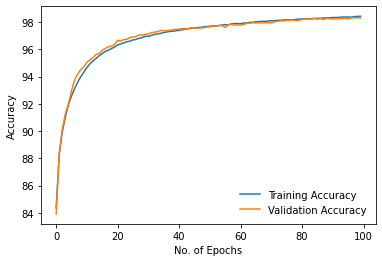

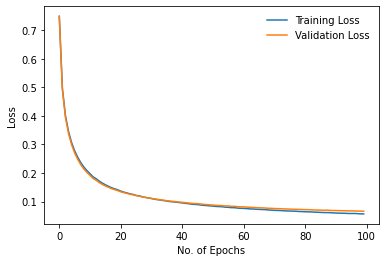

In [8]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/with_bias/stride'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

#### Test no binary network with stride:

In [9]:
# load model pre trained no binary
binary = False
maxpooling = False

model_no_binary_stride, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)

path_model = 'trained_models/MNIST/No_binary_models/with_bias/stride'
if torch.cuda.is_available():
  model_no_binary_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [10]:
evaluate(model_no_binary_stride, test_loader)

Test Results - Avg accuracy: 98.07 Avg loss: 0.06


### With Maxpooling:

In [11]:
binary = False
maxpooling = True

model, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)
print(name_model)

MNIST_NonBinaryNet_maxpooling


ITERATION - loss: 0.31: 100%|█████████▉| 840/844 [00:09<00:00, 161.10it/s]

Training Results - Epoch: 1  Avg accuracy: 89.54 Avg loss: 0.46


ITERATION - loss: 0.31: 100%|█████████▉| 840/844 [00:09<00:00, 161.10it/s]

Validation Results - Epoch: 1  Avg accuracy: 89.77 Avg loss: 0.45


ITERATION - loss: 0.39: 100%|█████████▉| 840/844 [00:19<00:00, 158.16it/s]

Training Results - Epoch: 2  Avg accuracy: 92.36 Avg loss: 0.30


ITERATION - loss: 0.41:   2%|▏         | 20/844 [00:20<01:00, 13.58it/s]  

Validation Results - Epoch: 2  Avg accuracy: 92.78 Avg loss: 0.30


ITERATION - loss: 0.37: 850it [00:29, 156.29it/s]

Training Results - Epoch: 3  Avg accuracy: 93.72 Avg loss: 0.24


ITERATION - loss: 0.43:   2%|▏         | 20/844 [00:29<01:00, 13.54it/s]

Validation Results - Epoch: 3  Avg accuracy: 94.18 Avg loss: 0.24


ITERATION - loss: 0.30: 100%|█████████▉| 840/844 [00:38<00:00, 160.52it/s]

Training Results - Epoch: 4  Avg accuracy: 94.55 Avg loss: 0.21


ITERATION - loss: 0.17:   2%|▏         | 20/844 [00:39<01:00, 13.71it/s]  

Validation Results - Epoch: 4  Avg accuracy: 95.12 Avg loss: 0.20


ITERATION - loss: 0.16: 850it [00:48, 155.92it/s]

Training Results - Epoch: 5  Avg accuracy: 95.18 Avg loss: 0.18


ITERATION - loss: 0.26:   2%|▏         | 20/844 [00:49<01:01, 13.40it/s]

Validation Results - Epoch: 5  Avg accuracy: 95.48 Avg loss: 0.18


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [00:58<00:00, 155.18it/s]

Training Results - Epoch: 6  Avg accuracy: 95.61 Avg loss: 0.16


ITERATION - loss: 0.13:   2%|▏         | 20/844 [00:59<01:00, 13.57it/s]  

Validation Results - Epoch: 6  Avg accuracy: 95.93 Avg loss: 0.16


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [01:08<00:00, 155.74it/s]

Training Results - Epoch: 7  Avg accuracy: 95.95 Avg loss: 0.15


ITERATION - loss: 0.21:   2%|▏         | 20/844 [01:09<01:00, 13.70it/s]  

Validation Results - Epoch: 7  Avg accuracy: 96.15 Avg loss: 0.15


ITERATION - loss: 0.23: 850it [01:18, 157.59it/s]

Training Results - Epoch: 8  Avg accuracy: 96.17 Avg loss: 0.14


ITERATION - loss: 0.08:   2%|▏         | 20/844 [01:18<01:00, 13.65it/s]

Validation Results - Epoch: 8  Avg accuracy: 96.45 Avg loss: 0.14


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [01:28<00:00, 146.92it/s]

Training Results - Epoch: 9  Avg accuracy: 96.41 Avg loss: 0.13


ITERATION - loss: 0.09:   2%|▏         | 20/844 [01:28<00:59, 13.81it/s]  

Validation Results - Epoch: 9  Avg accuracy: 96.60 Avg loss: 0.13


ITERATION - loss: 0.15: 850it [01:37, 159.17it/s]

Training Results - Epoch: 10  Avg accuracy: 96.59 Avg loss: 0.12


ITERATION - loss: 0.08:   2%|▏         | 20/844 [01:38<01:00, 13.64it/s]

Validation Results - Epoch: 10  Avg accuracy: 96.97 Avg loss: 0.12


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [01:47<00:00, 157.44it/s]

Training Results - Epoch: 11  Avg accuracy: 96.78 Avg loss: 0.12


ITERATION - loss: 0.17:   2%|▏         | 20/844 [01:48<00:59, 13.79it/s]  

Validation Results - Epoch: 11  Avg accuracy: 97.07 Avg loss: 0.12


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [01:57<00:00, 163.20it/s]

Training Results - Epoch: 12  Avg accuracy: 96.90 Avg loss: 0.11


ITERATION - loss: 0.15:   2%|▏         | 20/844 [01:57<00:59, 13.86it/s]  

Validation Results - Epoch: 12  Avg accuracy: 97.20 Avg loss: 0.11


ITERATION - loss: 0.14: 850it [02:06, 157.41it/s]

Training Results - Epoch: 13  Avg accuracy: 97.04 Avg loss: 0.11


ITERATION - loss: 0.08:   2%|▏         | 20/844 [02:07<01:00, 13.69it/s]

Validation Results - Epoch: 13  Avg accuracy: 97.33 Avg loss: 0.11


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [02:16<00:00, 155.48it/s]

Training Results - Epoch: 14  Avg accuracy: 97.16 Avg loss: 0.10


ITERATION - loss: 0.17:   2%|▏         | 20/844 [02:17<01:00, 13.65it/s]  

Validation Results - Epoch: 14  Avg accuracy: 97.40 Avg loss: 0.10


ITERATION - loss: 0.05: 850it [02:26, 159.05it/s]

Training Results - Epoch: 15  Avg accuracy: 97.24 Avg loss: 0.10


ITERATION - loss: 0.15:   2%|▏         | 20/844 [02:27<01:00, 13.58it/s]

Validation Results - Epoch: 15  Avg accuracy: 97.58 Avg loss: 0.10


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [02:36<00:00, 156.32it/s]

Training Results - Epoch: 16  Avg accuracy: 97.32 Avg loss: 0.10


ITERATION - loss: 0.09:   2%|▏         | 20/844 [02:36<00:59, 13.90it/s]  

Validation Results - Epoch: 16  Avg accuracy: 97.65 Avg loss: 0.10


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [02:45<00:00, 160.14it/s]

Training Results - Epoch: 17  Avg accuracy: 97.44 Avg loss: 0.09


ITERATION - loss: 0.17:   2%|▏         | 20/844 [02:46<00:59, 13.80it/s]  

Validation Results - Epoch: 17  Avg accuracy: 97.73 Avg loss: 0.09


ITERATION - loss: 0.06: 850it [02:55, 158.89it/s]

Training Results - Epoch: 18  Avg accuracy: 97.49 Avg loss: 0.09


ITERATION - loss: 0.10:   2%|▏         | 20/844 [02:56<01:00, 13.57it/s]

Validation Results - Epoch: 18  Avg accuracy: 97.68 Avg loss: 0.09


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [03:05<00:00, 156.20it/s]

Training Results - Epoch: 19  Avg accuracy: 97.54 Avg loss: 0.09


ITERATION - loss: 0.08:   2%|▏         | 20/844 [03:05<00:59, 13.78it/s]  

Validation Results - Epoch: 19  Avg accuracy: 97.77 Avg loss: 0.09


ITERATION - loss: 0.03: 850it [03:15, 159.65it/s]

Training Results - Epoch: 20  Avg accuracy: 97.61 Avg loss: 0.09


ITERATION - loss: 0.07:   2%|▏         | 20/844 [03:15<01:01, 13.50it/s]

Validation Results - Epoch: 20  Avg accuracy: 97.80 Avg loss: 0.09


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [03:24<00:00, 158.07it/s]

Training Results - Epoch: 21  Avg accuracy: 97.66 Avg loss: 0.08


ITERATION - loss: 0.04:   2%|▏         | 20/844 [03:25<01:00, 13.69it/s]  

Validation Results - Epoch: 21  Avg accuracy: 97.78 Avg loss: 0.09


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [03:34<00:00, 155.41it/s]

Training Results - Epoch: 22  Avg accuracy: 97.74 Avg loss: 0.08


ITERATION - loss: 0.13:   2%|▏         | 20/844 [03:35<01:00, 13.55it/s]  

Validation Results - Epoch: 22  Avg accuracy: 97.90 Avg loss: 0.08


ITERATION - loss: 0.10: 850it [03:44, 154.40it/s]

Training Results - Epoch: 23  Avg accuracy: 97.76 Avg loss: 0.08


ITERATION - loss: 0.16:   2%|▏         | 20/844 [03:45<01:00, 13.58it/s]

Validation Results - Epoch: 23  Avg accuracy: 97.93 Avg loss: 0.08


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [03:54<00:00, 158.34it/s]

Training Results - Epoch: 24  Avg accuracy: 97.80 Avg loss: 0.08


ITERATION - loss: 0.13:   2%|▏         | 20/844 [03:55<01:00, 13.68it/s]  

Validation Results - Epoch: 24  Avg accuracy: 97.98 Avg loss: 0.08


ITERATION - loss: 0.03: 850it [04:04, 159.12it/s]

Training Results - Epoch: 25  Avg accuracy: 97.81 Avg loss: 0.08


ITERATION - loss: 0.06:   2%|▏         | 20/844 [04:04<01:01, 13.43it/s]

Validation Results - Epoch: 25  Avg accuracy: 98.03 Avg loss: 0.08


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [04:14<00:00, 154.00it/s]

Training Results - Epoch: 26  Avg accuracy: 97.88 Avg loss: 0.08


ITERATION - loss: 0.10:   2%|▏         | 20/844 [04:14<00:59, 13.76it/s]  

Validation Results - Epoch: 26  Avg accuracy: 98.03 Avg loss: 0.08


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [04:23<00:00, 155.80it/s]

Training Results - Epoch: 27  Avg accuracy: 97.90 Avg loss: 0.08


ITERATION - loss: 0.09:   2%|▏         | 20/844 [04:24<01:00, 13.53it/s]  

Validation Results - Epoch: 27  Avg accuracy: 98.13 Avg loss: 0.08


ITERATION - loss: 0.04: 850it [04:33, 152.41it/s]

Training Results - Epoch: 28  Avg accuracy: 97.94 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [04:34<01:01, 13.41it/s]

Validation Results - Epoch: 28  Avg accuracy: 98.15 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [04:43<00:00, 156.23it/s]

Training Results - Epoch: 29  Avg accuracy: 97.99 Avg loss: 0.07


ITERATION - loss: 0.02:   2%|▏         | 20/844 [04:44<00:59, 13.76it/s]  

Validation Results - Epoch: 29  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.05: 850it [04:53, 151.24it/s]

Training Results - Epoch: 30  Avg accuracy: 98.01 Avg loss: 0.07


ITERATION - loss: 0.05:   2%|▏         | 20/844 [04:54<01:01, 13.35it/s]

Validation Results - Epoch: 30  Avg accuracy: 98.17 Avg loss: 0.07


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [05:03<00:00, 153.69it/s]

Training Results - Epoch: 31  Avg accuracy: 98.02 Avg loss: 0.07


ITERATION - loss: 0.21:   2%|▏         | 20/844 [05:04<01:00, 13.68it/s]  

Validation Results - Epoch: 31  Avg accuracy: 98.17 Avg loss: 0.07


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [05:13<00:00, 155.85it/s]

Training Results - Epoch: 32  Avg accuracy: 98.06 Avg loss: 0.07


ITERATION - loss: 0.14:   2%|▏         | 20/844 [05:13<01:00, 13.67it/s]  

Validation Results - Epoch: 32  Avg accuracy: 98.17 Avg loss: 0.07


ITERATION - loss: 0.08: 850it [05:23, 157.69it/s]

Training Results - Epoch: 33  Avg accuracy: 98.12 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [05:23<01:00, 13.67it/s]

Validation Results - Epoch: 33  Avg accuracy: 98.20 Avg loss: 0.07


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [05:32<00:00, 152.79it/s]

Training Results - Epoch: 34  Avg accuracy: 98.12 Avg loss: 0.07


ITERATION - loss: 0.03:   2%|▏         | 20/844 [05:33<00:59, 13.75it/s]  

Validation Results - Epoch: 34  Avg accuracy: 98.28 Avg loss: 0.07


ITERATION - loss: 0.04: 850it [05:42, 157.18it/s]

Training Results - Epoch: 35  Avg accuracy: 98.16 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [05:43<01:00, 13.60it/s]

Validation Results - Epoch: 35  Avg accuracy: 98.27 Avg loss: 0.07


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [05:52<00:00, 154.01it/s]

Training Results - Epoch: 36  Avg accuracy: 98.19 Avg loss: 0.06


ITERATION - loss: 0.01:   2%|▏         | 20/844 [05:52<00:59, 13.83it/s]  

Validation Results - Epoch: 36  Avg accuracy: 98.28 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [06:02<00:00, 156.09it/s]

Training Results - Epoch: 37  Avg accuracy: 98.21 Avg loss: 0.06


ITERATION - loss: 0.07:   2%|▏         | 20/844 [06:02<00:59, 13.86it/s]  

Validation Results - Epoch: 37  Avg accuracy: 98.37 Avg loss: 0.07


ITERATION - loss: 0.03: 850it [06:11, 158.16it/s]

Training Results - Epoch: 38  Avg accuracy: 98.23 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [06:12<01:01, 13.37it/s]

Validation Results - Epoch: 38  Avg accuracy: 98.28 Avg loss: 0.07


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [06:21<00:00, 156.03it/s]

Training Results - Epoch: 39  Avg accuracy: 98.24 Avg loss: 0.06


ITERATION - loss: 0.03:   2%|▏         | 20/844 [06:22<01:00, 13.65it/s]  

Validation Results - Epoch: 39  Avg accuracy: 98.38 Avg loss: 0.07


ITERATION - loss: 0.03: 850it [06:31, 159.35it/s]

Training Results - Epoch: 40  Avg accuracy: 98.26 Avg loss: 0.06


ITERATION - loss: 0.02:   2%|▏         | 20/844 [06:32<01:00, 13.58it/s]

Validation Results - Epoch: 40  Avg accuracy: 98.33 Avg loss: 0.07


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [06:41<00:00, 159.34it/s]

Training Results - Epoch: 41  Avg accuracy: 98.30 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [06:41<00:59, 13.78it/s]  

Validation Results - Epoch: 41  Avg accuracy: 98.37 Avg loss: 0.06


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [06:51<00:00, 154.68it/s]

Training Results - Epoch: 42  Avg accuracy: 98.29 Avg loss: 0.06


ITERATION - loss: 0.08:   2%|▏         | 20/844 [06:51<00:59, 13.77it/s]  

Validation Results - Epoch: 42  Avg accuracy: 98.37 Avg loss: 0.06


ITERATION - loss: 0.04: 850it [07:00, 159.02it/s]

Training Results - Epoch: 43  Avg accuracy: 98.32 Avg loss: 0.06


ITERATION - loss: 0.15:   2%|▏         | 20/844 [07:01<01:00, 13.61it/s]

Validation Results - Epoch: 43  Avg accuracy: 98.43 Avg loss: 0.06


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [07:10<00:00, 156.33it/s]

Training Results - Epoch: 44  Avg accuracy: 98.37 Avg loss: 0.06


ITERATION - loss: 0.06:   2%|▏         | 20/844 [07:11<01:00, 13.72it/s]  

Validation Results - Epoch: 44  Avg accuracy: 98.47 Avg loss: 0.06


ITERATION - loss: 0.09: 850it [07:20, 157.31it/s]

Training Results - Epoch: 45  Avg accuracy: 98.37 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [07:21<01:00, 13.52it/s]

Validation Results - Epoch: 45  Avg accuracy: 98.48 Avg loss: 0.06


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [07:30<00:00, 157.06it/s]

Training Results - Epoch: 46  Avg accuracy: 98.42 Avg loss: 0.06


ITERATION - loss: 0.03:   2%|▏         | 20/844 [07:30<01:00, 13.66it/s]  

Validation Results - Epoch: 46  Avg accuracy: 98.50 Avg loss: 0.06


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [07:40<00:00, 154.81it/s]

Training Results - Epoch: 47  Avg accuracy: 98.43 Avg loss: 0.06


ITERATION - loss: 0.01:   2%|▏         | 20/844 [07:40<01:00, 13.52it/s]  

Validation Results - Epoch: 47  Avg accuracy: 98.52 Avg loss: 0.06


ITERATION - loss: 0.07: 850it [07:49, 157.00it/s]

Training Results - Epoch: 48  Avg accuracy: 98.41 Avg loss: 0.06


ITERATION - loss: 0.14:   2%|▏         | 20/844 [07:50<01:00, 13.59it/s]

Validation Results - Epoch: 48  Avg accuracy: 98.50 Avg loss: 0.06


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [07:59<00:00, 159.87it/s]

Training Results - Epoch: 49  Avg accuracy: 98.43 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [08:00<00:59, 13.85it/s]  

Validation Results - Epoch: 49  Avg accuracy: 98.53 Avg loss: 0.06


ITERATION - loss: 0.04: 850it [08:09, 154.82it/s]

Training Results - Epoch: 50  Avg accuracy: 98.46 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [08:10<01:00, 13.62it/s]

Validation Results - Epoch: 50  Avg accuracy: 98.53 Avg loss: 0.06


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [08:19<00:00, 159.20it/s]

Training Results - Epoch: 51  Avg accuracy: 98.46 Avg loss: 0.05


ITERATION - loss: 0.17:   2%|▏         | 20/844 [08:19<00:59, 13.76it/s]  

Validation Results - Epoch: 51  Avg accuracy: 98.52 Avg loss: 0.06


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [08:28<00:00, 154.81it/s]

Training Results - Epoch: 52  Avg accuracy: 98.48 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [08:29<00:59, 13.83it/s]  

Validation Results - Epoch: 52  Avg accuracy: 98.52 Avg loss: 0.06


ITERATION - loss: 0.02: 850it [08:38, 160.94it/s]

Training Results - Epoch: 53  Avg accuracy: 98.50 Avg loss: 0.05


ITERATION - loss: 0.09:   2%|▏         | 20/844 [08:39<01:00, 13.70it/s]

Validation Results - Epoch: 53  Avg accuracy: 98.53 Avg loss: 0.06


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [08:48<00:00, 155.29it/s]

Training Results - Epoch: 54  Avg accuracy: 98.51 Avg loss: 0.05


ITERATION - loss: 0.03:   2%|▏         | 20/844 [08:49<00:59, 13.75it/s]  

Validation Results - Epoch: 54  Avg accuracy: 98.50 Avg loss: 0.06


ITERATION - loss: 0.33: 850it [08:58, 155.14it/s]

Training Results - Epoch: 55  Avg accuracy: 98.51 Avg loss: 0.05


ITERATION - loss: 0.05:   2%|▏         | 20/844 [08:58<01:00, 13.54it/s]

Validation Results - Epoch: 55  Avg accuracy: 98.60 Avg loss: 0.06


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [09:08<00:00, 155.77it/s]

Training Results - Epoch: 56  Avg accuracy: 98.55 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [09:08<00:59, 13.84it/s]  

Validation Results - Epoch: 56  Avg accuracy: 98.57 Avg loss: 0.06


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [09:17<00:00, 158.22it/s]

Training Results - Epoch: 57  Avg accuracy: 98.54 Avg loss: 0.05


ITERATION - loss: 0.35:   2%|▏         | 20/844 [09:18<00:59, 13.77it/s]  

Validation Results - Epoch: 57  Avg accuracy: 98.57 Avg loss: 0.06


ITERATION - loss: 0.08: 850it [09:27, 143.90it/s]

Training Results - Epoch: 58  Avg accuracy: 98.56 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [09:28<01:01, 13.50it/s]

Validation Results - Epoch: 58  Avg accuracy: 98.60 Avg loss: 0.06


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [09:37<00:00, 150.52it/s]

Training Results - Epoch: 59  Avg accuracy: 98.59 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [09:37<01:00, 13.63it/s]  

Validation Results - Epoch: 59  Avg accuracy: 98.57 Avg loss: 0.06


ITERATION - loss: 0.02: 850it [09:47, 152.74it/s]

Training Results - Epoch: 60  Avg accuracy: 98.57 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [09:47<01:00, 13.64it/s]

Validation Results - Epoch: 60  Avg accuracy: 98.65 Avg loss: 0.06


ITERATION - loss: 0.01: 100%|█████████▉| 840/844 [09:56<00:00, 161.26it/s]

Training Results - Epoch: 61  Avg accuracy: 98.59 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [09:57<00:59, 13.77it/s]  

Validation Results - Epoch: 61  Avg accuracy: 98.60 Avg loss: 0.06


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [10:06<00:00, 155.59it/s]

Training Results - Epoch: 62  Avg accuracy: 98.60 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [10:07<00:59, 13.81it/s]  

Validation Results - Epoch: 62  Avg accuracy: 98.67 Avg loss: 0.06


ITERATION - loss: 0.05: 850it [10:16, 160.24it/s]

Training Results - Epoch: 63  Avg accuracy: 98.61 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [10:17<01:01, 13.49it/s]

Validation Results - Epoch: 63  Avg accuracy: 98.60 Avg loss: 0.06


ITERATION - loss: 0.01: 100%|█████████▉| 840/844 [10:26<00:00, 155.12it/s]

Training Results - Epoch: 64  Avg accuracy: 98.66 Avg loss: 0.05


ITERATION - loss: 0.01:   2%|▏         | 20/844 [10:26<01:00, 13.70it/s]  

Validation Results - Epoch: 64  Avg accuracy: 98.65 Avg loss: 0.06


ITERATION - loss: 0.05: 850it [10:35, 158.99it/s]

Training Results - Epoch: 65  Avg accuracy: 98.64 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [10:36<01:00, 13.66it/s]

Validation Results - Epoch: 65  Avg accuracy: 98.68 Avg loss: 0.06


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [10:45<00:00, 160.83it/s]

Training Results - Epoch: 66  Avg accuracy: 98.67 Avg loss: 0.05


ITERATION - loss: 0.03:   2%|▏         | 20/844 [10:46<00:59, 13.85it/s]  

Validation Results - Epoch: 66  Avg accuracy: 98.67 Avg loss: 0.06


ITERATION - loss: 0.01: 100%|█████████▉| 840/844 [10:55<00:00, 161.82it/s]

Training Results - Epoch: 67  Avg accuracy: 98.68 Avg loss: 0.05


ITERATION - loss: 0.11:   2%|▏         | 20/844 [10:55<00:59, 13.91it/s]  

Validation Results - Epoch: 67  Avg accuracy: 98.65 Avg loss: 0.05


ITERATION - loss: 0.06: 850it [11:04, 161.70it/s]

Training Results - Epoch: 68  Avg accuracy: 98.68 Avg loss: 0.05


ITERATION - loss: 0.06:   2%|▏         | 20/844 [11:05<00:59, 13.81it/s]

Validation Results - Epoch: 68  Avg accuracy: 98.70 Avg loss: 0.05


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [11:14<00:00, 161.47it/s]

Training Results - Epoch: 69  Avg accuracy: 98.69 Avg loss: 0.05


ITERATION - loss: 0.01:   2%|▏         | 20/844 [11:15<00:59, 13.88it/s]  

Validation Results - Epoch: 69  Avg accuracy: 98.68 Avg loss: 0.05


ITERATION - loss: 0.05: 850it [11:24, 160.76it/s]

Training Results - Epoch: 70  Avg accuracy: 98.69 Avg loss: 0.05


ITERATION - loss: 0.07:   2%|▏         | 20/844 [11:24<01:00, 13.62it/s]

Validation Results - Epoch: 70  Avg accuracy: 98.75 Avg loss: 0.05


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [11:33<00:00, 158.56it/s]

Training Results - Epoch: 71  Avg accuracy: 98.71 Avg loss: 0.05


ITERATION - loss: 0.05:   2%|▏         | 20/844 [11:34<00:59, 13.85it/s]  

Validation Results - Epoch: 71  Avg accuracy: 98.67 Avg loss: 0.05


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [11:43<00:00, 160.13it/s]

Training Results - Epoch: 72  Avg accuracy: 98.74 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [11:44<00:59, 13.74it/s]  

Validation Results - Epoch: 72  Avg accuracy: 98.65 Avg loss: 0.05


ITERATION - loss: 0.02: 850it [11:53, 159.92it/s]

Training Results - Epoch: 73  Avg accuracy: 98.73 Avg loss: 0.05


ITERATION - loss: 0.03:   2%|▏         | 20/844 [11:54<00:59, 13.79it/s]

Validation Results - Epoch: 73  Avg accuracy: 98.67 Avg loss: 0.05


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [12:03<00:00, 158.08it/s]

Training Results - Epoch: 74  Avg accuracy: 98.76 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [12:03<00:59, 13.87it/s]  

Validation Results - Epoch: 74  Avg accuracy: 98.67 Avg loss: 0.05


ITERATION - loss: 0.02: 850it [12:12, 161.34it/s]

Training Results - Epoch: 75  Avg accuracy: 98.75 Avg loss: 0.04


ITERATION - loss: 0.07:   2%|▏         | 20/844 [12:13<01:00, 13.72it/s]

Validation Results - Epoch: 75  Avg accuracy: 98.73 Avg loss: 0.05


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [12:22<00:00, 160.41it/s]

Training Results - Epoch: 76  Avg accuracy: 98.74 Avg loss: 0.04


ITERATION - loss: 0.04:   2%|▏         | 20/844 [12:22<00:59, 13.93it/s]  

Validation Results - Epoch: 76  Avg accuracy: 98.63 Avg loss: 0.05


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [12:32<00:00, 153.31it/s]

Training Results - Epoch: 77  Avg accuracy: 98.76 Avg loss: 0.04


ITERATION - loss: 0.09:   2%|▏         | 20/844 [12:32<00:59, 13.86it/s]  

Validation Results - Epoch: 77  Avg accuracy: 98.67 Avg loss: 0.05


ITERATION - loss: 0.03: 850it [12:41, 160.94it/s]

Training Results - Epoch: 78  Avg accuracy: 98.79 Avg loss: 0.04


ITERATION - loss: 0.07:   2%|▏         | 20/844 [12:42<01:00, 13.70it/s]

Validation Results - Epoch: 78  Avg accuracy: 98.75 Avg loss: 0.05


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [12:51<00:00, 159.14it/s]

Training Results - Epoch: 79  Avg accuracy: 98.79 Avg loss: 0.04


ITERATION - loss: 0.04:   2%|▏         | 20/844 [12:52<00:59, 13.86it/s]  

Validation Results - Epoch: 79  Avg accuracy: 98.78 Avg loss: 0.05


ITERATION - loss: 0.08: 850it [13:01, 160.68it/s]

Training Results - Epoch: 80  Avg accuracy: 98.80 Avg loss: 0.04


ITERATION - loss: 0.11:   2%|▏         | 20/844 [13:01<01:00, 13.51it/s]

Validation Results - Epoch: 80  Avg accuracy: 98.72 Avg loss: 0.05


ITERATION - loss: 0.01: 100%|█████████▉| 840/844 [13:10<00:00, 157.26it/s]

Training Results - Epoch: 81  Avg accuracy: 98.82 Avg loss: 0.04


ITERATION - loss: 0.04:   2%|▏         | 20/844 [13:11<00:59, 13.86it/s]  

Validation Results - Epoch: 81  Avg accuracy: 98.78 Avg loss: 0.05


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [13:20<00:00, 161.71it/s]

Training Results - Epoch: 82  Avg accuracy: 98.82 Avg loss: 0.04


ITERATION - loss: 0.06:   2%|▏         | 20/844 [13:21<00:59, 13.80it/s]  

Validation Results - Epoch: 82  Avg accuracy: 98.67 Avg loss: 0.05


ITERATION - loss: 0.01: 850it [13:30, 158.61it/s]

Training Results - Epoch: 83  Avg accuracy: 98.84 Avg loss: 0.04


ITERATION - loss: 0.01:   2%|▏         | 20/844 [13:30<01:00, 13.71it/s]

Validation Results - Epoch: 83  Avg accuracy: 98.80 Avg loss: 0.05


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [13:39<00:00, 157.64it/s]

Training Results - Epoch: 84  Avg accuracy: 98.83 Avg loss: 0.04


ITERATION - loss: 0.02:   2%|▏         | 20/844 [13:40<00:59, 13.76it/s]  

Validation Results - Epoch: 84  Avg accuracy: 98.75 Avg loss: 0.05


ITERATION - loss: 0.04: 850it [13:49, 161.41it/s]

Training Results - Epoch: 85  Avg accuracy: 98.84 Avg loss: 0.04


ITERATION - loss: 0.04:   2%|▏         | 20/844 [13:50<01:00, 13.68it/s]

Validation Results - Epoch: 85  Avg accuracy: 98.80 Avg loss: 0.05


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [13:59<00:00, 161.18it/s]

Training Results - Epoch: 86  Avg accuracy: 98.87 Avg loss: 0.04


ITERATION - loss: 0.16:   2%|▏         | 20/844 [13:59<00:59, 13.79it/s]  

Validation Results - Epoch: 86  Avg accuracy: 98.73 Avg loss: 0.05


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [14:09<00:00, 154.47it/s]

Training Results - Epoch: 87  Avg accuracy: 98.86 Avg loss: 0.04


ITERATION - loss: 0.02:   2%|▏         | 20/844 [14:09<00:59, 13.79it/s]  

Validation Results - Epoch: 87  Avg accuracy: 98.80 Avg loss: 0.05


ITERATION - loss: 0.11: 850it [14:18, 159.17it/s]

Training Results - Epoch: 88  Avg accuracy: 98.88 Avg loss: 0.04


ITERATION - loss: 0.04:   2%|▏         | 20/844 [14:19<01:01, 13.49it/s]

Validation Results - Epoch: 88  Avg accuracy: 98.77 Avg loss: 0.05


ITERATION - loss: 0.01: 100%|█████████▉| 840/844 [14:28<00:00, 154.52it/s]

Training Results - Epoch: 89  Avg accuracy: 98.88 Avg loss: 0.04


ITERATION - loss: 0.02:   2%|▏         | 20/844 [14:29<00:59, 13.85it/s]  

Validation Results - Epoch: 89  Avg accuracy: 98.80 Avg loss: 0.05


ITERATION - loss: 0.02: 850it [14:38, 162.58it/s]

Training Results - Epoch: 90  Avg accuracy: 98.86 Avg loss: 0.04


ITERATION - loss: 0.02:   2%|▏         | 20/844 [14:38<01:00, 13.70it/s]

Validation Results - Epoch: 90  Avg accuracy: 98.75 Avg loss: 0.05


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [14:48<00:00, 153.79it/s]

Training Results - Epoch: 91  Avg accuracy: 98.89 Avg loss: 0.04


ITERATION - loss: 0.04:   2%|▏         | 20/844 [14:48<00:59, 13.80it/s]  

Validation Results - Epoch: 91  Avg accuracy: 98.75 Avg loss: 0.05


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [14:57<00:00, 150.76it/s]

Training Results - Epoch: 92  Avg accuracy: 98.91 Avg loss: 0.04


ITERATION - loss: 0.03:   2%|▏         | 20/844 [14:58<00:59, 13.89it/s]  

Validation Results - Epoch: 92  Avg accuracy: 98.73 Avg loss: 0.05


ITERATION - loss: 0.01: 850it [15:07, 158.64it/s]

Training Results - Epoch: 93  Avg accuracy: 98.91 Avg loss: 0.04


ITERATION - loss: 0.06:   2%|▏         | 20/844 [15:08<01:01, 13.43it/s]

Validation Results - Epoch: 93  Avg accuracy: 98.80 Avg loss: 0.05


ITERATION - loss: 0.01: 100%|█████████▉| 840/844 [15:17<00:00, 156.18it/s]

Training Results - Epoch: 94  Avg accuracy: 98.92 Avg loss: 0.04


ITERATION - loss: 0.02:   2%|▏         | 20/844 [15:17<00:59, 13.91it/s]  

Validation Results - Epoch: 94  Avg accuracy: 98.83 Avg loss: 0.05


ITERATION - loss: 0.02: 850it [15:26, 160.26it/s]

Training Results - Epoch: 95  Avg accuracy: 98.92 Avg loss: 0.04


ITERATION - loss: 0.04:   2%|▏         | 20/844 [15:27<01:00, 13.64it/s]

Validation Results - Epoch: 95  Avg accuracy: 98.73 Avg loss: 0.05


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [15:36<00:00, 152.32it/s]

Training Results - Epoch: 96  Avg accuracy: 98.95 Avg loss: 0.04


ITERATION - loss: 0.09:   2%|▏         | 20/844 [15:37<00:59, 13.80it/s]  

Validation Results - Epoch: 96  Avg accuracy: 98.80 Avg loss: 0.05


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [15:46<00:00, 158.31it/s]

Training Results - Epoch: 97  Avg accuracy: 98.94 Avg loss: 0.04


ITERATION - loss: 0.05:   2%|▏         | 20/844 [15:47<01:00, 13.68it/s]  

Validation Results - Epoch: 97  Avg accuracy: 98.85 Avg loss: 0.05


ITERATION - loss: 0.05: 850it [15:56, 160.58it/s]

Training Results - Epoch: 98  Avg accuracy: 98.94 Avg loss: 0.04


ITERATION - loss: 0.03:   2%|▏         | 20/844 [15:56<01:00, 13.71it/s]

Validation Results - Epoch: 98  Avg accuracy: 98.82 Avg loss: 0.05


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [16:05<00:00, 159.21it/s]

Training Results - Epoch: 99  Avg accuracy: 98.96 Avg loss: 0.04


ITERATION - loss: 0.03:   2%|▏         | 20/844 [16:06<00:59, 13.93it/s]  

Validation Results - Epoch: 99  Avg accuracy: 98.75 Avg loss: 0.05


ITERATION - loss: 0.02: 850it [16:15, 162.57it/s]

Training Results - Epoch: 100  Avg accuracy: 98.95 Avg loss: 0.04


ITERATION - loss: 0.02: 850it [16:15, 162.57it/s]

Validation Results - Epoch: 100  Avg accuracy: 98.80 Avg loss: 0.05


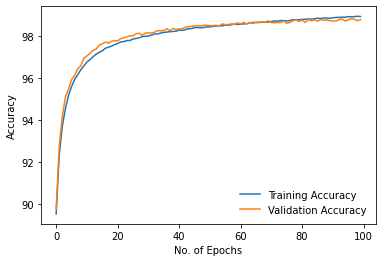

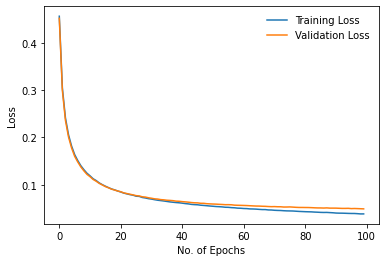

In [12]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/with_bias/maxpooling'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

#### Test no binary network with maxpooling:

In [13]:
# load model pre trained no binary
binary = False
maxpooling = True

model_no_binary_maxpooling, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)

path_model = 'trained_models/MNIST/No_binary_models/with_bias/maxpooling'
if torch.cuda.is_available():
  model_no_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet_maxpooling


In [14]:
evaluate(model_no_binary_maxpooling, test_loader)

Test Results - Avg accuracy: 98.59 Avg loss: 0.04


## Run Binary Netwwork:

### With stride:

In [15]:
# parameters model to load no Binary model
binary = True
maxpooling = False

model, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)
print(name_model)

MNIST_Stochastic_ST_first_conv_binary


ITERATION - loss: 1.25: 100%|█████████▉| 840/844 [00:09<00:00, 159.43it/s]

Training Results - Epoch: 1  Avg accuracy: 71.80 Avg loss: 1.29


ITERATION - loss: 1.44:   2%|▏         | 20/844 [00:09<00:59, 13.87it/s]  

Validation Results - Epoch: 1  Avg accuracy: 71.73 Avg loss: 1.30


ITERATION - loss: 0.85: 100%|█████████▉| 840/844 [00:18<00:00, 158.72it/s]

Training Results - Epoch: 2  Avg accuracy: 82.42 Avg loss: 0.76


ITERATION - loss: 0.80:   2%|▏         | 20/844 [00:19<00:59, 13.80it/s]  

Validation Results - Epoch: 2  Avg accuracy: 81.85 Avg loss: 0.76


ITERATION - loss: 0.67: 850it [00:28, 159.62it/s]

Training Results - Epoch: 3  Avg accuracy: 85.21 Avg loss: 0.59


ITERATION - loss: 0.75:   2%|▏         | 20/844 [00:29<01:02, 13.27it/s]

Validation Results - Epoch: 3  Avg accuracy: 84.75 Avg loss: 0.59


ITERATION - loss: 0.63: 100%|█████████▉| 840/844 [00:38<00:00, 160.46it/s]

Training Results - Epoch: 4  Avg accuracy: 86.72 Avg loss: 0.50


ITERATION - loss: 0.49:   2%|▏         | 20/844 [00:38<00:59, 13.81it/s]  

Validation Results - Epoch: 4  Avg accuracy: 86.67 Avg loss: 0.50


ITERATION - loss: 0.35: 850it [00:47, 160.89it/s]

Training Results - Epoch: 5  Avg accuracy: 87.67 Avg loss: 0.45


ITERATION - loss: 0.61:   2%|▏         | 20/844 [00:48<01:00, 13.71it/s]

Validation Results - Epoch: 5  Avg accuracy: 87.73 Avg loss: 0.45


ITERATION - loss: 0.45: 100%|█████████▉| 840/844 [00:57<00:00, 157.82it/s]

Training Results - Epoch: 6  Avg accuracy: 88.37 Avg loss: 0.42


ITERATION - loss: 0.33:   2%|▏         | 20/844 [00:58<00:59, 13.79it/s]  

Validation Results - Epoch: 6  Avg accuracy: 88.50 Avg loss: 0.42


ITERATION - loss: 0.40: 100%|█████████▉| 840/844 [01:07<00:00, 162.74it/s]

Training Results - Epoch: 7  Avg accuracy: 89.01 Avg loss: 0.39


ITERATION - loss: 0.44:   2%|▏         | 20/844 [01:07<00:59, 13.81it/s]  

Validation Results - Epoch: 7  Avg accuracy: 89.15 Avg loss: 0.39


ITERATION - loss: 0.51: 850it [01:16, 161.23it/s]

Training Results - Epoch: 8  Avg accuracy: 89.42 Avg loss: 0.37


ITERATION - loss: 0.25:   2%|▏         | 20/844 [01:17<01:00, 13.69it/s]

Validation Results - Epoch: 8  Avg accuracy: 89.60 Avg loss: 0.37


ITERATION - loss: 0.30: 100%|█████████▉| 840/844 [01:26<00:00, 163.43it/s]

Training Results - Epoch: 9  Avg accuracy: 89.89 Avg loss: 0.35


ITERATION - loss: 0.30:   2%|▏         | 20/844 [01:27<00:59, 13.74it/s]  

Validation Results - Epoch: 9  Avg accuracy: 90.00 Avg loss: 0.35


ITERATION - loss: 0.34: 850it [01:36, 156.73it/s]

Training Results - Epoch: 10  Avg accuracy: 90.26 Avg loss: 0.34


ITERATION - loss: 0.39:   2%|▏         | 20/844 [01:36<01:00, 13.66it/s]

Validation Results - Epoch: 10  Avg accuracy: 90.40 Avg loss: 0.34


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [01:45<00:00, 161.20it/s]

Training Results - Epoch: 11  Avg accuracy: 90.60 Avg loss: 0.33


ITERATION - loss: 0.38:   2%|▏         | 20/844 [01:46<01:00, 13.66it/s]  

Validation Results - Epoch: 11  Avg accuracy: 90.77 Avg loss: 0.32


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [01:55<00:00, 158.89it/s]

Training Results - Epoch: 12  Avg accuracy: 90.93 Avg loss: 0.31


ITERATION - loss: 0.41:   2%|▏         | 20/844 [01:56<00:59, 13.79it/s]  

Validation Results - Epoch: 12  Avg accuracy: 91.08 Avg loss: 0.31


ITERATION - loss: 0.48: 850it [02:05, 157.30it/s]

Training Results - Epoch: 13  Avg accuracy: 91.14 Avg loss: 0.31


ITERATION - loss: 0.21:   2%|▏         | 20/844 [02:05<01:01, 13.42it/s]

Validation Results - Epoch: 13  Avg accuracy: 91.25 Avg loss: 0.30


ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [02:15<00:00, 161.08it/s]

Training Results - Epoch: 14  Avg accuracy: 91.44 Avg loss: 0.30


ITERATION - loss: 0.47:   2%|▏         | 20/844 [02:15<00:59, 13.89it/s]  

Validation Results - Epoch: 14  Avg accuracy: 91.68 Avg loss: 0.29


ITERATION - loss: 0.21: 850it [02:24, 156.36it/s]

Training Results - Epoch: 15  Avg accuracy: 91.65 Avg loss: 0.29


ITERATION - loss: 0.35:   2%|▏         | 20/844 [02:25<01:00, 13.70it/s]

Validation Results - Epoch: 15  Avg accuracy: 91.93 Avg loss: 0.28


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [02:34<00:00, 164.28it/s]

Training Results - Epoch: 16  Avg accuracy: 91.85 Avg loss: 0.28


ITERATION - loss: 0.28:   2%|▏         | 20/844 [02:35<00:59, 13.85it/s]  

Validation Results - Epoch: 16  Avg accuracy: 92.13 Avg loss: 0.27


ITERATION - loss: 0.32: 100%|█████████▉| 840/844 [02:44<00:00, 162.09it/s]

Training Results - Epoch: 17  Avg accuracy: 92.13 Avg loss: 0.27


ITERATION - loss: 0.41:   2%|▏         | 20/844 [02:44<00:58, 13.97it/s]  

Validation Results - Epoch: 17  Avg accuracy: 92.40 Avg loss: 0.27


ITERATION - loss: 0.23: 850it [02:53, 164.50it/s]

Training Results - Epoch: 18  Avg accuracy: 92.28 Avg loss: 0.26


ITERATION - loss: 0.49:   2%|▏         | 20/844 [02:54<01:00, 13.71it/s]

Validation Results - Epoch: 18  Avg accuracy: 92.42 Avg loss: 0.26


ITERATION - loss: 0.27: 100%|█████████▉| 840/844 [03:03<00:00, 163.88it/s]

Training Results - Epoch: 19  Avg accuracy: 92.50 Avg loss: 0.26


ITERATION - loss: 0.33:   2%|▏         | 20/844 [03:03<00:59, 13.80it/s]  

Validation Results - Epoch: 19  Avg accuracy: 92.58 Avg loss: 0.25


ITERATION - loss: 0.14: 850it [03:13, 161.71it/s]

Training Results - Epoch: 20  Avg accuracy: 92.60 Avg loss: 0.25


ITERATION - loss: 0.25:   2%|▏         | 20/844 [03:13<01:00, 13.58it/s]

Validation Results - Epoch: 20  Avg accuracy: 92.73 Avg loss: 0.25


ITERATION - loss: 0.52: 100%|█████████▉| 840/844 [03:22<00:00, 160.28it/s]

Training Results - Epoch: 21  Avg accuracy: 92.79 Avg loss: 0.25


ITERATION - loss: 0.16:   2%|▏         | 20/844 [03:23<00:59, 13.83it/s]  

Validation Results - Epoch: 21  Avg accuracy: 93.10 Avg loss: 0.24


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [03:32<00:00, 161.79it/s]

Training Results - Epoch: 22  Avg accuracy: 92.94 Avg loss: 0.24


ITERATION - loss: 0.40:   2%|▏         | 20/844 [03:32<00:59, 13.87it/s]  

Validation Results - Epoch: 22  Avg accuracy: 93.23 Avg loss: 0.23


ITERATION - loss: 0.19: 850it [03:41, 163.70it/s]

Training Results - Epoch: 23  Avg accuracy: 93.04 Avg loss: 0.24


ITERATION - loss: 0.29:   2%|▏         | 20/844 [03:42<00:59, 13.74it/s]

Validation Results - Epoch: 23  Avg accuracy: 93.43 Avg loss: 0.23


ITERATION - loss: 0.29: 100%|█████████▉| 840/844 [03:51<00:00, 164.66it/s]

Training Results - Epoch: 24  Avg accuracy: 93.21 Avg loss: 0.23


ITERATION - loss: 0.24:   2%|▏         | 20/844 [03:52<00:59, 13.89it/s]  

Validation Results - Epoch: 24  Avg accuracy: 93.48 Avg loss: 0.23


ITERATION - loss: 0.12: 850it [04:01, 162.02it/s]

Training Results - Epoch: 25  Avg accuracy: 93.32 Avg loss: 0.23


ITERATION - loss: 0.12: 850it [04:01, 162.02it/s]

Validation Results - Epoch: 25  Avg accuracy: 93.70 Avg loss: 0.22


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [04:10<00:00, 161.31it/s]

Training Results - Epoch: 26  Avg accuracy: 93.47 Avg loss: 0.22


ITERATION - loss: 0.28:   2%|▏         | 20/844 [04:11<00:59, 13.89it/s]  

Validation Results - Epoch: 26  Avg accuracy: 93.70 Avg loss: 0.22


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [04:20<00:00, 164.38it/s]

Training Results - Epoch: 27  Avg accuracy: 93.53 Avg loss: 0.22


ITERATION - loss: 0.34:   2%|▏         | 20/844 [04:20<00:59, 13.89it/s]  

Validation Results - Epoch: 27  Avg accuracy: 93.80 Avg loss: 0.21


ITERATION - loss: 0.10: 850it [04:29, 163.48it/s]

Training Results - Epoch: 28  Avg accuracy: 93.67 Avg loss: 0.21


ITERATION - loss: 0.24:   2%|▏         | 20/844 [04:30<01:00, 13.60it/s]

Validation Results - Epoch: 28  Avg accuracy: 93.88 Avg loss: 0.21


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [04:39<00:00, 158.79it/s]

Training Results - Epoch: 29  Avg accuracy: 93.80 Avg loss: 0.21


ITERATION - loss: 0.17:   2%|▏         | 20/844 [04:40<00:59, 13.87it/s]  

Validation Results - Epoch: 29  Avg accuracy: 94.05 Avg loss: 0.21


ITERATION - loss: 0.19: 850it [04:49, 164.90it/s]

Training Results - Epoch: 30  Avg accuracy: 93.91 Avg loss: 0.21


ITERATION - loss: 0.19:   2%|▏         | 20/844 [04:49<01:00, 13.69it/s]

Validation Results - Epoch: 30  Avg accuracy: 94.12 Avg loss: 0.20


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [04:58<00:00, 162.61it/s]

Training Results - Epoch: 31  Avg accuracy: 93.99 Avg loss: 0.20


ITERATION - loss: 0.38:   2%|▏         | 20/844 [04:59<00:59, 13.96it/s]  

Validation Results - Epoch: 31  Avg accuracy: 94.28 Avg loss: 0.20


ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [05:08<00:00, 161.07it/s]

Training Results - Epoch: 32  Avg accuracy: 94.08 Avg loss: 0.20


ITERATION - loss: 0.25:   2%|▏         | 20/844 [05:08<00:59, 13.94it/s]  

Validation Results - Epoch: 32  Avg accuracy: 94.37 Avg loss: 0.20


ITERATION - loss: 0.25: 850it [05:17, 160.09it/s]

Training Results - Epoch: 33  Avg accuracy: 94.18 Avg loss: 0.20


ITERATION - loss: 0.15:   2%|▏         | 20/844 [05:18<00:59, 13.77it/s]

Validation Results - Epoch: 33  Avg accuracy: 94.33 Avg loss: 0.19


ITERATION - loss: 0.30: 100%|█████████▉| 840/844 [05:27<00:00, 163.62it/s]

Training Results - Epoch: 34  Avg accuracy: 94.25 Avg loss: 0.20


ITERATION - loss: 0.17:   2%|▏         | 20/844 [05:28<00:59, 13.95it/s]  

Validation Results - Epoch: 34  Avg accuracy: 94.58 Avg loss: 0.19


ITERATION - loss: 0.15: 850it [05:37, 163.13it/s]

Training Results - Epoch: 35  Avg accuracy: 94.36 Avg loss: 0.19


ITERATION - loss: 0.28:   2%|▏         | 20/844 [05:37<01:00, 13.55it/s]

Validation Results - Epoch: 35  Avg accuracy: 94.55 Avg loss: 0.19


ITERATION - loss: 0.26: 100%|█████████▉| 840/844 [05:46<00:00, 158.30it/s]

Training Results - Epoch: 36  Avg accuracy: 94.40 Avg loss: 0.19


ITERATION - loss: 0.13:   2%|▏         | 20/844 [05:47<01:00, 13.59it/s]  

Validation Results - Epoch: 36  Avg accuracy: 94.65 Avg loss: 0.19


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [05:56<00:00, 159.92it/s]

Training Results - Epoch: 37  Avg accuracy: 94.48 Avg loss: 0.19


ITERATION - loss: 0.11:   2%|▏         | 20/844 [05:57<00:59, 13.77it/s]  

Validation Results - Epoch: 37  Avg accuracy: 94.75 Avg loss: 0.18


ITERATION - loss: 0.16: 850it [06:06, 160.15it/s]

Training Results - Epoch: 38  Avg accuracy: 94.53 Avg loss: 0.19


ITERATION - loss: 0.13:   2%|▏         | 20/844 [06:06<00:59, 13.73it/s]

Validation Results - Epoch: 38  Avg accuracy: 94.77 Avg loss: 0.18


ITERATION - loss: 0.30: 100%|█████████▉| 840/844 [06:15<00:00, 162.99it/s]

Training Results - Epoch: 39  Avg accuracy: 94.58 Avg loss: 0.18


ITERATION - loss: 0.13:   2%|▏         | 20/844 [06:16<00:59, 13.87it/s]  

Validation Results - Epoch: 39  Avg accuracy: 94.77 Avg loss: 0.18


ITERATION - loss: 0.14: 850it [06:25, 163.94it/s]

Training Results - Epoch: 40  Avg accuracy: 94.64 Avg loss: 0.18


ITERATION - loss: 0.10:   2%|▏         | 20/844 [06:26<01:00, 13.53it/s]

Validation Results - Epoch: 40  Avg accuracy: 94.75 Avg loss: 0.18


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [06:35<00:00, 157.60it/s]

Training Results - Epoch: 41  Avg accuracy: 94.66 Avg loss: 0.18


ITERATION - loss: 0.13:   2%|▏         | 20/844 [06:35<00:59, 13.87it/s]  

Validation Results - Epoch: 41  Avg accuracy: 94.68 Avg loss: 0.18


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [06:44<00:00, 164.89it/s]

Training Results - Epoch: 42  Avg accuracy: 94.74 Avg loss: 0.18


ITERATION - loss: 0.14:   2%|▏         | 20/844 [06:45<00:59, 13.87it/s]  

Validation Results - Epoch: 42  Avg accuracy: 94.87 Avg loss: 0.17


ITERATION - loss: 0.22: 850it [06:54, 158.33it/s]

Training Results - Epoch: 43  Avg accuracy: 94.78 Avg loss: 0.18


ITERATION - loss: 0.34:   2%|▏         | 20/844 [06:54<01:00, 13.68it/s]

Validation Results - Epoch: 43  Avg accuracy: 94.87 Avg loss: 0.17


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [07:03<00:00, 166.51it/s]

Training Results - Epoch: 44  Avg accuracy: 94.88 Avg loss: 0.17


ITERATION - loss: 0.27:   2%|▏         | 20/844 [07:04<00:59, 13.81it/s]  

Validation Results - Epoch: 44  Avg accuracy: 95.08 Avg loss: 0.17


ITERATION - loss: 0.18: 850it [07:13, 160.00it/s]

Training Results - Epoch: 45  Avg accuracy: 94.93 Avg loss: 0.17


ITERATION - loss: 0.16:   2%|▏         | 20/844 [07:14<01:04, 12.79it/s]

Validation Results - Epoch: 45  Avg accuracy: 95.18 Avg loss: 0.17


ITERATION - loss: 0.26: 100%|█████████▉| 840/844 [07:23<00:00, 152.78it/s]

Training Results - Epoch: 46  Avg accuracy: 94.93 Avg loss: 0.17


ITERATION - loss: 0.07:   2%|▏         | 20/844 [07:24<01:02, 13.28it/s]  

Validation Results - Epoch: 46  Avg accuracy: 95.17 Avg loss: 0.17


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [07:33<00:00, 164.38it/s]

Training Results - Epoch: 47  Avg accuracy: 95.00 Avg loss: 0.17


ITERATION - loss: 0.10:   2%|▏         | 20/844 [07:34<00:59, 13.81it/s]  

Validation Results - Epoch: 47  Avg accuracy: 95.25 Avg loss: 0.16


ITERATION - loss: 0.24: 850it [07:43, 158.67it/s]

Training Results - Epoch: 48  Avg accuracy: 95.06 Avg loss: 0.17


ITERATION - loss: 0.32:   2%|▏         | 20/844 [07:44<01:02, 13.28it/s]

Validation Results - Epoch: 48  Avg accuracy: 95.33 Avg loss: 0.16


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [07:53<00:00, 158.47it/s]

Training Results - Epoch: 49  Avg accuracy: 95.08 Avg loss: 0.17


ITERATION - loss: 0.16:   2%|▏         | 20/844 [07:54<01:01, 13.47it/s]  

Validation Results - Epoch: 49  Avg accuracy: 95.38 Avg loss: 0.16


ITERATION - loss: 0.09: 850it [08:03, 159.13it/s]

Training Results - Epoch: 50  Avg accuracy: 95.13 Avg loss: 0.16


ITERATION - loss: 0.08:   2%|▏         | 20/844 [08:04<01:01, 13.36it/s]

Validation Results - Epoch: 50  Avg accuracy: 95.48 Avg loss: 0.16


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [08:13<00:00, 155.83it/s]

Training Results - Epoch: 51  Avg accuracy: 95.18 Avg loss: 0.16


ITERATION - loss: 0.20:   2%|▏         | 20/844 [08:13<01:00, 13.69it/s]  

Validation Results - Epoch: 51  Avg accuracy: 95.53 Avg loss: 0.16


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [08:22<00:00, 156.90it/s]

Training Results - Epoch: 52  Avg accuracy: 95.25 Avg loss: 0.16


ITERATION - loss: 0.13:   2%|▏         | 20/844 [08:23<00:59, 13.84it/s]  

Validation Results - Epoch: 52  Avg accuracy: 95.58 Avg loss: 0.16


ITERATION - loss: 0.07: 850it [08:32, 161.09it/s]

Training Results - Epoch: 53  Avg accuracy: 95.25 Avg loss: 0.16


ITERATION - loss: 0.21:   2%|▏         | 20/844 [08:33<01:01, 13.42it/s]

Validation Results - Epoch: 53  Avg accuracy: 95.53 Avg loss: 0.16


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [08:42<00:00, 157.57it/s]

Training Results - Epoch: 54  Avg accuracy: 95.31 Avg loss: 0.16


ITERATION - loss: 0.13:   2%|▏         | 20/844 [08:42<00:59, 13.88it/s]  

Validation Results - Epoch: 54  Avg accuracy: 95.47 Avg loss: 0.16


ITERATION - loss: 0.46: 850it [08:52, 161.51it/s]

Training Results - Epoch: 55  Avg accuracy: 95.36 Avg loss: 0.16


ITERATION - loss: 0.18:   2%|▏         | 20/844 [08:52<01:00, 13.70it/s]

Validation Results - Epoch: 55  Avg accuracy: 95.68 Avg loss: 0.15


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [09:01<00:00, 163.24it/s]

Training Results - Epoch: 56  Avg accuracy: 95.39 Avg loss: 0.15


ITERATION - loss: 0.12:   2%|▏         | 20/844 [09:02<00:59, 13.82it/s]  

Validation Results - Epoch: 56  Avg accuracy: 95.67 Avg loss: 0.15


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [09:11<00:00, 160.78it/s]

Training Results - Epoch: 57  Avg accuracy: 95.42 Avg loss: 0.15


ITERATION - loss: 0.51:   2%|▏         | 20/844 [09:11<00:58, 13.99it/s]  

Validation Results - Epoch: 57  Avg accuracy: 95.75 Avg loss: 0.15


ITERATION - loss: 0.18: 850it [09:20, 158.03it/s]

Training Results - Epoch: 58  Avg accuracy: 95.44 Avg loss: 0.15


ITERATION - loss: 0.18:   2%|▏         | 20/844 [09:21<00:59, 13.74it/s]

Validation Results - Epoch: 58  Avg accuracy: 95.75 Avg loss: 0.15


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [09:30<00:00, 163.27it/s]

Training Results - Epoch: 59  Avg accuracy: 95.49 Avg loss: 0.15


ITERATION - loss: 0.10:   2%|▏         | 20/844 [09:31<00:59, 13.83it/s]  

Validation Results - Epoch: 59  Avg accuracy: 95.87 Avg loss: 0.15


ITERATION - loss: 0.12: 850it [09:40, 160.13it/s]

Training Results - Epoch: 60  Avg accuracy: 95.57 Avg loss: 0.15


ITERATION - loss: 0.14:   2%|▏         | 20/844 [09:40<01:00, 13.61it/s]

Validation Results - Epoch: 60  Avg accuracy: 95.82 Avg loss: 0.15


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [09:49<00:00, 161.69it/s]

Training Results - Epoch: 61  Avg accuracy: 95.56 Avg loss: 0.15


ITERATION - loss: 0.08:   2%|▏         | 20/844 [09:50<01:00, 13.70it/s]  

Validation Results - Epoch: 61  Avg accuracy: 95.95 Avg loss: 0.15


ITERATION - loss: 0.26: 100%|█████████▉| 840/844 [09:59<00:00, 159.01it/s]

Training Results - Epoch: 62  Avg accuracy: 95.58 Avg loss: 0.15


ITERATION - loss: 0.10:   2%|▏         | 20/844 [10:00<00:59, 13.81it/s]  

Validation Results - Epoch: 62  Avg accuracy: 95.95 Avg loss: 0.15


ITERATION - loss: 0.21: 850it [10:09, 167.09it/s]

Training Results - Epoch: 63  Avg accuracy: 95.63 Avg loss: 0.15


ITERATION - loss: 0.14:   2%|▏         | 20/844 [10:09<01:00, 13.65it/s]

Validation Results - Epoch: 63  Avg accuracy: 95.97 Avg loss: 0.14


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [10:18<00:00, 159.67it/s]

Training Results - Epoch: 64  Avg accuracy: 95.69 Avg loss: 0.15


ITERATION - loss: 0.08:   2%|▏         | 20/844 [10:19<00:59, 13.92it/s]  

Validation Results - Epoch: 64  Avg accuracy: 95.90 Avg loss: 0.14


ITERATION - loss: 0.07: 850it [10:28, 165.55it/s]

Training Results - Epoch: 65  Avg accuracy: 95.71 Avg loss: 0.14


ITERATION - loss: 0.09:   2%|▏         | 20/844 [10:28<01:00, 13.57it/s]

Validation Results - Epoch: 65  Avg accuracy: 96.05 Avg loss: 0.14


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [10:37<00:00, 158.63it/s]

Training Results - Epoch: 66  Avg accuracy: 95.72 Avg loss: 0.14


ITERATION - loss: 0.12:   2%|▏         | 20/844 [10:38<00:59, 13.92it/s]  

Validation Results - Epoch: 66  Avg accuracy: 96.03 Avg loss: 0.14


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [10:47<00:00, 163.92it/s]

Training Results - Epoch: 67  Avg accuracy: 95.73 Avg loss: 0.14


ITERATION - loss: 0.19:   2%|▏         | 20/844 [10:48<00:58, 13.98it/s]  

Validation Results - Epoch: 67  Avg accuracy: 96.03 Avg loss: 0.14


ITERATION - loss: 0.17: 850it [10:57, 160.90it/s]

Training Results - Epoch: 68  Avg accuracy: 95.79 Avg loss: 0.14


ITERATION - loss: 0.17:   2%|▏         | 20/844 [10:57<00:59, 13.76it/s]

Validation Results - Epoch: 68  Avg accuracy: 96.07 Avg loss: 0.14


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [11:06<00:00, 160.78it/s]

Training Results - Epoch: 69  Avg accuracy: 95.81 Avg loss: 0.14


ITERATION - loss: 0.06:   2%|▏         | 20/844 [11:07<00:59, 13.90it/s]  

Validation Results - Epoch: 69  Avg accuracy: 96.17 Avg loss: 0.14


ITERATION - loss: 0.18: 850it [11:16, 157.86it/s]

Training Results - Epoch: 70  Avg accuracy: 95.84 Avg loss: 0.14


ITERATION - loss: 0.20:   2%|▏         | 20/844 [11:17<01:00, 13.54it/s]

Validation Results - Epoch: 70  Avg accuracy: 96.10 Avg loss: 0.14


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [11:26<00:00, 164.15it/s]

Training Results - Epoch: 71  Avg accuracy: 95.88 Avg loss: 0.14


ITERATION - loss: 0.26:   2%|▏         | 20/844 [11:26<00:59, 13.94it/s]  

Validation Results - Epoch: 71  Avg accuracy: 96.15 Avg loss: 0.14


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [11:35<00:00, 160.77it/s]

Training Results - Epoch: 72  Avg accuracy: 95.89 Avg loss: 0.14


ITERATION - loss: 0.17:   2%|▏         | 20/844 [11:36<00:59, 13.93it/s]  

Validation Results - Epoch: 72  Avg accuracy: 96.22 Avg loss: 0.14


ITERATION - loss: 0.07: 850it [11:45, 163.88it/s]

Training Results - Epoch: 73  Avg accuracy: 95.94 Avg loss: 0.14


ITERATION - loss: 0.09:   2%|▏         | 20/844 [11:45<01:00, 13.69it/s]

Validation Results - Epoch: 73  Avg accuracy: 96.30 Avg loss: 0.14


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [11:54<00:00, 163.76it/s]

Training Results - Epoch: 74  Avg accuracy: 95.96 Avg loss: 0.14


ITERATION - loss: 0.18:   2%|▏         | 20/844 [11:55<00:59, 13.91it/s]  

Validation Results - Epoch: 74  Avg accuracy: 96.37 Avg loss: 0.14


ITERATION - loss: 0.06: 850it [12:04, 163.90it/s]

Training Results - Epoch: 75  Avg accuracy: 95.97 Avg loss: 0.13


ITERATION - loss: 0.26:   2%|▏         | 20/844 [12:04<01:00, 13.66it/s]

Validation Results - Epoch: 75  Avg accuracy: 96.38 Avg loss: 0.13


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [12:13<00:00, 163.11it/s]

Training Results - Epoch: 76  Avg accuracy: 96.01 Avg loss: 0.13


ITERATION - loss: 0.20:   2%|▏         | 20/844 [12:14<00:59, 13.96it/s]  

Validation Results - Epoch: 76  Avg accuracy: 96.42 Avg loss: 0.13


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [12:23<00:00, 159.30it/s]

Training Results - Epoch: 77  Avg accuracy: 96.00 Avg loss: 0.13


ITERATION - loss: 0.16:   2%|▏         | 20/844 [12:24<01:00, 13.65it/s]  

Validation Results - Epoch: 77  Avg accuracy: 96.33 Avg loss: 0.13


ITERATION - loss: 0.13: 850it [12:33, 154.14it/s]

Training Results - Epoch: 78  Avg accuracy: 96.04 Avg loss: 0.13


ITERATION - loss: 0.32:   2%|▏         | 20/844 [12:34<01:01, 13.37it/s]

Validation Results - Epoch: 78  Avg accuracy: 96.47 Avg loss: 0.13


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [12:43<00:00, 160.81it/s]

Training Results - Epoch: 79  Avg accuracy: 96.08 Avg loss: 0.13


ITERATION - loss: 0.08:   2%|▏         | 20/844 [12:43<00:59, 13.88it/s]  

Validation Results - Epoch: 79  Avg accuracy: 96.35 Avg loss: 0.13


ITERATION - loss: 0.13: 850it [12:52, 163.55it/s]

Training Results - Epoch: 80  Avg accuracy: 96.09 Avg loss: 0.13


ITERATION - loss: 0.12:   2%|▏         | 20/844 [12:53<01:00, 13.69it/s]

Validation Results - Epoch: 80  Avg accuracy: 96.47 Avg loss: 0.13


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [13:02<00:00, 165.88it/s]

Training Results - Epoch: 81  Avg accuracy: 96.13 Avg loss: 0.13


ITERATION - loss: 0.11:   2%|▏         | 20/844 [13:02<00:59, 13.88it/s]  

Validation Results - Epoch: 81  Avg accuracy: 96.43 Avg loss: 0.13


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [13:11<00:00, 162.38it/s]

Training Results - Epoch: 82  Avg accuracy: 96.09 Avg loss: 0.13


ITERATION - loss: 0.11:   2%|▏         | 20/844 [13:12<00:58, 14.00it/s]  

Validation Results - Epoch: 82  Avg accuracy: 96.47 Avg loss: 0.13


ITERATION - loss: 0.07: 850it [13:21, 161.21it/s]

Training Results - Epoch: 83  Avg accuracy: 96.13 Avg loss: 0.13


ITERATION - loss: 0.11:   2%|▏         | 20/844 [13:21<00:59, 13.79it/s]

Validation Results - Epoch: 83  Avg accuracy: 96.53 Avg loss: 0.13


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [13:30<00:00, 164.74it/s]

Training Results - Epoch: 84  Avg accuracy: 96.15 Avg loss: 0.13


ITERATION - loss: 0.14:   2%|▏         | 20/844 [13:31<00:59, 13.89it/s]  

Validation Results - Epoch: 84  Avg accuracy: 96.52 Avg loss: 0.13


ITERATION - loss: 0.10: 850it [13:40, 164.33it/s]

Training Results - Epoch: 85  Avg accuracy: 96.20 Avg loss: 0.13


ITERATION - loss: 0.14:   2%|▏         | 20/844 [13:41<00:59, 13.80it/s]

Validation Results - Epoch: 85  Avg accuracy: 96.50 Avg loss: 0.13


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [13:50<00:00, 164.78it/s]

Training Results - Epoch: 86  Avg accuracy: 96.22 Avg loss: 0.13


ITERATION - loss: 0.25:   2%|▏         | 20/844 [13:50<00:59, 13.93it/s]  

Validation Results - Epoch: 86  Avg accuracy: 96.52 Avg loss: 0.13


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [13:59<00:00, 161.05it/s]

Training Results - Epoch: 87  Avg accuracy: 96.26 Avg loss: 0.13


ITERATION - loss: 0.10:   2%|▏         | 20/844 [14:00<00:59, 13.76it/s]  

Validation Results - Epoch: 87  Avg accuracy: 96.58 Avg loss: 0.13


ITERATION - loss: 0.32: 850it [14:09, 158.40it/s]

Training Results - Epoch: 88  Avg accuracy: 96.24 Avg loss: 0.13


ITERATION - loss: 0.07:   2%|▏         | 20/844 [14:09<00:59, 13.74it/s]

Validation Results - Epoch: 88  Avg accuracy: 96.52 Avg loss: 0.13


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [14:18<00:00, 165.09it/s]

Training Results - Epoch: 89  Avg accuracy: 96.25 Avg loss: 0.12


ITERATION - loss: 0.08:   2%|▏         | 20/844 [14:19<00:59, 13.92it/s]  

Validation Results - Epoch: 89  Avg accuracy: 96.53 Avg loss: 0.12


ITERATION - loss: 0.22: 850it [14:28, 160.93it/s]

Training Results - Epoch: 90  Avg accuracy: 96.27 Avg loss: 0.12


ITERATION - loss: 0.18:   2%|▏         | 20/844 [14:29<01:00, 13.64it/s]

Validation Results - Epoch: 90  Avg accuracy: 96.63 Avg loss: 0.12


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [14:38<00:00, 162.77it/s]

Training Results - Epoch: 91  Avg accuracy: 96.33 Avg loss: 0.12


ITERATION - loss: 0.07:   2%|▏         | 20/844 [14:38<00:59, 13.85it/s]  

Validation Results - Epoch: 91  Avg accuracy: 96.63 Avg loss: 0.12


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [14:47<00:00, 164.19it/s]

Training Results - Epoch: 92  Avg accuracy: 96.35 Avg loss: 0.12


ITERATION - loss: 0.11:   2%|▏         | 20/844 [14:48<00:59, 13.93it/s]  

Validation Results - Epoch: 92  Avg accuracy: 96.62 Avg loss: 0.12


ITERATION - loss: 0.11: 850it [14:57, 161.28it/s]

Training Results - Epoch: 93  Avg accuracy: 96.35 Avg loss: 0.12


ITERATION - loss: 0.19:   2%|▏         | 20/844 [14:57<00:59, 13.78it/s]

Validation Results - Epoch: 93  Avg accuracy: 96.58 Avg loss: 0.12


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [15:06<00:00, 160.05it/s]

Training Results - Epoch: 94  Avg accuracy: 96.36 Avg loss: 0.12


ITERATION - loss: 0.10:   2%|▏         | 20/844 [15:07<01:00, 13.72it/s]  

Validation Results - Epoch: 94  Avg accuracy: 96.60 Avg loss: 0.12


ITERATION - loss: 0.08: 850it [15:16, 161.40it/s]

Training Results - Epoch: 95  Avg accuracy: 96.43 Avg loss: 0.12


ITERATION - loss: 0.09:   2%|▏         | 20/844 [15:17<01:00, 13.54it/s]

Validation Results - Epoch: 95  Avg accuracy: 96.65 Avg loss: 0.12


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [15:26<00:00, 165.14it/s]

Training Results - Epoch: 96  Avg accuracy: 96.39 Avg loss: 0.12


ITERATION - loss: 0.15:   2%|▏         | 20/844 [15:26<00:59, 13.90it/s]  

Validation Results - Epoch: 96  Avg accuracy: 96.58 Avg loss: 0.12


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [15:35<00:00, 163.88it/s]

Training Results - Epoch: 97  Avg accuracy: 96.40 Avg loss: 0.12


ITERATION - loss: 0.17:   2%|▏         | 20/844 [15:36<00:59, 13.89it/s]  

Validation Results - Epoch: 97  Avg accuracy: 96.52 Avg loss: 0.12


ITERATION - loss: 0.14: 850it [15:45, 158.92it/s]

Training Results - Epoch: 98  Avg accuracy: 96.41 Avg loss: 0.12


ITERATION - loss: 0.14:   2%|▏         | 20/844 [15:45<01:00, 13.72it/s]

Validation Results - Epoch: 98  Avg accuracy: 96.57 Avg loss: 0.12


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [15:54<00:00, 165.61it/s]

Training Results - Epoch: 99  Avg accuracy: 96.47 Avg loss: 0.12


ITERATION - loss: 0.12:   2%|▏         | 20/844 [15:55<00:58, 14.02it/s]  

Validation Results - Epoch: 99  Avg accuracy: 96.65 Avg loss: 0.12


ITERATION - loss: 0.07: 850it [16:04, 163.39it/s]

Training Results - Epoch: 100  Avg accuracy: 96.53 Avg loss: 0.12


ITERATION - loss: 0.07: 850it [16:04, 163.39it/s]

Validation Results - Epoch: 100  Avg accuracy: 96.62 Avg loss: 0.12


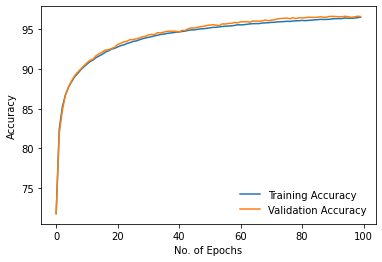

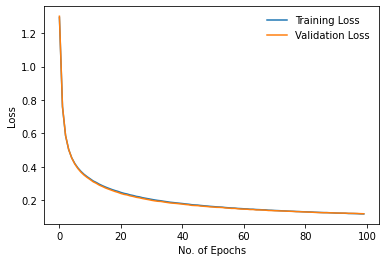

In [16]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/with_bias/stride'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

#### Test Binary stride network:

In [17]:
# load model pre trained binary
binary = True    
maxpooling = False
model_binary_stride, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)

path_model = 'trained_models/MNIST/Binary_models/with_bias/stride'
if torch.cuda.is_available():
  model_binary_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary


In [18]:
evaluate(model_binary_stride, test_loader)

Test Results - Avg accuracy: 96.89 Avg loss: 0.11


### With Maxpooling

In [19]:
# parameters model to load no Binary model
binary = True
maxpooling = True

model, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)
print(name_model)

MNIST_Stochastic_ST_first_conv_binary_maxpooling


ITERATION - loss: 0.93: 100%|█████████▉| 840/844 [00:09<00:00, 154.61it/s]

Training Results - Epoch: 1  Avg accuracy: 76.67 Avg loss: 1.03


ITERATION - loss: 1.17:   2%|▏         | 20/844 [00:10<01:00, 13.54it/s]  

Validation Results - Epoch: 1  Avg accuracy: 76.28 Avg loss: 1.04


ITERATION - loss: 0.68: 100%|█████████▉| 840/844 [00:19<00:00, 159.39it/s]

Training Results - Epoch: 2  Avg accuracy: 84.29 Avg loss: 0.63


ITERATION - loss: 0.71:   2%|▏         | 20/844 [00:19<01:00, 13.58it/s]  

Validation Results - Epoch: 2  Avg accuracy: 84.08 Avg loss: 0.63


ITERATION - loss: 0.56: 850it [00:29, 153.40it/s]

Training Results - Epoch: 3  Avg accuracy: 86.95 Avg loss: 0.49


ITERATION - loss: 0.61:   2%|▏         | 20/844 [00:29<01:02, 13.16it/s]

Validation Results - Epoch: 3  Avg accuracy: 87.17 Avg loss: 0.49


ITERATION - loss: 0.55: 100%|█████████▉| 840/844 [00:39<00:00, 154.81it/s]

Training Results - Epoch: 4  Avg accuracy: 88.38 Avg loss: 0.42


ITERATION - loss: 0.44:   2%|▏         | 20/844 [00:39<01:01, 13.46it/s]  

Validation Results - Epoch: 4  Avg accuracy: 88.92 Avg loss: 0.42


ITERATION - loss: 0.30: 850it [00:49, 153.72it/s]

Training Results - Epoch: 5  Avg accuracy: 89.47 Avg loss: 0.38


ITERATION - loss: 0.49:   2%|▏         | 20/844 [00:49<01:01, 13.37it/s]

Validation Results - Epoch: 5  Avg accuracy: 89.85 Avg loss: 0.37


ITERATION - loss: 0.32: 100%|█████████▉| 840/844 [00:59<00:00, 157.08it/s]

Training Results - Epoch: 6  Avg accuracy: 90.30 Avg loss: 0.34


ITERATION - loss: 0.26:   2%|▏         | 20/844 [00:59<01:01, 13.50it/s]  

Validation Results - Epoch: 6  Avg accuracy: 90.67 Avg loss: 0.34


ITERATION - loss: 0.29: 100%|█████████▉| 840/844 [01:09<00:00, 154.38it/s]

Training Results - Epoch: 7  Avg accuracy: 90.96 Avg loss: 0.32


ITERATION - loss: 0.40:   2%|▏         | 20/844 [01:09<01:01, 13.47it/s]  

Validation Results - Epoch: 7  Avg accuracy: 91.22 Avg loss: 0.31


ITERATION - loss: 0.43: 850it [01:19, 155.74it/s]

Training Results - Epoch: 8  Avg accuracy: 91.54 Avg loss: 0.30


ITERATION - loss: 0.20:   2%|▏         | 20/844 [01:19<01:01, 13.41it/s]

Validation Results - Epoch: 8  Avg accuracy: 92.07 Avg loss: 0.29


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [01:29<00:00, 149.38it/s]

Training Results - Epoch: 9  Avg accuracy: 92.02 Avg loss: 0.28


ITERATION - loss: 0.25:   2%|▏         | 20/844 [01:29<01:02, 13.14it/s]  

Validation Results - Epoch: 9  Avg accuracy: 92.32 Avg loss: 0.27


ITERATION - loss: 0.29: 850it [01:39, 147.46it/s]

Training Results - Epoch: 10  Avg accuracy: 92.36 Avg loss: 0.27


ITERATION - loss: 0.37:   2%|▏         | 20/844 [01:39<01:02, 13.27it/s]

Validation Results - Epoch: 10  Avg accuracy: 92.78 Avg loss: 0.26


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [01:49<00:00, 148.63it/s]

Training Results - Epoch: 11  Avg accuracy: 92.67 Avg loss: 0.25


ITERATION - loss: 0.29:   2%|▏         | 20/844 [01:49<01:01, 13.32it/s]  

Validation Results - Epoch: 11  Avg accuracy: 93.07 Avg loss: 0.25


ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [01:59<00:00, 155.79it/s]

Training Results - Epoch: 12  Avg accuracy: 93.05 Avg loss: 0.24


ITERATION - loss: 0.27:   2%|▏         | 20/844 [01:59<01:01, 13.41it/s]  

Validation Results - Epoch: 12  Avg accuracy: 93.37 Avg loss: 0.23


ITERATION - loss: 0.41: 850it [02:09, 154.64it/s]

Training Results - Epoch: 13  Avg accuracy: 93.21 Avg loss: 0.23


ITERATION - loss: 0.18:   2%|▏         | 20/844 [02:09<01:01, 13.35it/s]

Validation Results - Epoch: 13  Avg accuracy: 93.90 Avg loss: 0.22


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [02:19<00:00, 152.17it/s]

Training Results - Epoch: 14  Avg accuracy: 93.46 Avg loss: 0.22


ITERATION - loss: 0.39:   2%|▏         | 20/844 [02:19<01:01, 13.45it/s]  

Validation Results - Epoch: 14  Avg accuracy: 94.12 Avg loss: 0.22


ITERATION - loss: 0.13: 850it [02:29, 156.95it/s]

Training Results - Epoch: 15  Avg accuracy: 93.75 Avg loss: 0.22


ITERATION - loss: 0.27:   2%|▏         | 20/844 [02:29<01:01, 13.32it/s]

Validation Results - Epoch: 15  Avg accuracy: 94.10 Avg loss: 0.21


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [02:38<00:00, 156.32it/s]

Training Results - Epoch: 16  Avg accuracy: 93.93 Avg loss: 0.21


ITERATION - loss: 0.21:   2%|▏         | 20/844 [02:39<01:00, 13.53it/s]  

Validation Results - Epoch: 16  Avg accuracy: 94.45 Avg loss: 0.20


ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [02:48<00:00, 157.44it/s]

Training Results - Epoch: 17  Avg accuracy: 94.10 Avg loss: 0.20


ITERATION - loss: 0.35:   2%|▏         | 20/844 [02:49<01:00, 13.52it/s]  

Validation Results - Epoch: 17  Avg accuracy: 94.77 Avg loss: 0.20


ITERATION - loss: 0.18: 850it [02:58, 154.70it/s]

Training Results - Epoch: 18  Avg accuracy: 94.24 Avg loss: 0.20


ITERATION - loss: 0.33:   2%|▏         | 20/844 [02:59<01:02, 13.18it/s]

Validation Results - Epoch: 18  Avg accuracy: 94.93 Avg loss: 0.19


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [03:08<00:00, 156.31it/s]

Training Results - Epoch: 19  Avg accuracy: 94.35 Avg loss: 0.19


ITERATION - loss: 0.19:   2%|▏         | 20/844 [03:09<01:01, 13.32it/s]  

Validation Results - Epoch: 19  Avg accuracy: 95.13 Avg loss: 0.18


ITERATION - loss: 0.12: 850it [03:18, 152.53it/s]

Training Results - Epoch: 20  Avg accuracy: 94.50 Avg loss: 0.19


ITERATION - loss: 0.14:   2%|▏         | 20/844 [03:19<01:02, 13.28it/s]

Validation Results - Epoch: 20  Avg accuracy: 95.28 Avg loss: 0.18


ITERATION - loss: 0.36: 100%|█████████▉| 840/844 [03:28<00:00, 155.86it/s]

Training Results - Epoch: 21  Avg accuracy: 94.63 Avg loss: 0.18


ITERATION - loss: 0.12:   2%|▏         | 20/844 [03:29<01:00, 13.54it/s]  

Validation Results - Epoch: 21  Avg accuracy: 95.30 Avg loss: 0.17


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [03:38<00:00, 156.29it/s]

Training Results - Epoch: 22  Avg accuracy: 94.77 Avg loss: 0.18


ITERATION - loss: 0.30:   2%|▏         | 20/844 [03:39<01:00, 13.53it/s]  

Validation Results - Epoch: 22  Avg accuracy: 95.40 Avg loss: 0.17


ITERATION - loss: 0.13: 850it [03:48, 157.13it/s]

Training Results - Epoch: 23  Avg accuracy: 94.91 Avg loss: 0.17


ITERATION - loss: 0.24:   2%|▏         | 20/844 [03:49<01:01, 13.33it/s]

Validation Results - Epoch: 23  Avg accuracy: 95.53 Avg loss: 0.17


ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [03:58<00:00, 152.88it/s]

Training Results - Epoch: 24  Avg accuracy: 94.98 Avg loss: 0.17


ITERATION - loss: 0.20:   2%|▏         | 20/844 [03:58<01:01, 13.47it/s]  

Validation Results - Epoch: 24  Avg accuracy: 95.48 Avg loss: 0.16


ITERATION - loss: 0.07: 850it [04:08, 156.81it/s]

Training Results - Epoch: 25  Avg accuracy: 95.06 Avg loss: 0.17


ITERATION - loss: 0.16:   2%|▏         | 20/844 [04:08<01:01, 13.45it/s]

Validation Results - Epoch: 25  Avg accuracy: 95.65 Avg loss: 0.16


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [04:18<00:00, 156.37it/s]

Training Results - Epoch: 26  Avg accuracy: 95.24 Avg loss: 0.16


ITERATION - loss: 0.17:   2%|▏         | 20/844 [04:18<01:01, 13.48it/s]  

Validation Results - Epoch: 26  Avg accuracy: 95.72 Avg loss: 0.16


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [04:28<00:00, 156.78it/s]

Training Results - Epoch: 27  Avg accuracy: 95.23 Avg loss: 0.16


ITERATION - loss: 0.27:   2%|▏         | 20/844 [04:28<01:01, 13.45it/s]  

Validation Results - Epoch: 27  Avg accuracy: 95.93 Avg loss: 0.15


ITERATION - loss: 0.08: 850it [04:38, 152.86it/s]

Training Results - Epoch: 28  Avg accuracy: 95.36 Avg loss: 0.16


ITERATION - loss: 0.15:   2%|▏         | 20/844 [04:38<01:02, 13.26it/s]

Validation Results - Epoch: 28  Avg accuracy: 95.87 Avg loss: 0.15


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [04:47<00:00, 157.80it/s]

Training Results - Epoch: 29  Avg accuracy: 95.44 Avg loss: 0.16


ITERATION - loss: 0.10:   2%|▏         | 20/844 [04:48<01:00, 13.62it/s]  

Validation Results - Epoch: 29  Avg accuracy: 95.97 Avg loss: 0.15


ITERATION - loss: 0.16: 850it [04:57, 155.63it/s]

Training Results - Epoch: 30  Avg accuracy: 95.53 Avg loss: 0.15


ITERATION - loss: 0.15:   2%|▏         | 20/844 [04:58<01:02, 13.29it/s]

Validation Results - Epoch: 30  Avg accuracy: 96.00 Avg loss: 0.15


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [05:07<00:00, 154.79it/s]

Training Results - Epoch: 31  Avg accuracy: 95.59 Avg loss: 0.15


ITERATION - loss: 0.32:   2%|▏         | 20/844 [05:08<01:00, 13.57it/s]  

Validation Results - Epoch: 31  Avg accuracy: 96.13 Avg loss: 0.14


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [05:17<00:00, 156.15it/s]

Training Results - Epoch: 32  Avg accuracy: 95.67 Avg loss: 0.15


ITERATION - loss: 0.21:   2%|▏         | 20/844 [05:18<01:00, 13.55it/s]  

Validation Results - Epoch: 32  Avg accuracy: 96.10 Avg loss: 0.14


ITERATION - loss: 0.21: 850it [05:27, 157.34it/s]

Training Results - Epoch: 33  Avg accuracy: 95.75 Avg loss: 0.15


ITERATION - loss: 0.15:   2%|▏         | 20/844 [05:28<01:02, 13.26it/s]

Validation Results - Epoch: 33  Avg accuracy: 96.18 Avg loss: 0.14


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [05:37<00:00, 155.70it/s]

Training Results - Epoch: 34  Avg accuracy: 95.76 Avg loss: 0.14


ITERATION - loss: 0.11:   2%|▏         | 20/844 [05:38<01:00, 13.51it/s]  

Validation Results - Epoch: 34  Avg accuracy: 96.18 Avg loss: 0.14


ITERATION - loss: 0.16: 850it [05:47, 154.29it/s]

Training Results - Epoch: 35  Avg accuracy: 95.80 Avg loss: 0.14


ITERATION - loss: 0.18:   2%|▏         | 20/844 [05:48<01:01, 13.33it/s]

Validation Results - Epoch: 35  Avg accuracy: 96.25 Avg loss: 0.14


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [05:57<00:00, 153.57it/s]

Training Results - Epoch: 36  Avg accuracy: 95.90 Avg loss: 0.14


ITERATION - loss: 0.08:   2%|▏         | 20/844 [05:58<01:01, 13.35it/s]  

Validation Results - Epoch: 36  Avg accuracy: 96.42 Avg loss: 0.13


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [06:07<00:00, 156.65it/s]

Training Results - Epoch: 37  Avg accuracy: 95.98 Avg loss: 0.14


ITERATION - loss: 0.06:   2%|▏         | 20/844 [06:08<01:00, 13.54it/s]  

Validation Results - Epoch: 37  Avg accuracy: 96.33 Avg loss: 0.13


ITERATION - loss: 0.07: 850it [06:17, 151.57it/s]

Training Results - Epoch: 38  Avg accuracy: 96.01 Avg loss: 0.14


ITERATION - loss: 0.10:   2%|▏         | 20/844 [06:17<01:01, 13.36it/s]

Validation Results - Epoch: 38  Avg accuracy: 96.33 Avg loss: 0.13


ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [06:27<00:00, 157.12it/s]

Training Results - Epoch: 39  Avg accuracy: 96.03 Avg loss: 0.14


ITERATION - loss: 0.14:   2%|▏         | 20/844 [06:27<01:01, 13.47it/s]  

Validation Results - Epoch: 39  Avg accuracy: 96.40 Avg loss: 0.13


ITERATION - loss: 0.09: 850it [06:37, 150.79it/s]

Training Results - Epoch: 40  Avg accuracy: 96.05 Avg loss: 0.13


ITERATION - loss: 0.08:   2%|▏         | 20/844 [06:37<01:03, 12.97it/s]

Validation Results - Epoch: 40  Avg accuracy: 96.60 Avg loss: 0.13


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [06:47<00:00, 146.93it/s]

Training Results - Epoch: 41  Avg accuracy: 96.11 Avg loss: 0.13


ITERATION - loss: 0.08:   2%|▏         | 20/844 [06:48<01:01, 13.37it/s]  

Validation Results - Epoch: 41  Avg accuracy: 96.60 Avg loss: 0.13


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [06:57<00:00, 157.14it/s]

Training Results - Epoch: 42  Avg accuracy: 96.22 Avg loss: 0.13


ITERATION - loss: 0.13:   2%|▏         | 20/844 [06:57<01:01, 13.50it/s]  

Validation Results - Epoch: 42  Avg accuracy: 96.63 Avg loss: 0.12


ITERATION - loss: 0.12: 850it [07:07, 152.09it/s]

Training Results - Epoch: 43  Avg accuracy: 96.21 Avg loss: 0.13


ITERATION - loss: 0.31:   2%|▏         | 20/844 [07:07<01:02, 13.27it/s]

Validation Results - Epoch: 43  Avg accuracy: 96.70 Avg loss: 0.12


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [07:17<00:00, 152.24it/s]

Training Results - Epoch: 44  Avg accuracy: 96.27 Avg loss: 0.13


ITERATION - loss: 0.26:   2%|▏         | 20/844 [07:17<01:01, 13.34it/s]  

Validation Results - Epoch: 44  Avg accuracy: 96.58 Avg loss: 0.12


ITERATION - loss: 0.13: 850it [07:27, 156.81it/s]

Training Results - Epoch: 45  Avg accuracy: 96.31 Avg loss: 0.13


ITERATION - loss: 0.10:   2%|▏         | 20/844 [07:27<01:01, 13.35it/s]

Validation Results - Epoch: 45  Avg accuracy: 96.73 Avg loss: 0.12


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [07:37<00:00, 156.93it/s]

Training Results - Epoch: 46  Avg accuracy: 96.43 Avg loss: 0.12


ITERATION - loss: 0.05:   2%|▏         | 20/844 [07:37<01:01, 13.51it/s]  

Validation Results - Epoch: 46  Avg accuracy: 96.77 Avg loss: 0.12


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [07:46<00:00, 158.20it/s]

Training Results - Epoch: 47  Avg accuracy: 96.40 Avg loss: 0.12


ITERATION - loss: 0.06:   2%|▏         | 20/844 [07:47<01:01, 13.49it/s]  

Validation Results - Epoch: 47  Avg accuracy: 96.85 Avg loss: 0.12


ITERATION - loss: 0.20: 850it [07:56, 156.14it/s]

Training Results - Epoch: 48  Avg accuracy: 96.47 Avg loss: 0.12


ITERATION - loss: 0.25:   2%|▏         | 20/844 [07:57<01:01, 13.34it/s]

Validation Results - Epoch: 48  Avg accuracy: 96.80 Avg loss: 0.12


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [08:06<00:00, 157.91it/s]

Training Results - Epoch: 49  Avg accuracy: 96.51 Avg loss: 0.12


ITERATION - loss: 0.07:   2%|▏         | 20/844 [08:07<01:00, 13.58it/s]  

Validation Results - Epoch: 49  Avg accuracy: 96.85 Avg loss: 0.12


ITERATION - loss: 0.06: 850it [08:16, 158.41it/s]

Training Results - Epoch: 50  Avg accuracy: 96.51 Avg loss: 0.12


ITERATION - loss: 0.07:   2%|▏         | 20/844 [08:17<01:01, 13.34it/s]

Validation Results - Epoch: 50  Avg accuracy: 96.85 Avg loss: 0.11


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [08:26<00:00, 158.11it/s]

Training Results - Epoch: 51  Avg accuracy: 96.56 Avg loss: 0.12


ITERATION - loss: 0.20:   2%|▏         | 20/844 [08:27<01:01, 13.51it/s]  

Validation Results - Epoch: 51  Avg accuracy: 96.95 Avg loss: 0.11


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [08:36<00:00, 153.71it/s]

Training Results - Epoch: 52  Avg accuracy: 96.60 Avg loss: 0.12


ITERATION - loss: 0.09:   2%|▏         | 20/844 [08:36<01:01, 13.41it/s]  

Validation Results - Epoch: 52  Avg accuracy: 96.90 Avg loss: 0.11


ITERATION - loss: 0.04: 850it [08:46, 154.43it/s]

Training Results - Epoch: 53  Avg accuracy: 96.62 Avg loss: 0.12


ITERATION - loss: 0.22:   2%|▏         | 20/844 [08:46<01:01, 13.34it/s]

Validation Results - Epoch: 53  Avg accuracy: 96.95 Avg loss: 0.11


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [08:56<00:00, 159.42it/s]

Training Results - Epoch: 54  Avg accuracy: 96.65 Avg loss: 0.11


ITERATION - loss: 0.13:   2%|▏         | 20/844 [08:56<01:01, 13.48it/s]  

Validation Results - Epoch: 54  Avg accuracy: 97.02 Avg loss: 0.11


ITERATION - loss: 0.47: 850it [09:06, 159.03it/s]

Training Results - Epoch: 55  Avg accuracy: 96.70 Avg loss: 0.11


ITERATION - loss: 0.14:   2%|▏         | 20/844 [09:06<01:01, 13.39it/s]

Validation Results - Epoch: 55  Avg accuracy: 97.08 Avg loss: 0.11


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [09:15<00:00, 155.03it/s]

Training Results - Epoch: 56  Avg accuracy: 96.75 Avg loss: 0.11


ITERATION - loss: 0.07:   2%|▏         | 20/844 [09:16<01:00, 13.51it/s]  

Validation Results - Epoch: 56  Avg accuracy: 96.90 Avg loss: 0.11


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [09:25<00:00, 158.19it/s]

Training Results - Epoch: 57  Avg accuracy: 96.78 Avg loss: 0.11


ITERATION - loss: 0.46:   2%|▏         | 20/844 [09:26<01:00, 13.52it/s]  

Validation Results - Epoch: 57  Avg accuracy: 97.05 Avg loss: 0.11


ITERATION - loss: 0.15: 850it [09:35, 155.08it/s]

Training Results - Epoch: 58  Avg accuracy: 96.77 Avg loss: 0.11


ITERATION - loss: 0.10:   2%|▏         | 20/844 [09:36<01:01, 13.41it/s]

Validation Results - Epoch: 58  Avg accuracy: 97.03 Avg loss: 0.11


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [09:45<00:00, 155.79it/s]

Training Results - Epoch: 59  Avg accuracy: 96.84 Avg loss: 0.11


ITERATION - loss: 0.11:   2%|▏         | 20/844 [09:46<01:01, 13.38it/s]  

Validation Results - Epoch: 59  Avg accuracy: 97.08 Avg loss: 0.11


ITERATION - loss: 0.10: 850it [09:55, 152.73it/s]

Training Results - Epoch: 60  Avg accuracy: 96.86 Avg loss: 0.11


ITERATION - loss: 0.07:   2%|▏         | 20/844 [09:56<01:02, 13.17it/s]

Validation Results - Epoch: 60  Avg accuracy: 97.15 Avg loss: 0.11


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [10:05<00:00, 159.05it/s]

Training Results - Epoch: 61  Avg accuracy: 96.91 Avg loss: 0.11


ITERATION - loss: 0.07:   2%|▏         | 20/844 [10:06<01:00, 13.54it/s]  

Validation Results - Epoch: 61  Avg accuracy: 97.27 Avg loss: 0.10


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [10:15<00:00, 156.11it/s]

Training Results - Epoch: 62  Avg accuracy: 96.89 Avg loss: 0.11


ITERATION - loss: 0.07:   2%|▏         | 20/844 [10:16<01:01, 13.50it/s]  

Validation Results - Epoch: 62  Avg accuracy: 97.23 Avg loss: 0.10


ITERATION - loss: 0.13: 850it [10:25, 157.37it/s]

Training Results - Epoch: 63  Avg accuracy: 96.96 Avg loss: 0.10


ITERATION - loss: 0.07:   2%|▏         | 20/844 [10:26<01:01, 13.37it/s]

Validation Results - Epoch: 63  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [10:35<00:00, 154.86it/s]

Training Results - Epoch: 64  Avg accuracy: 97.03 Avg loss: 0.10


ITERATION - loss: 0.07:   2%|▏         | 20/844 [10:36<01:00, 13.55it/s]  

Validation Results - Epoch: 64  Avg accuracy: 97.12 Avg loss: 0.10


ITERATION - loss: 0.05: 850it [10:45, 154.16it/s]

Training Results - Epoch: 65  Avg accuracy: 97.02 Avg loss: 0.10


ITERATION - loss: 0.08:   2%|▏         | 20/844 [10:45<01:01, 13.42it/s]

Validation Results - Epoch: 65  Avg accuracy: 97.18 Avg loss: 0.10


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [10:55<00:00, 154.11it/s]

Training Results - Epoch: 66  Avg accuracy: 97.04 Avg loss: 0.10


ITERATION - loss: 0.10:   2%|▏         | 20/844 [10:55<01:00, 13.62it/s]  

Validation Results - Epoch: 66  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [11:05<00:00, 154.78it/s]

Training Results - Epoch: 67  Avg accuracy: 97.03 Avg loss: 0.10


ITERATION - loss: 0.09:   2%|▏         | 20/844 [11:05<01:00, 13.64it/s]  

Validation Results - Epoch: 67  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.19: 850it [11:15, 153.14it/s]

Training Results - Epoch: 68  Avg accuracy: 97.06 Avg loss: 0.10


ITERATION - loss: 0.14:   2%|▏         | 20/844 [11:15<01:02, 13.25it/s]

Validation Results - Epoch: 68  Avg accuracy: 97.28 Avg loss: 0.10


ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [11:25<00:00, 157.73it/s]

Training Results - Epoch: 69  Avg accuracy: 97.12 Avg loss: 0.10


ITERATION - loss: 0.07:   2%|▏         | 20/844 [11:25<01:00, 13.55it/s]  

Validation Results - Epoch: 69  Avg accuracy: 97.25 Avg loss: 0.10


ITERATION - loss: 0.12: 850it [11:34, 150.78it/s]

Training Results - Epoch: 70  Avg accuracy: 97.14 Avg loss: 0.10


ITERATION - loss: 0.24:   2%|▏         | 20/844 [11:35<01:01, 13.35it/s]

Validation Results - Epoch: 70  Avg accuracy: 97.33 Avg loss: 0.10


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [11:45<00:00, 154.17it/s]

Training Results - Epoch: 71  Avg accuracy: 97.13 Avg loss: 0.10


ITERATION - loss: 0.14:   2%|▏         | 20/844 [11:45<01:01, 13.43it/s]  

Validation Results - Epoch: 71  Avg accuracy: 97.27 Avg loss: 0.10


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [11:55<00:00, 153.58it/s]

Training Results - Epoch: 72  Avg accuracy: 97.16 Avg loss: 0.10


ITERATION - loss: 0.14:   2%|▏         | 20/844 [11:55<01:02, 13.25it/s]  

Validation Results - Epoch: 72  Avg accuracy: 97.37 Avg loss: 0.10


ITERATION - loss: 0.05: 850it [12:05, 157.53it/s]

Training Results - Epoch: 73  Avg accuracy: 97.19 Avg loss: 0.10


ITERATION - loss: 0.06:   2%|▏         | 20/844 [12:05<01:01, 13.33it/s]

Validation Results - Epoch: 73  Avg accuracy: 97.38 Avg loss: 0.10


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [12:15<00:00, 155.58it/s]

Training Results - Epoch: 74  Avg accuracy: 97.24 Avg loss: 0.10


ITERATION - loss: 0.09:   2%|▏         | 20/844 [12:15<01:01, 13.47it/s]  

Validation Results - Epoch: 74  Avg accuracy: 97.42 Avg loss: 0.10


ITERATION - loss: 0.02: 850it [12:24, 156.32it/s]

Training Results - Epoch: 75  Avg accuracy: 97.23 Avg loss: 0.10


ITERATION - loss: 0.16:   2%|▏         | 20/844 [12:25<01:01, 13.30it/s]

Validation Results - Epoch: 75  Avg accuracy: 97.43 Avg loss: 0.09


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [12:34<00:00, 153.56it/s]

Training Results - Epoch: 76  Avg accuracy: 97.20 Avg loss: 0.09


ITERATION - loss: 0.20:   2%|▏         | 20/844 [12:35<01:01, 13.49it/s]  

Validation Results - Epoch: 76  Avg accuracy: 97.48 Avg loss: 0.09


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [12:44<00:00, 155.62it/s]

Training Results - Epoch: 77  Avg accuracy: 97.26 Avg loss: 0.09


ITERATION - loss: 0.10:   2%|▏         | 20/844 [12:45<01:01, 13.49it/s]  

Validation Results - Epoch: 77  Avg accuracy: 97.48 Avg loss: 0.09


ITERATION - loss: 0.06: 850it [12:54, 157.09it/s]

Training Results - Epoch: 78  Avg accuracy: 97.25 Avg loss: 0.09


ITERATION - loss: 0.23:   2%|▏         | 20/844 [12:55<01:01, 13.38it/s]

Validation Results - Epoch: 78  Avg accuracy: 97.52 Avg loss: 0.09


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [13:04<00:00, 159.16it/s]

Training Results - Epoch: 79  Avg accuracy: 97.33 Avg loss: 0.09


ITERATION - loss: 0.07:   2%|▏         | 20/844 [13:05<01:00, 13.53it/s]  

Validation Results - Epoch: 79  Avg accuracy: 97.53 Avg loss: 0.09


ITERATION - loss: 0.11: 850it [13:14, 155.27it/s]

Training Results - Epoch: 80  Avg accuracy: 97.33 Avg loss: 0.09


ITERATION - loss: 0.11:   2%|▏         | 20/844 [13:15<01:02, 13.27it/s]

Validation Results - Epoch: 80  Avg accuracy: 97.50 Avg loss: 0.09


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [13:24<00:00, 156.72it/s]

Training Results - Epoch: 81  Avg accuracy: 97.33 Avg loss: 0.09


ITERATION - loss: 0.10:   2%|▏         | 20/844 [13:25<01:00, 13.52it/s]  

Validation Results - Epoch: 81  Avg accuracy: 97.58 Avg loss: 0.09


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [13:34<00:00, 154.02it/s]

Training Results - Epoch: 82  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.07:   2%|▏         | 20/844 [13:34<01:00, 13.56it/s]  

Validation Results - Epoch: 82  Avg accuracy: 97.58 Avg loss: 0.09


ITERATION - loss: 0.06: 850it [13:44, 155.58it/s]

Training Results - Epoch: 83  Avg accuracy: 97.35 Avg loss: 0.09


ITERATION - loss: 0.03:   2%|▏         | 20/844 [13:44<01:01, 13.37it/s]

Validation Results - Epoch: 83  Avg accuracy: 97.60 Avg loss: 0.09


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [13:54<00:00, 154.09it/s]

Training Results - Epoch: 84  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.12:   2%|▏         | 20/844 [13:54<01:01, 13.46it/s]  

Validation Results - Epoch: 84  Avg accuracy: 97.63 Avg loss: 0.09


ITERATION - loss: 0.04: 850it [14:04, 154.18it/s]

Training Results - Epoch: 85  Avg accuracy: 97.41 Avg loss: 0.09


ITERATION - loss: 0.10:   2%|▏         | 20/844 [14:04<01:01, 13.45it/s]

Validation Results - Epoch: 85  Avg accuracy: 97.70 Avg loss: 0.09


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [14:13<00:00, 157.50it/s]

Training Results - Epoch: 86  Avg accuracy: 97.40 Avg loss: 0.09


ITERATION - loss: 0.22:   2%|▏         | 20/844 [14:14<01:00, 13.53it/s]  

Validation Results - Epoch: 86  Avg accuracy: 97.75 Avg loss: 0.09


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [14:23<00:00, 156.74it/s]

Training Results - Epoch: 87  Avg accuracy: 97.40 Avg loss: 0.09


ITERATION - loss: 0.07:   2%|▏         | 20/844 [14:24<01:00, 13.55it/s]  

Validation Results - Epoch: 87  Avg accuracy: 97.68 Avg loss: 0.09


ITERATION - loss: 0.27: 850it [14:33, 152.31it/s]

Training Results - Epoch: 88  Avg accuracy: 97.46 Avg loss: 0.09


ITERATION - loss: 0.08:   2%|▏         | 20/844 [14:34<01:01, 13.47it/s]

Validation Results - Epoch: 88  Avg accuracy: 97.63 Avg loss: 0.09


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [14:43<00:00, 155.18it/s]

Training Results - Epoch: 89  Avg accuracy: 97.43 Avg loss: 0.09


ITERATION - loss: 0.05:   2%|▏         | 20/844 [14:44<01:00, 13.59it/s]  

Validation Results - Epoch: 89  Avg accuracy: 97.67 Avg loss: 0.09


ITERATION - loss: 0.09: 850it [14:53, 157.22it/s]

Training Results - Epoch: 90  Avg accuracy: 97.45 Avg loss: 0.09


ITERATION - loss: 0.04:   2%|▏         | 20/844 [14:54<01:01, 13.43it/s]

Validation Results - Epoch: 90  Avg accuracy: 97.63 Avg loss: 0.09


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [15:03<00:00, 157.45it/s]

Training Results - Epoch: 91  Avg accuracy: 97.49 Avg loss: 0.09


ITERATION - loss: 0.06:   2%|▏         | 20/844 [15:04<01:01, 13.41it/s]  

Validation Results - Epoch: 91  Avg accuracy: 97.72 Avg loss: 0.09


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [15:13<00:00, 155.21it/s]

Training Results - Epoch: 92  Avg accuracy: 97.54 Avg loss: 0.08


ITERATION - loss: 0.07:   2%|▏         | 20/844 [15:13<01:01, 13.48it/s]  

Validation Results - Epoch: 92  Avg accuracy: 97.77 Avg loss: 0.09


ITERATION - loss: 0.03: 850it [15:23, 156.66it/s]

Training Results - Epoch: 93  Avg accuracy: 97.49 Avg loss: 0.08


ITERATION - loss: 0.11:   2%|▏         | 20/844 [15:23<01:02, 13.26it/s]

Validation Results - Epoch: 93  Avg accuracy: 97.77 Avg loss: 0.09


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [15:33<00:00, 152.72it/s]

Training Results - Epoch: 94  Avg accuracy: 97.53 Avg loss: 0.08


ITERATION - loss: 0.07:   2%|▏         | 20/844 [15:33<01:00, 13.62it/s]  

Validation Results - Epoch: 94  Avg accuracy: 97.77 Avg loss: 0.09


ITERATION - loss: 0.04: 850it [15:43, 156.61it/s]

Training Results - Epoch: 95  Avg accuracy: 97.55 Avg loss: 0.08


ITERATION - loss: 0.05:   2%|▏         | 20/844 [15:43<01:01, 13.50it/s]

Validation Results - Epoch: 95  Avg accuracy: 97.80 Avg loss: 0.09


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [15:52<00:00, 157.62it/s]

Training Results - Epoch: 96  Avg accuracy: 97.57 Avg loss: 0.08


ITERATION - loss: 0.11:   2%|▏         | 20/844 [15:53<01:00, 13.58it/s]  

Validation Results - Epoch: 96  Avg accuracy: 97.87 Avg loss: 0.09


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [16:02<00:00, 155.09it/s]

Training Results - Epoch: 97  Avg accuracy: 97.57 Avg loss: 0.08


ITERATION - loss: 0.07:   2%|▏         | 20/844 [16:03<01:00, 13.55it/s]  

Validation Results - Epoch: 97  Avg accuracy: 97.83 Avg loss: 0.08


ITERATION - loss: 0.12: 850it [16:12, 150.28it/s]

Training Results - Epoch: 98  Avg accuracy: 97.59 Avg loss: 0.08


ITERATION - loss: 0.07:   2%|▏         | 20/844 [16:13<01:01, 13.42it/s]

Validation Results - Epoch: 98  Avg accuracy: 97.82 Avg loss: 0.08


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [16:22<00:00, 151.47it/s]

Training Results - Epoch: 99  Avg accuracy: 97.61 Avg loss: 0.08


ITERATION - loss: 0.06:   2%|▏         | 20/844 [16:23<01:00, 13.52it/s]  

Validation Results - Epoch: 99  Avg accuracy: 97.98 Avg loss: 0.08


ITERATION - loss: 0.07: 850it [16:32, 151.20it/s]

Training Results - Epoch: 100  Avg accuracy: 97.60 Avg loss: 0.08


ITERATION - loss: 0.07: 850it [16:33, 151.20it/s]

Validation Results - Epoch: 100  Avg accuracy: 97.87 Avg loss: 0.08


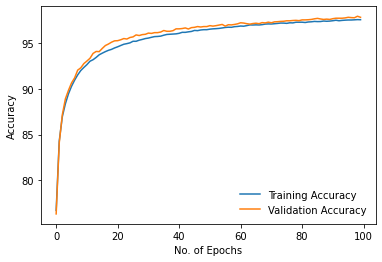

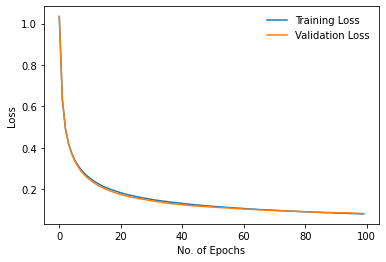

In [20]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/with_bias/maxpooling'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

#### Test Binary maxpooling network:

In [21]:
# load model pre trained binary
binary = True    
maxpooling = True
model_binary_maxpooling, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)

path_model = 'trained_models/MNIST/Binary_models/with_bias/maxpooling'
if torch.cuda.is_available():
  model_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary_maxpooling


In [22]:
evaluate(model_binary_maxpooling, test_loader)

Test Results - Avg accuracy: 97.60 Avg loss: 0.07


## Run mixt model:

### With stride:

In [23]:
# parameters model to load no Binary model
binary = False
mixt = True
maxpooling = False

model, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling, mixt=mixt)
print(name_model)

MNIST_Stochastic_ST_mixt


ITERATION - loss: 0.91: 100%|█████████▉| 840/844 [00:11<00:00, 127.74it/s]

Training Results - Epoch: 1  Avg accuracy: 80.23 Avg loss: 1.00


ITERATION - loss: 0.91: 100%|█████████▉| 840/844 [00:11<00:00, 127.74it/s]

Validation Results - Epoch: 1  Avg accuracy: 79.93 Avg loss: 1.00


ITERATION - loss: 0.81: 100%|█████████▉| 840/844 [00:22<00:00, 134.75it/s]

Training Results - Epoch: 2  Avg accuracy: 85.32 Avg loss: 0.65


ITERATION - loss: 0.78:   2%|▏         | 20/844 [00:23<01:06, 12.39it/s]  

Validation Results - Epoch: 2  Avg accuracy: 85.48 Avg loss: 0.65


ITERATION - loss: 0.61: 850it [00:33, 131.76it/s]

Training Results - Epoch: 3  Avg accuracy: 87.61 Avg loss: 0.51


ITERATION - loss: 0.69:   2%|▏         | 20/844 [00:34<01:07, 12.23it/s]

Validation Results - Epoch: 3  Avg accuracy: 87.62 Avg loss: 0.51


ITERATION - loss: 0.50: 100%|█████████▉| 840/844 [00:45<00:00, 131.72it/s]

Training Results - Epoch: 4  Avg accuracy: 89.09 Avg loss: 0.44


ITERATION - loss: 0.39:   2%|▏         | 20/844 [00:45<01:05, 12.54it/s]  

Validation Results - Epoch: 4  Avg accuracy: 88.92 Avg loss: 0.43


ITERATION - loss: 0.39: 850it [00:56, 132.93it/s]

Training Results - Epoch: 5  Avg accuracy: 90.14 Avg loss: 0.38


ITERATION - loss: 0.53:   2%|▏         | 20/844 [00:56<01:06, 12.38it/s]

Validation Results - Epoch: 5  Avg accuracy: 90.20 Avg loss: 0.38


ITERATION - loss: 0.39: 100%|█████████▉| 840/844 [01:07<00:00, 127.73it/s]

Training Results - Epoch: 6  Avg accuracy: 90.80 Avg loss: 0.35


ITERATION - loss: 0.29:   2%|▏         | 20/844 [01:08<01:06, 12.48it/s]  

Validation Results - Epoch: 6  Avg accuracy: 90.82 Avg loss: 0.34


ITERATION - loss: 0.33: 100%|█████████▉| 840/844 [01:18<00:00, 133.67it/s]

Training Results - Epoch: 7  Avg accuracy: 91.37 Avg loss: 0.32


ITERATION - loss: 0.37:   2%|▏         | 20/844 [01:19<01:05, 12.50it/s]  

Validation Results - Epoch: 7  Avg accuracy: 91.58 Avg loss: 0.32


ITERATION - loss: 0.41: 850it [01:30, 131.87it/s]

Training Results - Epoch: 8  Avg accuracy: 91.89 Avg loss: 0.30


ITERATION - loss: 0.23:   2%|▏         | 20/844 [01:30<01:06, 12.32it/s]

Validation Results - Epoch: 8  Avg accuracy: 92.22 Avg loss: 0.29


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [01:41<00:00, 135.11it/s]

Training Results - Epoch: 9  Avg accuracy: 92.30 Avg loss: 0.28


ITERATION - loss: 0.20:   2%|▏         | 20/844 [01:41<01:05, 12.60it/s]  

Validation Results - Epoch: 9  Avg accuracy: 92.78 Avg loss: 0.28


ITERATION - loss: 0.28: 850it [01:52, 130.81it/s]

Training Results - Epoch: 10  Avg accuracy: 92.57 Avg loss: 0.27


ITERATION - loss: 0.33:   2%|▏         | 20/844 [01:52<01:06, 12.42it/s]

Validation Results - Epoch: 10  Avg accuracy: 93.05 Avg loss: 0.26


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [02:03<00:00, 133.37it/s]

Training Results - Epoch: 11  Avg accuracy: 92.87 Avg loss: 0.26


ITERATION - loss: 0.24:   2%|▏         | 20/844 [02:04<01:05, 12.58it/s]  

Validation Results - Epoch: 11  Avg accuracy: 93.25 Avg loss: 0.25


ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [02:14<00:00, 134.03it/s]

Training Results - Epoch: 12  Avg accuracy: 93.16 Avg loss: 0.24


ITERATION - loss: 0.25:   2%|▏         | 20/844 [02:15<01:05, 12.58it/s]  

Validation Results - Epoch: 12  Avg accuracy: 93.50 Avg loss: 0.24


ITERATION - loss: 0.38: 850it [02:25, 133.87it/s]

Training Results - Epoch: 13  Avg accuracy: 93.36 Avg loss: 0.24


ITERATION - loss: 0.16:   2%|▏         | 20/844 [02:26<01:07, 12.26it/s]

Validation Results - Epoch: 13  Avg accuracy: 93.58 Avg loss: 0.23


ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [02:37<00:00, 132.93it/s]

Training Results - Epoch: 14  Avg accuracy: 93.59 Avg loss: 0.23


ITERATION - loss: 0.30:   2%|▏         | 20/844 [02:37<01:05, 12.56it/s]  

Validation Results - Epoch: 14  Avg accuracy: 93.80 Avg loss: 0.22


ITERATION - loss: 0.13: 850it [02:48, 128.61it/s]

Training Results - Epoch: 15  Avg accuracy: 93.77 Avg loss: 0.22


ITERATION - loss: 0.31:   2%|▏         | 20/844 [02:48<01:06, 12.31it/s]

Validation Results - Epoch: 15  Avg accuracy: 94.07 Avg loss: 0.21


ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [02:59<00:00, 133.28it/s]

Training Results - Epoch: 16  Avg accuracy: 93.96 Avg loss: 0.21


ITERATION - loss: 0.20:   2%|▏         | 20/844 [03:00<01:05, 12.49it/s]  

Validation Results - Epoch: 16  Avg accuracy: 94.25 Avg loss: 0.21


ITERATION - loss: 0.27: 100%|█████████▉| 840/844 [03:10<00:00, 132.93it/s]

Training Results - Epoch: 17  Avg accuracy: 94.13 Avg loss: 0.21


ITERATION - loss: 0.33:   2%|▏         | 20/844 [03:11<01:06, 12.45it/s]  

Validation Results - Epoch: 17  Avg accuracy: 94.30 Avg loss: 0.20


ITERATION - loss: 0.22: 850it [03:21, 130.84it/s]

Training Results - Epoch: 18  Avg accuracy: 94.29 Avg loss: 0.20


ITERATION - loss: 0.31:   2%|▏         | 20/844 [03:22<01:06, 12.34it/s]

Validation Results - Epoch: 18  Avg accuracy: 94.38 Avg loss: 0.20


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [03:33<00:00, 131.90it/s]

Training Results - Epoch: 19  Avg accuracy: 94.39 Avg loss: 0.20


ITERATION - loss: 0.21:   2%|▏         | 20/844 [03:33<01:06, 12.39it/s]  

Validation Results - Epoch: 19  Avg accuracy: 94.47 Avg loss: 0.19


ITERATION - loss: 0.12: 850it [03:44, 133.33it/s]

Training Results - Epoch: 20  Avg accuracy: 94.50 Avg loss: 0.19


ITERATION - loss: 0.12:   2%|▏         | 20/844 [03:44<01:07, 12.25it/s]

Validation Results - Epoch: 20  Avg accuracy: 94.57 Avg loss: 0.19


ITERATION - loss: 0.38: 100%|█████████▉| 840/844 [03:55<00:00, 128.79it/s]

Training Results - Epoch: 21  Avg accuracy: 94.66 Avg loss: 0.19


ITERATION - loss: 0.12:   2%|▏         | 20/844 [03:56<01:05, 12.49it/s]  

Validation Results - Epoch: 21  Avg accuracy: 94.73 Avg loss: 0.18


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [04:06<00:00, 128.34it/s]

Training Results - Epoch: 22  Avg accuracy: 94.77 Avg loss: 0.18


ITERATION - loss: 0.37:   2%|▏         | 20/844 [04:07<01:07, 12.28it/s]  

Validation Results - Epoch: 22  Avg accuracy: 94.80 Avg loss: 0.18


ITERATION - loss: 0.17: 850it [04:18, 132.58it/s]

Training Results - Epoch: 23  Avg accuracy: 94.87 Avg loss: 0.18


ITERATION - loss: 0.31:   2%|▏         | 20/844 [04:18<01:06, 12.38it/s]

Validation Results - Epoch: 23  Avg accuracy: 94.83 Avg loss: 0.17


ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [04:29<00:00, 129.69it/s]

Training Results - Epoch: 24  Avg accuracy: 94.98 Avg loss: 0.17


ITERATION - loss: 0.20:   2%|▏         | 20/844 [04:29<01:05, 12.51it/s]  

Validation Results - Epoch: 24  Avg accuracy: 94.92 Avg loss: 0.17


ITERATION - loss: 0.07: 850it [04:40, 129.77it/s]

Training Results - Epoch: 25  Avg accuracy: 95.04 Avg loss: 0.17


ITERATION - loss: 0.15:   2%|▏         | 20/844 [04:41<01:06, 12.37it/s]

Validation Results - Epoch: 25  Avg accuracy: 95.22 Avg loss: 0.17


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [04:51<00:00, 134.48it/s]

Training Results - Epoch: 26  Avg accuracy: 95.17 Avg loss: 0.17


ITERATION - loss: 0.21:   2%|▏         | 20/844 [04:52<01:05, 12.53it/s]  

Validation Results - Epoch: 26  Avg accuracy: 95.23 Avg loss: 0.16


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [05:02<00:00, 131.76it/s]

Training Results - Epoch: 27  Avg accuracy: 95.21 Avg loss: 0.17


ITERATION - loss: 0.24:   2%|▏         | 20/844 [05:03<01:05, 12.55it/s]  

Validation Results - Epoch: 27  Avg accuracy: 95.38 Avg loss: 0.16


ITERATION - loss: 0.06: 850it [05:14, 131.96it/s]

Training Results - Epoch: 28  Avg accuracy: 95.37 Avg loss: 0.16


ITERATION - loss: 0.18:   2%|▏         | 20/844 [05:14<01:07, 12.19it/s]

Validation Results - Epoch: 28  Avg accuracy: 95.48 Avg loss: 0.16


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [05:25<00:00, 131.46it/s]

Training Results - Epoch: 29  Avg accuracy: 95.44 Avg loss: 0.16


ITERATION - loss: 0.09:   2%|▏         | 20/844 [05:25<01:06, 12.33it/s]  

Validation Results - Epoch: 29  Avg accuracy: 95.57 Avg loss: 0.15


ITERATION - loss: 0.17: 850it [05:36, 132.06it/s]

Training Results - Epoch: 30  Avg accuracy: 95.48 Avg loss: 0.16


ITERATION - loss: 0.17:   2%|▏         | 20/844 [05:37<01:08, 12.04it/s]

Validation Results - Epoch: 30  Avg accuracy: 95.75 Avg loss: 0.15


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [05:48<00:00, 130.56it/s]

Training Results - Epoch: 31  Avg accuracy: 95.56 Avg loss: 0.15


ITERATION - loss: 0.27:   2%|▏         | 20/844 [05:48<01:06, 12.41it/s]  

Validation Results - Epoch: 31  Avg accuracy: 95.85 Avg loss: 0.15


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [05:59<00:00, 128.97it/s]

Training Results - Epoch: 32  Avg accuracy: 95.64 Avg loss: 0.15


ITERATION - loss: 0.21:   2%|▏         | 20/844 [05:59<01:06, 12.48it/s]  

Validation Results - Epoch: 32  Avg accuracy: 95.88 Avg loss: 0.14


ITERATION - loss: 0.21: 850it [06:10, 131.95it/s]

Training Results - Epoch: 33  Avg accuracy: 95.69 Avg loss: 0.15


ITERATION - loss: 0.15:   2%|▏         | 20/844 [06:11<01:07, 12.23it/s]

Validation Results - Epoch: 33  Avg accuracy: 96.05 Avg loss: 0.14


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [06:21<00:00, 133.04it/s]

Training Results - Epoch: 34  Avg accuracy: 95.74 Avg loss: 0.15


ITERATION - loss: 0.12:   2%|▏         | 20/844 [06:22<01:06, 12.46it/s]  

Validation Results - Epoch: 34  Avg accuracy: 96.02 Avg loss: 0.14


ITERATION - loss: 0.14: 850it [06:33, 131.09it/s]

Training Results - Epoch: 35  Avg accuracy: 95.79 Avg loss: 0.14


ITERATION - loss: 0.19:   2%|▏         | 20/844 [06:33<01:06, 12.39it/s]

Validation Results - Epoch: 35  Avg accuracy: 96.05 Avg loss: 0.14


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [06:44<00:00, 129.96it/s]

Training Results - Epoch: 36  Avg accuracy: 95.85 Avg loss: 0.14


ITERATION - loss: 0.08:   2%|▏         | 20/844 [06:44<01:06, 12.31it/s]  

Validation Results - Epoch: 36  Avg accuracy: 96.23 Avg loss: 0.14


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [06:55<00:00, 132.04it/s]

Training Results - Epoch: 37  Avg accuracy: 95.91 Avg loss: 0.14


ITERATION - loss: 0.16:   2%|▏         | 20/844 [06:56<01:06, 12.42it/s]  

Validation Results - Epoch: 37  Avg accuracy: 96.15 Avg loss: 0.13


ITERATION - loss: 0.08: 850it [07:06, 131.89it/s]

Training Results - Epoch: 38  Avg accuracy: 95.97 Avg loss: 0.14


ITERATION - loss: 0.08:   2%|▏         | 20/844 [07:07<01:06, 12.30it/s]

Validation Results - Epoch: 38  Avg accuracy: 96.23 Avg loss: 0.13


ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [07:17<00:00, 129.09it/s]

Training Results - Epoch: 39  Avg accuracy: 96.00 Avg loss: 0.14


ITERATION - loss: 0.15:   2%|▏         | 20/844 [07:18<01:05, 12.51it/s]  

Validation Results - Epoch: 39  Avg accuracy: 96.33 Avg loss: 0.13


ITERATION - loss: 0.09: 850it [07:29, 128.67it/s]

Training Results - Epoch: 40  Avg accuracy: 96.01 Avg loss: 0.14


ITERATION - loss: 0.05:   2%|▏         | 20/844 [07:29<01:07, 12.29it/s]

Validation Results - Epoch: 40  Avg accuracy: 96.47 Avg loss: 0.13


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [07:40<00:00, 133.70it/s]

Training Results - Epoch: 41  Avg accuracy: 96.07 Avg loss: 0.13


ITERATION - loss: 0.11:   2%|▏         | 20/844 [07:41<01:06, 12.45it/s]  

Validation Results - Epoch: 41  Avg accuracy: 96.37 Avg loss: 0.13


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [07:51<00:00, 135.55it/s]

Training Results - Epoch: 42  Avg accuracy: 96.12 Avg loss: 0.13


ITERATION - loss: 0.10:   2%|▏         | 20/844 [07:52<01:06, 12.41it/s]  

Validation Results - Epoch: 42  Avg accuracy: 96.48 Avg loss: 0.13


ITERATION - loss: 0.11: 850it [08:02, 130.48it/s]

Training Results - Epoch: 43  Avg accuracy: 96.18 Avg loss: 0.13


ITERATION - loss: 0.25:   2%|▏         | 20/844 [08:03<01:07, 12.21it/s]

Validation Results - Epoch: 43  Avg accuracy: 96.50 Avg loss: 0.12


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [08:14<00:00, 132.34it/s]

Training Results - Epoch: 44  Avg accuracy: 96.26 Avg loss: 0.13


ITERATION - loss: 0.18:   2%|▏         | 20/844 [08:14<01:05, 12.51it/s]  

Validation Results - Epoch: 44  Avg accuracy: 96.47 Avg loss: 0.12


ITERATION - loss: 0.13: 850it [08:25, 132.73it/s]

Training Results - Epoch: 45  Avg accuracy: 96.30 Avg loss: 0.13


ITERATION - loss: 0.11:   2%|▏         | 20/844 [08:26<01:07, 12.29it/s]

Validation Results - Epoch: 45  Avg accuracy: 96.50 Avg loss: 0.12


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [08:36<00:00, 133.53it/s]

Training Results - Epoch: 46  Avg accuracy: 96.33 Avg loss: 0.13


ITERATION - loss: 0.04:   2%|▏         | 20/844 [08:37<01:06, 12.47it/s]  

Validation Results - Epoch: 46  Avg accuracy: 96.53 Avg loss: 0.12


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [08:47<00:00, 133.18it/s]

Training Results - Epoch: 47  Avg accuracy: 96.39 Avg loss: 0.12


ITERATION - loss: 0.05:   2%|▏         | 20/844 [08:48<01:05, 12.54it/s]  

Validation Results - Epoch: 47  Avg accuracy: 96.57 Avg loss: 0.12


ITERATION - loss: 0.13: 850it [08:59, 132.97it/s]

Training Results - Epoch: 48  Avg accuracy: 96.40 Avg loss: 0.12


ITERATION - loss: 0.29:   2%|▏         | 20/844 [08:59<01:06, 12.35it/s]

Validation Results - Epoch: 48  Avg accuracy: 96.60 Avg loss: 0.12


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [09:10<00:00, 131.55it/s]

Training Results - Epoch: 49  Avg accuracy: 96.46 Avg loss: 0.12


ITERATION - loss: 0.10:   2%|▏         | 20/844 [09:10<01:06, 12.47it/s]  

Validation Results - Epoch: 49  Avg accuracy: 96.65 Avg loss: 0.12


ITERATION - loss: 0.08: 850it [09:21, 130.41it/s]

Training Results - Epoch: 50  Avg accuracy: 96.50 Avg loss: 0.12


ITERATION - loss: 0.07:   2%|▏         | 20/844 [09:22<01:07, 12.26it/s]

Validation Results - Epoch: 50  Avg accuracy: 96.73 Avg loss: 0.11


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [09:32<00:00, 131.52it/s]

Training Results - Epoch: 51  Avg accuracy: 96.56 Avg loss: 0.12


ITERATION - loss: 0.18:   2%|▏         | 20/844 [09:33<01:06, 12.33it/s]  

Validation Results - Epoch: 51  Avg accuracy: 96.70 Avg loss: 0.11


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [09:44<00:00, 133.29it/s]

Training Results - Epoch: 52  Avg accuracy: 96.55 Avg loss: 0.12


ITERATION - loss: 0.08:   2%|▏         | 20/844 [09:44<01:06, 12.48it/s]  

Validation Results - Epoch: 52  Avg accuracy: 96.82 Avg loss: 0.11


ITERATION - loss: 0.05: 850it [09:55, 132.41it/s]

Training Results - Epoch: 53  Avg accuracy: 96.56 Avg loss: 0.12


ITERATION - loss: 0.17:   2%|▏         | 20/844 [09:56<01:07, 12.29it/s]

Validation Results - Epoch: 53  Avg accuracy: 96.77 Avg loss: 0.11


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [10:06<00:00, 132.12it/s]

Training Results - Epoch: 54  Avg accuracy: 96.63 Avg loss: 0.12


ITERATION - loss: 0.12:   2%|▏         | 20/844 [10:07<01:05, 12.55it/s]  

Validation Results - Epoch: 54  Avg accuracy: 96.80 Avg loss: 0.11


ITERATION - loss: 0.53: 850it [10:17, 132.59it/s]

Training Results - Epoch: 55  Avg accuracy: 96.64 Avg loss: 0.11


ITERATION - loss: 0.08:   2%|▏         | 20/844 [10:18<01:07, 12.15it/s]

Validation Results - Epoch: 55  Avg accuracy: 96.72 Avg loss: 0.11


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [10:29<00:00, 132.64it/s]

Training Results - Epoch: 56  Avg accuracy: 96.67 Avg loss: 0.11


ITERATION - loss: 0.08:   2%|▏         | 20/844 [10:29<01:06, 12.42it/s]  

Validation Results - Epoch: 56  Avg accuracy: 96.85 Avg loss: 0.11


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [10:40<00:00, 131.22it/s]

Training Results - Epoch: 57  Avg accuracy: 96.75 Avg loss: 0.11


ITERATION - loss: 0.48:   2%|▏         | 20/844 [10:41<01:06, 12.31it/s]  

Validation Results - Epoch: 57  Avg accuracy: 96.83 Avg loss: 0.11


ITERATION - loss: 0.18: 850it [10:52, 127.84it/s]

Training Results - Epoch: 58  Avg accuracy: 96.76 Avg loss: 0.11


ITERATION - loss: 0.13:   2%|▏         | 20/844 [10:53<01:08, 12.00it/s]

Validation Results - Epoch: 58  Avg accuracy: 96.95 Avg loss: 0.11


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [11:03<00:00, 132.00it/s]

Training Results - Epoch: 59  Avg accuracy: 96.78 Avg loss: 0.11


ITERATION - loss: 0.09:   2%|▏         | 20/844 [11:04<01:06, 12.42it/s]  

Validation Results - Epoch: 59  Avg accuracy: 96.97 Avg loss: 0.11


ITERATION - loss: 0.08: 850it [11:15, 130.29it/s]

Training Results - Epoch: 60  Avg accuracy: 96.83 Avg loss: 0.11


ITERATION - loss: 0.10:   2%|▏         | 20/844 [11:15<01:08, 12.05it/s]

Validation Results - Epoch: 60  Avg accuracy: 96.93 Avg loss: 0.10


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [11:26<00:00, 130.44it/s]

Training Results - Epoch: 61  Avg accuracy: 96.85 Avg loss: 0.11


ITERATION - loss: 0.06:   2%|▏         | 20/844 [11:27<01:06, 12.35it/s]  

Validation Results - Epoch: 61  Avg accuracy: 96.88 Avg loss: 0.10


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [11:37<00:00, 131.76it/s]

Training Results - Epoch: 62  Avg accuracy: 96.88 Avg loss: 0.11


ITERATION - loss: 0.07:   2%|▏         | 20/844 [11:38<01:06, 12.42it/s]  

Validation Results - Epoch: 62  Avg accuracy: 97.03 Avg loss: 0.10


ITERATION - loss: 0.15: 850it [11:49, 130.31it/s]

Training Results - Epoch: 63  Avg accuracy: 96.92 Avg loss: 0.10


ITERATION - loss: 0.07:   2%|▏         | 20/844 [11:49<01:07, 12.23it/s]

Validation Results - Epoch: 63  Avg accuracy: 97.02 Avg loss: 0.10


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [12:00<00:00, 133.00it/s]

Training Results - Epoch: 64  Avg accuracy: 96.95 Avg loss: 0.10


ITERATION - loss: 0.07:   2%|▏         | 20/844 [12:00<01:05, 12.51it/s]  

Validation Results - Epoch: 64  Avg accuracy: 97.05 Avg loss: 0.10


ITERATION - loss: 0.06: 850it [12:11, 132.08it/s]

Training Results - Epoch: 65  Avg accuracy: 96.99 Avg loss: 0.10


ITERATION - loss: 0.06:   2%|▏         | 20/844 [12:12<01:07, 12.17it/s]

Validation Results - Epoch: 65  Avg accuracy: 97.08 Avg loss: 0.10


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [12:22<00:00, 130.06it/s]

Training Results - Epoch: 66  Avg accuracy: 96.99 Avg loss: 0.10


ITERATION - loss: 0.09:   2%|▏         | 20/844 [12:23<01:06, 12.47it/s]  

Validation Results - Epoch: 66  Avg accuracy: 97.08 Avg loss: 0.10


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [12:34<00:00, 133.79it/s]

Training Results - Epoch: 67  Avg accuracy: 97.05 Avg loss: 0.10


ITERATION - loss: 0.14:   2%|▏         | 20/844 [12:34<01:05, 12.51it/s]  

Validation Results - Epoch: 67  Avg accuracy: 97.15 Avg loss: 0.10


ITERATION - loss: 0.11: 850it [12:45, 132.09it/s]

Training Results - Epoch: 68  Avg accuracy: 97.05 Avg loss: 0.10


ITERATION - loss: 0.10:   2%|▏         | 20/844 [12:45<01:06, 12.31it/s]

Validation Results - Epoch: 68  Avg accuracy: 97.13 Avg loss: 0.10


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [12:56<00:00, 128.27it/s]

Training Results - Epoch: 69  Avg accuracy: 97.10 Avg loss: 0.10


ITERATION - loss: 0.05:   2%|▏         | 20/844 [12:57<01:06, 12.41it/s]  

Validation Results - Epoch: 69  Avg accuracy: 97.20 Avg loss: 0.10


ITERATION - loss: 0.10: 850it [13:07, 134.63it/s]

Training Results - Epoch: 70  Avg accuracy: 97.09 Avg loss: 0.10


ITERATION - loss: 0.21:   2%|▏         | 20/844 [13:08<01:06, 12.34it/s]

Validation Results - Epoch: 70  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [13:18<00:00, 131.17it/s]

Training Results - Epoch: 71  Avg accuracy: 97.13 Avg loss: 0.10


ITERATION - loss: 0.15:   2%|▏         | 20/844 [13:19<01:06, 12.46it/s]  

Validation Results - Epoch: 71  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [13:30<00:00, 127.14it/s]

Training Results - Epoch: 72  Avg accuracy: 97.13 Avg loss: 0.10


ITERATION - loss: 0.09:   2%|▏         | 20/844 [13:30<01:07, 12.19it/s]  

Validation Results - Epoch: 72  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.07: 850it [13:41, 129.87it/s]

Training Results - Epoch: 73  Avg accuracy: 97.16 Avg loss: 0.10


ITERATION - loss: 0.10:   2%|▏         | 20/844 [13:42<01:07, 12.28it/s]

Validation Results - Epoch: 73  Avg accuracy: 97.20 Avg loss: 0.09


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [13:52<00:00, 131.79it/s]

Training Results - Epoch: 74  Avg accuracy: 97.18 Avg loss: 0.10


ITERATION - loss: 0.12:   2%|▏         | 20/844 [13:53<01:06, 12.46it/s]  

Validation Results - Epoch: 74  Avg accuracy: 97.27 Avg loss: 0.09


ITERATION - loss: 0.05: 850it [14:04, 131.55it/s]

Training Results - Epoch: 75  Avg accuracy: 97.21 Avg loss: 0.10


ITERATION - loss: 0.16:   2%|▏         | 20/844 [14:04<01:07, 12.21it/s]

Validation Results - Epoch: 75  Avg accuracy: 97.27 Avg loss: 0.09


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [14:15<00:00, 133.59it/s]

Training Results - Epoch: 76  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.14:   2%|▏         | 20/844 [14:16<01:05, 12.52it/s]  

Validation Results - Epoch: 76  Avg accuracy: 97.27 Avg loss: 0.09


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [14:26<00:00, 131.95it/s]

Training Results - Epoch: 77  Avg accuracy: 97.23 Avg loss: 0.09


ITERATION - loss: 0.19:   2%|▏         | 20/844 [14:27<01:06, 12.43it/s]  

Validation Results - Epoch: 77  Avg accuracy: 97.35 Avg loss: 0.09


ITERATION - loss: 0.06: 850it [14:38, 130.16it/s]

Training Results - Epoch: 78  Avg accuracy: 97.25 Avg loss: 0.09


ITERATION - loss: 0.22:   2%|▏         | 20/844 [14:38<01:07, 12.14it/s]

Validation Results - Epoch: 78  Avg accuracy: 97.38 Avg loss: 0.09


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [14:49<00:00, 131.42it/s]

Training Results - Epoch: 79  Avg accuracy: 97.26 Avg loss: 0.09


ITERATION - loss: 0.07:   2%|▏         | 20/844 [14:50<01:06, 12.30it/s]  

Validation Results - Epoch: 79  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.07: 850it [15:00, 133.17it/s]

Training Results - Epoch: 80  Avg accuracy: 97.27 Avg loss: 0.09


ITERATION - loss: 0.11:   2%|▏         | 20/844 [15:01<01:06, 12.35it/s]

Validation Results - Epoch: 80  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [15:11<00:00, 132.62it/s]

Training Results - Epoch: 81  Avg accuracy: 97.32 Avg loss: 0.09


ITERATION - loss: 0.07:   2%|▏         | 20/844 [15:12<01:06, 12.41it/s]  

Validation Results - Epoch: 81  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [15:23<00:00, 133.19it/s]

Training Results - Epoch: 82  Avg accuracy: 97.32 Avg loss: 0.09


ITERATION - loss: 0.09:   2%|▏         | 20/844 [15:23<01:06, 12.41it/s]  

Validation Results - Epoch: 82  Avg accuracy: 97.40 Avg loss: 0.09


ITERATION - loss: 0.04: 850it [15:34, 128.67it/s]

Training Results - Epoch: 83  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.05:   2%|▏         | 20/844 [15:35<01:06, 12.34it/s]

Validation Results - Epoch: 83  Avg accuracy: 97.47 Avg loss: 0.09


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [15:45<00:00, 132.02it/s]

Training Results - Epoch: 84  Avg accuracy: 97.34 Avg loss: 0.09


ITERATION - loss: 0.06:   2%|▏         | 20/844 [15:46<01:05, 12.50it/s]  

Validation Results - Epoch: 84  Avg accuracy: 97.45 Avg loss: 0.09


ITERATION - loss: 0.09: 850it [15:57, 131.86it/s]

Training Results - Epoch: 85  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.06:   2%|▏         | 20/844 [15:57<01:08, 12.01it/s]

Validation Results - Epoch: 85  Avg accuracy: 97.45 Avg loss: 0.09


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [16:08<00:00, 125.07it/s]

Training Results - Epoch: 86  Avg accuracy: 97.40 Avg loss: 0.09


ITERATION - loss: 0.18:   2%|▏         | 20/844 [16:09<01:07, 12.26it/s]  

Validation Results - Epoch: 86  Avg accuracy: 97.38 Avg loss: 0.09


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [16:19<00:00, 130.34it/s]

Training Results - Epoch: 87  Avg accuracy: 97.40 Avg loss: 0.09


ITERATION - loss: 0.05:   2%|▏         | 20/844 [16:20<01:06, 12.45it/s]  

Validation Results - Epoch: 87  Avg accuracy: 97.53 Avg loss: 0.09


ITERATION - loss: 0.29: 850it [16:31, 130.43it/s]

Training Results - Epoch: 88  Avg accuracy: 97.41 Avg loss: 0.09


ITERATION - loss: 0.08:   2%|▏         | 20/844 [16:31<01:07, 12.26it/s]

Validation Results - Epoch: 88  Avg accuracy: 97.57 Avg loss: 0.09


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [16:42<00:00, 131.30it/s]

Training Results - Epoch: 89  Avg accuracy: 97.43 Avg loss: 0.09


ITERATION - loss: 0.06:   2%|▏         | 20/844 [16:43<01:06, 12.48it/s]  

Validation Results - Epoch: 89  Avg accuracy: 97.58 Avg loss: 0.09


ITERATION - loss: 0.12: 850it [16:53, 132.39it/s]

Training Results - Epoch: 90  Avg accuracy: 97.46 Avg loss: 0.09


ITERATION - loss: 0.09:   2%|▏         | 20/844 [16:54<01:07, 12.20it/s]

Validation Results - Epoch: 90  Avg accuracy: 97.47 Avg loss: 0.09


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [17:04<00:00, 131.48it/s]

Training Results - Epoch: 91  Avg accuracy: 97.48 Avg loss: 0.09


ITERATION - loss: 0.06:   2%|▏         | 20/844 [17:05<01:05, 12.49it/s]  

Validation Results - Epoch: 91  Avg accuracy: 97.53 Avg loss: 0.09


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [17:16<00:00, 132.13it/s]

Training Results - Epoch: 92  Avg accuracy: 97.50 Avg loss: 0.09


ITERATION - loss: 0.09:   2%|▏         | 20/844 [17:16<01:06, 12.45it/s]  

Validation Results - Epoch: 92  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.04: 850it [17:27, 126.14it/s]

Training Results - Epoch: 93  Avg accuracy: 97.49 Avg loss: 0.09


ITERATION - loss: 0.20:   2%|▏         | 20/844 [17:28<01:08, 12.03it/s]

Validation Results - Epoch: 93  Avg accuracy: 97.60 Avg loss: 0.09


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [17:38<00:00, 131.44it/s]

Training Results - Epoch: 94  Avg accuracy: 97.51 Avg loss: 0.09


ITERATION - loss: 0.07:   2%|▏         | 20/844 [17:39<01:06, 12.48it/s]  

Validation Results - Epoch: 94  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.04: 850it [17:50, 134.98it/s]

Training Results - Epoch: 95  Avg accuracy: 97.54 Avg loss: 0.08


ITERATION - loss: 0.07:   2%|▏         | 20/844 [17:50<01:06, 12.37it/s]

Validation Results - Epoch: 95  Avg accuracy: 97.57 Avg loss: 0.09


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [18:01<00:00, 128.26it/s]

Training Results - Epoch: 96  Avg accuracy: 97.54 Avg loss: 0.08


ITERATION - loss: 0.12:   2%|▏         | 20/844 [18:02<01:06, 12.44it/s]  

Validation Results - Epoch: 96  Avg accuracy: 97.57 Avg loss: 0.08


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [18:12<00:00, 133.04it/s]

Training Results - Epoch: 97  Avg accuracy: 97.57 Avg loss: 0.08


ITERATION - loss: 0.10:   2%|▏         | 20/844 [18:13<01:06, 12.45it/s]  

Validation Results - Epoch: 97  Avg accuracy: 97.68 Avg loss: 0.08


ITERATION - loss: 0.09: 850it [18:23, 132.09it/s]

Training Results - Epoch: 98  Avg accuracy: 97.58 Avg loss: 0.08


ITERATION - loss: 0.08:   2%|▏         | 20/844 [18:24<01:07, 12.28it/s]

Validation Results - Epoch: 98  Avg accuracy: 97.63 Avg loss: 0.08


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [18:35<00:00, 132.81it/s]

Training Results - Epoch: 99  Avg accuracy: 97.61 Avg loss: 0.08


ITERATION - loss: 0.07:   2%|▏         | 20/844 [18:35<01:06, 12.36it/s]  

Validation Results - Epoch: 99  Avg accuracy: 97.65 Avg loss: 0.08


ITERATION - loss: 0.04: 850it [18:46, 133.52it/s]

Training Results - Epoch: 100  Avg accuracy: 97.63 Avg loss: 0.08


ITERATION - loss: 0.04: 850it [18:46, 133.52it/s]

Validation Results - Epoch: 100  Avg accuracy: 97.60 Avg loss: 0.08


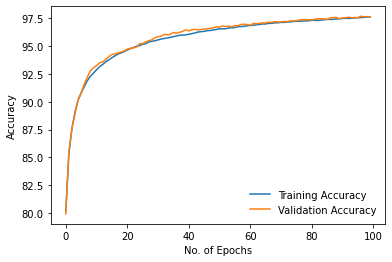

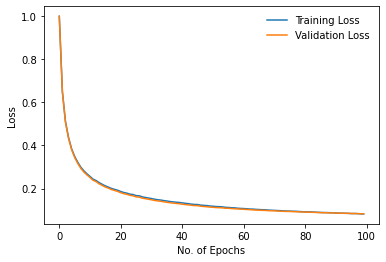

In [24]:
path_model_checkpoint = 'trained_models/MNIST/Mixt_models/stride'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

#### Test Mixt stride network:

In [25]:
# load model pre trained binary
binary = False
mixt = True    
maxpooling = False

model_mixt_stride, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling, mixt=mixt)

path_model = 'trained_models/MNIST/Mixt_models/stride'
if torch.cuda.is_available():
  model_mixt_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_mixt_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))

print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_mixt


In [26]:
evaluate(model_mixt_stride, test_loader)

Test Results - Avg accuracy: 97.46 Avg loss: 0.08


### With Maxpooling:

In [7]:
# parameters model to load no Binary model
binary = False
mixt = True
maxpooling = True

model, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling, mixt=mixt)
print(name_model)

MNIST_Stochastic_ST_maxpooling_mixt


ITERATION - loss: 0.49: 100%|█████████▉| 840/844 [00:11<00:00, 123.13it/s]

Training Results - Epoch: 1  Avg accuracy: 88.46 Avg loss: 0.55


ITERATION - loss: 0.49: 100%|█████████▉| 840/844 [00:11<00:00, 123.13it/s]

Validation Results - Epoch: 1  Avg accuracy: 88.87 Avg loss: 0.54


ITERATION - loss: 0.39: 100%|█████████▉| 840/844 [00:23<00:00, 123.53it/s]

Training Results - Epoch: 2  Avg accuracy: 91.70 Avg loss: 0.35


ITERATION - loss: 0.39:   2%|▏         | 20/844 [00:24<01:10, 11.73it/s]  

Validation Results - Epoch: 2  Avg accuracy: 92.23 Avg loss: 0.34


ITERATION - loss: 0.23: 850it [00:35, 126.11it/s]

Training Results - Epoch: 3  Avg accuracy: 93.09 Avg loss: 0.27


ITERATION - loss: 0.41:   2%|▏         | 20/844 [00:36<01:10, 11.65it/s]

Validation Results - Epoch: 3  Avg accuracy: 93.22 Avg loss: 0.27


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [00:47<00:00, 124.98it/s]

Training Results - Epoch: 4  Avg accuracy: 93.89 Avg loss: 0.24


ITERATION - loss: 0.20:   2%|▏         | 20/844 [00:47<01:08, 11.99it/s]  

Validation Results - Epoch: 4  Avg accuracy: 94.03 Avg loss: 0.23


ITERATION - loss: 0.12: 850it [00:59, 123.68it/s]

Training Results - Epoch: 5  Avg accuracy: 94.42 Avg loss: 0.21


ITERATION - loss: 0.26:   2%|▏         | 20/844 [00:59<01:10, 11.73it/s]

Validation Results - Epoch: 5  Avg accuracy: 94.25 Avg loss: 0.21


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [01:10<00:00, 126.08it/s]

Training Results - Epoch: 6  Avg accuracy: 94.91 Avg loss: 0.19


ITERATION - loss: 0.21:   2%|▏         | 20/844 [01:11<01:09, 11.89it/s]  

Validation Results - Epoch: 6  Avg accuracy: 94.80 Avg loss: 0.19


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [01:22<00:00, 123.91it/s]

Training Results - Epoch: 7  Avg accuracy: 95.24 Avg loss: 0.18


ITERATION - loss: 0.25:   2%|▏         | 20/844 [01:23<01:09, 11.80it/s]  

Validation Results - Epoch: 7  Avg accuracy: 95.13 Avg loss: 0.18


ITERATION - loss: 0.16: 850it [01:34, 126.33it/s]

Training Results - Epoch: 8  Avg accuracy: 95.49 Avg loss: 0.17


ITERATION - loss: 0.16:   2%|▏         | 20/844 [01:35<01:10, 11.72it/s]

Validation Results - Epoch: 8  Avg accuracy: 95.30 Avg loss: 0.17


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [01:46<00:00, 121.99it/s]

Training Results - Epoch: 9  Avg accuracy: 95.71 Avg loss: 0.16


ITERATION - loss: 0.20:   2%|▏         | 20/844 [01:47<01:09, 11.90it/s]  

Validation Results - Epoch: 9  Avg accuracy: 95.47 Avg loss: 0.16


ITERATION - loss: 0.11: 850it [01:58, 123.40it/s]

Training Results - Epoch: 10  Avg accuracy: 95.86 Avg loss: 0.15


ITERATION - loss: 0.14:   2%|▏         | 20/844 [01:59<01:12, 11.42it/s]

Validation Results - Epoch: 10  Avg accuracy: 95.67 Avg loss: 0.15


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [02:10<00:00, 123.73it/s]

Training Results - Epoch: 11  Avg accuracy: 96.03 Avg loss: 0.14


ITERATION - loss: 0.06:   2%|▏         | 20/844 [02:11<01:10, 11.73it/s]  

Validation Results - Epoch: 11  Avg accuracy: 95.88 Avg loss: 0.15


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [02:22<00:00, 125.05it/s]

Training Results - Epoch: 12  Avg accuracy: 96.13 Avg loss: 0.14


ITERATION - loss: 0.15:   2%|▏         | 20/844 [02:23<01:10, 11.68it/s]  

Validation Results - Epoch: 12  Avg accuracy: 95.98 Avg loss: 0.14


ITERATION - loss: 0.13: 850it [02:34, 121.06it/s]

Training Results - Epoch: 13  Avg accuracy: 96.29 Avg loss: 0.13


ITERATION - loss: 0.08:   2%|▏         | 20/844 [02:35<01:11, 11.53it/s]

Validation Results - Epoch: 13  Avg accuracy: 96.22 Avg loss: 0.14


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [02:46<00:00, 120.04it/s]

Training Results - Epoch: 14  Avg accuracy: 96.39 Avg loss: 0.13


ITERATION - loss: 0.06:   2%|▏         | 20/844 [02:47<01:10, 11.65it/s]  

Validation Results - Epoch: 14  Avg accuracy: 96.30 Avg loss: 0.13


ITERATION - loss: 0.11: 850it [02:59, 118.59it/s]

Training Results - Epoch: 15  Avg accuracy: 96.50 Avg loss: 0.12


ITERATION - loss: 0.17:   2%|▏         | 20/844 [02:59<01:13, 11.26it/s]

Validation Results - Epoch: 15  Avg accuracy: 96.45 Avg loss: 0.13


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [03:11<00:00, 121.09it/s]

Training Results - Epoch: 16  Avg accuracy: 96.59 Avg loss: 0.12


ITERATION - loss: 0.27:   2%|▏         | 20/844 [03:12<01:10, 11.66it/s]  

Validation Results - Epoch: 16  Avg accuracy: 96.58 Avg loss: 0.12


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [03:23<00:00, 124.38it/s]

Training Results - Epoch: 17  Avg accuracy: 96.68 Avg loss: 0.12


ITERATION - loss: 0.20:   2%|▏         | 20/844 [03:24<01:11, 11.50it/s]  

Validation Results - Epoch: 17  Avg accuracy: 96.58 Avg loss: 0.12


ITERATION - loss: 0.14: 850it [03:35, 119.65it/s]

Training Results - Epoch: 18  Avg accuracy: 96.79 Avg loss: 0.11


ITERATION - loss: 0.09:   2%|▏         | 20/844 [03:36<01:12, 11.29it/s]

Validation Results - Epoch: 18  Avg accuracy: 96.78 Avg loss: 0.12


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [03:48<00:00, 117.91it/s]

Training Results - Epoch: 19  Avg accuracy: 96.88 Avg loss: 0.11


ITERATION - loss: 0.08:   2%|▏         | 20/844 [03:48<01:12, 11.41it/s]  

Validation Results - Epoch: 19  Avg accuracy: 96.75 Avg loss: 0.11


ITERATION - loss: 0.05: 850it [04:00, 122.72it/s]

Training Results - Epoch: 20  Avg accuracy: 96.97 Avg loss: 0.11


ITERATION - loss: 0.05:   2%|▏         | 20/844 [04:01<01:11, 11.50it/s]

Validation Results - Epoch: 20  Avg accuracy: 96.75 Avg loss: 0.11


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [04:12<00:00, 121.05it/s]

Training Results - Epoch: 21  Avg accuracy: 97.01 Avg loss: 0.10


ITERATION - loss: 0.03:   2%|▏         | 20/844 [04:13<01:10, 11.63it/s]  

Validation Results - Epoch: 21  Avg accuracy: 96.83 Avg loss: 0.11


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [04:24<00:00, 121.58it/s]

Training Results - Epoch: 22  Avg accuracy: 97.08 Avg loss: 0.10


ITERATION - loss: 0.08:   2%|▏         | 20/844 [04:25<01:11, 11.46it/s]  

Validation Results - Epoch: 22  Avg accuracy: 96.88 Avg loss: 0.11


ITERATION - loss: 0.29: 850it [04:37, 123.89it/s]

Training Results - Epoch: 23  Avg accuracy: 97.15 Avg loss: 0.10


ITERATION - loss: 0.11:   2%|▏         | 20/844 [04:37<01:11, 11.46it/s]

Validation Results - Epoch: 23  Avg accuracy: 97.02 Avg loss: 0.11


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [04:49<00:00, 120.69it/s]

Training Results - Epoch: 24  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.06:   2%|▏         | 20/844 [04:49<01:10, 11.63it/s]  

Validation Results - Epoch: 24  Avg accuracy: 97.02 Avg loss: 0.10


ITERATION - loss: 0.07: 850it [05:01, 123.84it/s]

Training Results - Epoch: 25  Avg accuracy: 97.26 Avg loss: 0.10


ITERATION - loss: 0.07:   2%|▏         | 20/844 [05:01<01:11, 11.56it/s]

Validation Results - Epoch: 25  Avg accuracy: 97.12 Avg loss: 0.10


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [05:13<00:00, 121.24it/s]

Training Results - Epoch: 26  Avg accuracy: 97.32 Avg loss: 0.09


ITERATION - loss: 0.09:   2%|▏         | 20/844 [05:14<01:11, 11.55it/s]  

Validation Results - Epoch: 26  Avg accuracy: 97.07 Avg loss: 0.10


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [05:25<00:00, 119.38it/s]

Training Results - Epoch: 27  Avg accuracy: 97.36 Avg loss: 0.09


ITERATION - loss: 0.01:   2%|▏         | 20/844 [05:26<01:11, 11.54it/s]  

Validation Results - Epoch: 27  Avg accuracy: 97.15 Avg loss: 0.10


ITERATION - loss: 0.03: 850it [05:37, 122.66it/s]

Training Results - Epoch: 28  Avg accuracy: 97.40 Avg loss: 0.09


ITERATION - loss: 0.16:   2%|▏         | 20/844 [05:38<01:13, 11.23it/s]

Validation Results - Epoch: 28  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [05:50<00:00, 119.09it/s]

Training Results - Epoch: 29  Avg accuracy: 97.46 Avg loss: 0.09


ITERATION - loss: 0.14:   2%|▏         | 20/844 [05:50<01:11, 11.57it/s]  

Validation Results - Epoch: 29  Avg accuracy: 97.23 Avg loss: 0.10


ITERATION - loss: 0.06: 850it [06:02, 122.37it/s]

Training Results - Epoch: 30  Avg accuracy: 97.50 Avg loss: 0.09


ITERATION - loss: 0.02:   2%|▏         | 20/844 [06:03<01:12, 11.41it/s]

Validation Results - Epoch: 30  Avg accuracy: 97.33 Avg loss: 0.09


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [06:14<00:00, 121.06it/s]

Training Results - Epoch: 31  Avg accuracy: 97.54 Avg loss: 0.09


ITERATION - loss: 0.11:   2%|▏         | 20/844 [06:15<01:11, 11.55it/s]  

Validation Results - Epoch: 31  Avg accuracy: 97.28 Avg loss: 0.09


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [06:26<00:00, 120.51it/s]

Training Results - Epoch: 32  Avg accuracy: 97.57 Avg loss: 0.09


ITERATION - loss: 0.11:   2%|▏         | 20/844 [06:27<01:11, 11.57it/s]  

Validation Results - Epoch: 32  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.11: 850it [06:38, 125.32it/s]

Training Results - Epoch: 33  Avg accuracy: 97.65 Avg loss: 0.08


ITERATION - loss: 0.11:   2%|▏         | 20/844 [06:39<01:11, 11.46it/s]

Validation Results - Epoch: 33  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [06:50<00:00, 122.26it/s]

Training Results - Epoch: 34  Avg accuracy: 97.67 Avg loss: 0.08


ITERATION - loss: 0.07:   2%|▏         | 20/844 [06:51<01:10, 11.72it/s]  

Validation Results - Epoch: 34  Avg accuracy: 97.47 Avg loss: 0.09


ITERATION - loss: 0.09: 850it [07:03, 122.03it/s]

Training Results - Epoch: 35  Avg accuracy: 97.70 Avg loss: 0.08


ITERATION - loss: 0.08:   2%|▏         | 20/844 [07:03<01:11, 11.48it/s]

Validation Results - Epoch: 35  Avg accuracy: 97.47 Avg loss: 0.09


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [07:15<00:00, 124.79it/s]

Training Results - Epoch: 36  Avg accuracy: 97.74 Avg loss: 0.08


ITERATION - loss: 0.03:   2%|▏         | 20/844 [07:15<01:10, 11.74it/s]  

Validation Results - Epoch: 36  Avg accuracy: 97.48 Avg loss: 0.09


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [07:26<00:00, 124.97it/s]

Training Results - Epoch: 37  Avg accuracy: 97.75 Avg loss: 0.08


ITERATION - loss: 0.10:   2%|▏         | 20/844 [07:27<01:09, 11.93it/s]  

Validation Results - Epoch: 37  Avg accuracy: 97.47 Avg loss: 0.09


ITERATION - loss: 0.02: 850it [07:38, 126.10it/s]

Training Results - Epoch: 38  Avg accuracy: 97.82 Avg loss: 0.08


ITERATION - loss: 0.05:   2%|▏         | 20/844 [07:39<01:10, 11.68it/s]

Validation Results - Epoch: 38  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [07:50<00:00, 121.77it/s]

Training Results - Epoch: 39  Avg accuracy: 97.79 Avg loss: 0.08


ITERATION - loss: 0.08:   2%|▏         | 20/844 [07:51<01:09, 11.83it/s]  

Validation Results - Epoch: 39  Avg accuracy: 97.57 Avg loss: 0.09


ITERATION - loss: 0.05: 850it [08:02, 123.03it/s]

Training Results - Epoch: 40  Avg accuracy: 97.86 Avg loss: 0.08


ITERATION - loss: 0.05:   2%|▏         | 20/844 [08:03<01:10, 11.77it/s]

Validation Results - Epoch: 40  Avg accuracy: 97.53 Avg loss: 0.08


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [08:14<00:00, 123.92it/s]

Training Results - Epoch: 41  Avg accuracy: 97.87 Avg loss: 0.08


ITERATION - loss: 0.02:   2%|▏         | 20/844 [08:15<01:08, 12.01it/s]  

Validation Results - Epoch: 41  Avg accuracy: 97.62 Avg loss: 0.08


ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [08:26<00:00, 124.37it/s]

Training Results - Epoch: 42  Avg accuracy: 97.91 Avg loss: 0.08


ITERATION - loss: 0.09:   2%|▏         | 20/844 [08:27<01:09, 11.88it/s]  

Validation Results - Epoch: 42  Avg accuracy: 97.68 Avg loss: 0.08


ITERATION - loss: 0.07: 850it [08:38, 127.61it/s]

Training Results - Epoch: 43  Avg accuracy: 97.92 Avg loss: 0.07


ITERATION - loss: 0.04:   2%|▏         | 20/844 [08:38<01:10, 11.74it/s]

Validation Results - Epoch: 43  Avg accuracy: 97.67 Avg loss: 0.08


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [08:49<00:00, 127.35it/s]

Training Results - Epoch: 44  Avg accuracy: 97.93 Avg loss: 0.07


ITERATION - loss: 0.04:   2%|▏         | 20/844 [08:50<01:09, 11.89it/s]  

Validation Results - Epoch: 44  Avg accuracy: 97.70 Avg loss: 0.08


ITERATION - loss: 0.04: 850it [09:02, 121.64it/s]

Training Results - Epoch: 45  Avg accuracy: 97.99 Avg loss: 0.07


ITERATION - loss: 0.12:   2%|▏         | 20/844 [09:02<01:11, 11.56it/s]

Validation Results - Epoch: 45  Avg accuracy: 97.70 Avg loss: 0.08


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [09:13<00:00, 125.52it/s]

Training Results - Epoch: 46  Avg accuracy: 97.98 Avg loss: 0.07


ITERATION - loss: 0.03:   2%|▏         | 20/844 [09:14<01:08, 12.04it/s]  

Validation Results - Epoch: 46  Avg accuracy: 97.68 Avg loss: 0.08


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [09:25<00:00, 123.28it/s]

Training Results - Epoch: 47  Avg accuracy: 98.00 Avg loss: 0.07


ITERATION - loss: 0.15:   2%|▏         | 20/844 [09:26<01:08, 12.00it/s]  

Validation Results - Epoch: 47  Avg accuracy: 97.68 Avg loss: 0.08


ITERATION - loss: 0.07: 850it [09:37, 127.68it/s]

Training Results - Epoch: 48  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.07:   2%|▏         | 20/844 [09:37<01:10, 11.74it/s]

Validation Results - Epoch: 48  Avg accuracy: 97.73 Avg loss: 0.08


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [09:49<00:00, 123.87it/s]

Training Results - Epoch: 49  Avg accuracy: 98.02 Avg loss: 0.07


ITERATION - loss: 0.04:   2%|▏         | 20/844 [09:49<01:08, 11.97it/s]  

Validation Results - Epoch: 49  Avg accuracy: 97.73 Avg loss: 0.08


ITERATION - loss: 0.04: 850it [10:00, 127.70it/s]

Training Results - Epoch: 50  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.04:   2%|▏         | 20/844 [10:01<01:09, 11.84it/s]

Validation Results - Epoch: 50  Avg accuracy: 97.77 Avg loss: 0.08


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [10:12<00:00, 126.19it/s]

Training Results - Epoch: 51  Avg accuracy: 98.03 Avg loss: 0.07


ITERATION - loss: 0.04:   2%|▏         | 20/844 [10:13<01:08, 12.01it/s]  

Validation Results - Epoch: 51  Avg accuracy: 97.75 Avg loss: 0.08


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [10:24<00:00, 128.47it/s]

Training Results - Epoch: 52  Avg accuracy: 98.07 Avg loss: 0.07


ITERATION - loss: 0.05:   2%|▏         | 20/844 [10:25<01:08, 11.98it/s]  

Validation Results - Epoch: 52  Avg accuracy: 97.75 Avg loss: 0.08


ITERATION - loss: 0.04: 850it [10:36, 126.64it/s]

Training Results - Epoch: 53  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.07:   2%|▏         | 20/844 [10:36<01:08, 11.94it/s]

Validation Results - Epoch: 53  Avg accuracy: 97.83 Avg loss: 0.08


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [10:47<00:00, 124.04it/s]

Training Results - Epoch: 54  Avg accuracy: 98.06 Avg loss: 0.07


ITERATION - loss: 0.07:   2%|▏         | 20/844 [10:48<01:09, 11.92it/s]  

Validation Results - Epoch: 54  Avg accuracy: 97.82 Avg loss: 0.08


ITERATION - loss: 0.05: 850it [10:59, 124.41it/s]

Training Results - Epoch: 55  Avg accuracy: 98.09 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [11:00<01:10, 11.68it/s]

Validation Results - Epoch: 55  Avg accuracy: 97.75 Avg loss: 0.08


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [11:11<00:00, 125.00it/s]

Training Results - Epoch: 56  Avg accuracy: 98.11 Avg loss: 0.07


ITERATION - loss: 0.06:   2%|▏         | 20/844 [11:12<01:09, 11.93it/s]  

Validation Results - Epoch: 56  Avg accuracy: 97.87 Avg loss: 0.07


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [11:23<00:00, 124.46it/s]

Training Results - Epoch: 57  Avg accuracy: 98.14 Avg loss: 0.07


ITERATION - loss: 0.05:   2%|▏         | 20/844 [11:23<01:09, 11.84it/s]  

Validation Results - Epoch: 57  Avg accuracy: 97.82 Avg loss: 0.07


ITERATION - loss: 0.06: 850it [11:35, 127.16it/s]

Training Results - Epoch: 58  Avg accuracy: 98.12 Avg loss: 0.07


ITERATION - loss: 0.11:   2%|▏         | 20/844 [11:35<01:09, 11.87it/s]

Validation Results - Epoch: 58  Avg accuracy: 97.87 Avg loss: 0.07


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [11:46<00:00, 126.34it/s]

Training Results - Epoch: 59  Avg accuracy: 98.14 Avg loss: 0.06


ITERATION - loss: 0.02:   2%|▏         | 20/844 [11:47<01:08, 11.96it/s]  

Validation Results - Epoch: 59  Avg accuracy: 97.82 Avg loss: 0.07


ITERATION - loss: 0.05: 850it [11:58, 123.33it/s]

Training Results - Epoch: 60  Avg accuracy: 98.19 Avg loss: 0.06


ITERATION - loss: 0.03:   2%|▏         | 20/844 [11:59<01:11, 11.48it/s]

Validation Results - Epoch: 60  Avg accuracy: 97.95 Avg loss: 0.07


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [12:10<00:00, 123.33it/s]

Training Results - Epoch: 61  Avg accuracy: 98.17 Avg loss: 0.06


ITERATION - loss: 0.09:   2%|▏         | 20/844 [12:11<01:08, 11.95it/s]  

Validation Results - Epoch: 61  Avg accuracy: 97.92 Avg loss: 0.07


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [12:22<00:00, 124.13it/s]

Training Results - Epoch: 62  Avg accuracy: 98.21 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [12:23<01:09, 11.80it/s]  

Validation Results - Epoch: 62  Avg accuracy: 97.93 Avg loss: 0.07


ITERATION - loss: 0.11: 850it [12:34, 122.05it/s]

Training Results - Epoch: 63  Avg accuracy: 98.21 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [12:35<01:09, 11.80it/s]

Validation Results - Epoch: 63  Avg accuracy: 97.92 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [12:46<00:00, 126.02it/s]

Training Results - Epoch: 64  Avg accuracy: 98.24 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [12:46<01:08, 12.05it/s]  

Validation Results - Epoch: 64  Avg accuracy: 97.93 Avg loss: 0.07


ITERATION - loss: 0.03: 850it [12:57, 124.10it/s]

Training Results - Epoch: 65  Avg accuracy: 98.24 Avg loss: 0.06


ITERATION - loss: 0.06:   2%|▏         | 20/844 [12:58<01:09, 11.78it/s]

Validation Results - Epoch: 65  Avg accuracy: 97.95 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [13:09<00:00, 125.68it/s]

Training Results - Epoch: 66  Avg accuracy: 98.25 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [13:10<01:08, 12.01it/s]  

Validation Results - Epoch: 66  Avg accuracy: 98.00 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [13:21<00:00, 128.02it/s]

Training Results - Epoch: 67  Avg accuracy: 98.26 Avg loss: 0.06


ITERATION - loss: 0.06:   2%|▏         | 20/844 [13:21<01:07, 12.13it/s]  

Validation Results - Epoch: 67  Avg accuracy: 98.00 Avg loss: 0.07


ITERATION - loss: 0.04: 850it [13:32, 121.44it/s]

Training Results - Epoch: 68  Avg accuracy: 98.27 Avg loss: 0.06


ITERATION - loss: 0.09:   2%|▏         | 20/844 [13:33<01:09, 11.89it/s]

Validation Results - Epoch: 68  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [13:44<00:00, 125.97it/s]

Training Results - Epoch: 69  Avg accuracy: 98.29 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [13:45<01:09, 11.91it/s]  

Validation Results - Epoch: 69  Avg accuracy: 98.02 Avg loss: 0.07


ITERATION - loss: 0.07: 850it [13:56, 128.55it/s]

Training Results - Epoch: 70  Avg accuracy: 98.30 Avg loss: 0.06


ITERATION - loss: 0.04:   2%|▏         | 20/844 [13:56<01:09, 11.93it/s]

Validation Results - Epoch: 70  Avg accuracy: 97.98 Avg loss: 0.07


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [14:08<00:00, 121.66it/s]

Training Results - Epoch: 71  Avg accuracy: 98.30 Avg loss: 0.06


ITERATION - loss: 0.02:   2%|▏         | 20/844 [14:08<01:09, 11.83it/s]  

Validation Results - Epoch: 71  Avg accuracy: 98.00 Avg loss: 0.07


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [14:19<00:00, 126.61it/s]

Training Results - Epoch: 72  Avg accuracy: 98.31 Avg loss: 0.06


ITERATION - loss: 0.09:   2%|▏         | 20/844 [14:20<01:08, 12.06it/s]  

Validation Results - Epoch: 72  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.15: 850it [14:31, 126.92it/s]

Training Results - Epoch: 73  Avg accuracy: 98.34 Avg loss: 0.06


ITERATION - loss: 0.15: 850it [14:32, 126.92it/s]

Validation Results - Epoch: 73  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [14:43<00:00, 127.72it/s]

Training Results - Epoch: 74  Avg accuracy: 98.31 Avg loss: 0.06


ITERATION - loss: 0.01:   2%|▏         | 20/844 [14:43<01:08, 12.10it/s]  

Validation Results - Epoch: 74  Avg accuracy: 98.02 Avg loss: 0.07


ITERATION - loss: 0.01: 850it [14:54, 127.61it/s]

Training Results - Epoch: 75  Avg accuracy: 98.33 Avg loss: 0.06


ITERATION - loss: 0.03:   2%|▏         | 20/844 [14:55<01:09, 11.90it/s]

Validation Results - Epoch: 75  Avg accuracy: 98.10 Avg loss: 0.07


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [15:06<00:00, 121.96it/s]

Training Results - Epoch: 76  Avg accuracy: 98.35 Avg loss: 0.06


ITERATION - loss: 0.16:   2%|▏         | 20/844 [15:07<01:09, 11.93it/s]  

Validation Results - Epoch: 76  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [15:18<00:00, 126.93it/s]

Training Results - Epoch: 77  Avg accuracy: 98.36 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [15:19<01:08, 12.07it/s]  

Validation Results - Epoch: 77  Avg accuracy: 98.10 Avg loss: 0.07


ITERATION - loss: 0.03: 850it [15:30, 124.87it/s]

Training Results - Epoch: 78  Avg accuracy: 98.36 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [15:30<01:09, 11.89it/s]

Validation Results - Epoch: 78  Avg accuracy: 98.07 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [15:41<00:00, 124.60it/s]

Training Results - Epoch: 79  Avg accuracy: 98.38 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [15:42<01:08, 11.97it/s]  

Validation Results - Epoch: 79  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.06: 850it [15:53, 126.35it/s]

Training Results - Epoch: 80  Avg accuracy: 98.39 Avg loss: 0.06


ITERATION - loss: 0.06:   2%|▏         | 20/844 [15:54<01:09, 11.88it/s]

Validation Results - Epoch: 80  Avg accuracy: 98.00 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [16:05<00:00, 127.93it/s]

Training Results - Epoch: 81  Avg accuracy: 98.39 Avg loss: 0.06


ITERATION - loss: 0.05:   2%|▏         | 20/844 [16:05<01:08, 12.08it/s]  

Validation Results - Epoch: 81  Avg accuracy: 98.02 Avg loss: 0.07


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [16:16<00:00, 127.63it/s]

Training Results - Epoch: 82  Avg accuracy: 98.41 Avg loss: 0.05


ITERATION - loss: 0.06:   2%|▏         | 20/844 [16:17<01:08, 12.03it/s]  

Validation Results - Epoch: 82  Avg accuracy: 98.02 Avg loss: 0.07


ITERATION - loss: 0.06: 850it [16:28, 127.04it/s]

Training Results - Epoch: 83  Avg accuracy: 98.42 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [16:29<01:10, 11.69it/s]

Validation Results - Epoch: 83  Avg accuracy: 98.07 Avg loss: 0.07


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [16:40<00:00, 126.51it/s]

Training Results - Epoch: 84  Avg accuracy: 98.44 Avg loss: 0.05


ITERATION - loss: 0.05:   2%|▏         | 20/844 [16:40<01:08, 12.07it/s]  

Validation Results - Epoch: 84  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.06: 850it [16:51, 128.24it/s]

Training Results - Epoch: 85  Avg accuracy: 98.42 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [16:52<01:09, 11.93it/s]

Validation Results - Epoch: 85  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [17:03<00:00, 126.30it/s]

Training Results - Epoch: 86  Avg accuracy: 98.45 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [17:04<01:08, 12.04it/s]  

Validation Results - Epoch: 86  Avg accuracy: 98.00 Avg loss: 0.06


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [17:15<00:00, 126.32it/s]

Training Results - Epoch: 87  Avg accuracy: 98.46 Avg loss: 0.05


ITERATION - loss: 0.01:   2%|▏         | 20/844 [17:15<01:08, 12.02it/s]  

Validation Results - Epoch: 87  Avg accuracy: 98.05 Avg loss: 0.06


ITERATION - loss: 0.07: 850it [17:26, 124.65it/s]

Training Results - Epoch: 88  Avg accuracy: 98.47 Avg loss: 0.05


ITERATION - loss: 0.05:   2%|▏         | 20/844 [17:27<01:09, 11.93it/s]

Validation Results - Epoch: 88  Avg accuracy: 98.12 Avg loss: 0.06


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [17:38<00:00, 126.79it/s]

Training Results - Epoch: 89  Avg accuracy: 98.48 Avg loss: 0.05


ITERATION - loss: 0.08:   2%|▏         | 20/844 [17:39<01:07, 12.15it/s]  

Validation Results - Epoch: 89  Avg accuracy: 98.08 Avg loss: 0.06


ITERATION - loss: 0.09: 850it [17:50, 127.56it/s]

Training Results - Epoch: 90  Avg accuracy: 98.47 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [17:50<01:09, 11.79it/s]

Validation Results - Epoch: 90  Avg accuracy: 98.03 Avg loss: 0.06


ITERATION - loss: 0.02: 100%|█████████▉| 840/844 [18:01<00:00, 127.77it/s]

Training Results - Epoch: 91  Avg accuracy: 98.48 Avg loss: 0.05


ITERATION - loss: 0.09:   2%|▏         | 20/844 [18:02<01:08, 12.06it/s]  

Validation Results - Epoch: 91  Avg accuracy: 98.15 Avg loss: 0.06


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [18:13<00:00, 127.03it/s]

Training Results - Epoch: 92  Avg accuracy: 98.53 Avg loss: 0.05


ITERATION - loss: 0.09:   2%|▏         | 20/844 [18:14<01:08, 12.11it/s]  

Validation Results - Epoch: 92  Avg accuracy: 98.12 Avg loss: 0.06


ITERATION - loss: 0.02: 850it [18:25, 128.55it/s]

Training Results - Epoch: 93  Avg accuracy: 98.52 Avg loss: 0.05


ITERATION - loss: 0.06:   2%|▏         | 20/844 [18:25<01:09, 11.86it/s]

Validation Results - Epoch: 93  Avg accuracy: 98.17 Avg loss: 0.06


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [18:36<00:00, 127.37it/s]

Training Results - Epoch: 94  Avg accuracy: 98.53 Avg loss: 0.05


ITERATION - loss: 0.07:   2%|▏         | 20/844 [18:37<01:07, 12.13it/s]  

Validation Results - Epoch: 94  Avg accuracy: 98.15 Avg loss: 0.06


ITERATION - loss: 0.04: 850it [18:48, 127.15it/s]

Training Results - Epoch: 95  Avg accuracy: 98.50 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [18:49<01:09, 11.92it/s]

Validation Results - Epoch: 95  Avg accuracy: 98.13 Avg loss: 0.06


ITERATION - loss: 0.01: 100%|█████████▉| 840/844 [19:00<00:00, 128.48it/s]

Training Results - Epoch: 96  Avg accuracy: 98.52 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [19:00<01:09, 11.91it/s]  

Validation Results - Epoch: 96  Avg accuracy: 98.13 Avg loss: 0.06


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [19:11<00:00, 126.74it/s]

Training Results - Epoch: 97  Avg accuracy: 98.55 Avg loss: 0.05


ITERATION - loss: 0.04:   2%|▏         | 20/844 [19:12<01:09, 11.90it/s]  

Validation Results - Epoch: 97  Avg accuracy: 98.25 Avg loss: 0.06


ITERATION - loss: 0.08: 850it [19:23, 122.52it/s]

Training Results - Epoch: 98  Avg accuracy: 98.55 Avg loss: 0.05


ITERATION - loss: 0.12:   2%|▏         | 20/844 [19:24<01:10, 11.74it/s]

Validation Results - Epoch: 98  Avg accuracy: 98.13 Avg loss: 0.06


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [19:35<00:00, 123.88it/s]

Training Results - Epoch: 99  Avg accuracy: 98.58 Avg loss: 0.05


ITERATION - loss: 0.02:   2%|▏         | 20/844 [19:36<01:08, 12.03it/s]  

Validation Results - Epoch: 99  Avg accuracy: 98.22 Avg loss: 0.06


ITERATION - loss: 0.07: 850it [19:47, 128.09it/s]

Training Results - Epoch: 100  Avg accuracy: 98.58 Avg loss: 0.05


ITERATION - loss: 0.07: 850it [19:47, 128.09it/s]

Validation Results - Epoch: 100  Avg accuracy: 98.23 Avg loss: 0.06


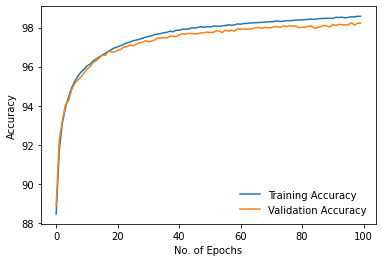

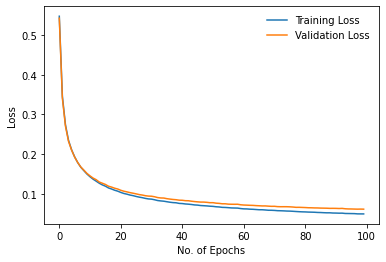

In [8]:
path_model_checkpoint = 'trained_models/MNIST/Mixt_models/maxpooling'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

#### Test Mixt maxpooling network:

In [9]:
# load model pre trained binary
binary = False
mixt = True    
maxpooling = True

model_mixt_maxpooling, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling, mixt=mixt)

path_model = 'trained_models/MNIST/Mixt_models/maxpooling'
if torch.cuda.is_available():
  model_mixt_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_mixt_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))

print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_maxpooling_mixt


In [10]:
evaluate(model_mixt_maxpooling, test_loader)

Test Results - Avg accuracy: 98.45 Avg loss: 0.05


# Training wihtout bias:

## Training parameters:

In [0]:
epochs = 50
lr = 1e-3
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [0]:
# parameters model to load no Binary model
binary = False
bias = False

model, name_model = get_my_model_MNIST(binary, bias=bias)
print(name_model)

In [0]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/without_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained no binary
binary = False
bias=False
model_no_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/No_binary_models/without_bias'
if torch.cuda.is_available():
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

In [0]:
evaluate(model_no_binary_wt_bias, test_loader)

## Run Binary Netwwork:

In [0]:
# parameters model to load no Binary model
binary = True
bias=False

model, name_model = get_my_model_MNIST(binary, bias=bias)
print(name_model)

In [0]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/without_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test Binary network:

In [0]:
# load model pre trained binary
binary = True    
bias=False
model_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/Binary_models/without_bias'
if torch.cuda.is_available():
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

In [0]:
evaluate(model_binary_wt_bias, test_loader)

## Recap Scores:

In [0]:
print('score for no binary model with stride: {}'.format(evaluate(model_no_binary_stride, test_loader)))
print('score for no binary model with maxpooling: {}'.format(evaluate(model_no_binary_maxpooling, test_loader)))
print('score for binary model with stride: {}'.format(evaluate(model_binary_stride, test_loader)))
print('score for binary model with maxpooling: {}'.format(evaluate(model_binary_maxpooling, test_loader)))
print('score for mixt model with stride: {}'.format(evaluate(model_mixt_stride, test_loader)))
print('score for mixt model with maxpooling: {}'.format(evaluate(model_mixt_maxpooling, test_loader)))

# Compute Regions:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap, test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms, GradientAscent, get_filter_layer2, get_labels_histogram
from visualize.viz import get_region_layer1, get_region_layer2, get_regions_interest, get_all_regions_max
from visualize.viz import compare_two_histograms,viz_regions

# for regions extraction
import collections
from functools import partial
import cv2

## Load models:

In [13]:
# load model pre trained no binary
binary = False
maxpooling = False

model_no_binary_stride, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)

path_model = 'trained_models/MNIST/No_binary_models/with_bias/stride'
if torch.cuda.is_available():
  model_no_binary_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [14]:
# load model pre trained no binary
binary = False
maxpooling = True

model_no_binary_maxpooling, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)

path_model = 'trained_models/MNIST/No_binary_models/with_bias/maxpooling'
if torch.cuda.is_available():
  model_no_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet_maxpooling


In [15]:
# load model pre trained binary
binary = True    
maxpooling = False

model_binary_stride, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)

path_model = 'trained_models/MNIST/Binary_models/with_bias/stride'
if torch.cuda.is_available():
  model_no_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary


In [16]:
# load model pre trained binary
binary = True    
maxpooling = True

model_binary_maxpooling, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling)

path_model = 'trained_models/MNIST/Binary_models/with_bias/maxpooling'
if torch.cuda.is_available():
  model_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary_maxpooling


In [17]:
# load model pre trained binary
binary = False
mixt = True    
maxpooling = False

model_mixt_stride, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling, mixt=mixt)

path_model = 'trained_models/MNIST/Mixt_models/stride'
if torch.cuda.is_available():
  model_mixt_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_mixt_stride.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))

print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_mixt


In [18]:
# load model pre trained binary
binary = False
mixt = True    
maxpooling = True

model_mixt_maxpooling, name_model = get_my_model_MNIST(binary, maxpooling=maxpooling, mixt=mixt)

path_model = 'trained_models/MNIST/Mixt_models/maxpooling'
if torch.cuda.is_available():
  model_mixt_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_mixt_maxpooling.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))

print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_maxpooling_mixt


## Run:

In [19]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)

torch.Size([10000, 1, 28, 28])


In [0]:
np.save('results/MNIST_results/MNIST_regions/labels.npy', labels)

In [0]:
# Parameters:

padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

### No binary model:

#### With Stride:

In [0]:
# a dictionary that keeps saving the activations as they come
activations_no_binary_stride = collections.defaultdict(list)

def save_activation_no_binary_stride(name, mod, inp, out):
    activations_no_binary_stride[name].append(out.cpu())

In [23]:
# Registering hooks for all the Conv2d layers
# Note: Hooks are called EVERY TIME the module performs a forward pass. For modules that are
# called repeatedly at different stages of the forward pass (like RELUs), this will save different
# activations. Editing the forward pass code to save activations is the way to go for these cases.
for name, m in model_no_binary_stride.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary_stride, name))

out = model_no_binary_stride(images)

# concatenate all the outputs we saved to get the the activations for each layer for the whole dataset
activations_no_binary_stride = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary_stride.items()}

# just print out the sizes of the saved activations as a sanity check
for k,v in activations_no_binary_stride.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [25]:
stride = 2

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, activations_no_binary_stride, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_no_binary_stride = region_final['layer1']
region_layer2_no_binary_stride = region_final['layer2']
activation_layer1_no_binary_stride = activation_final['layer1']
activation_layer2_no_binary_stride = activation_final['layer2']
activation_layer1_no_binary_normalized_stride = activation_final_normalized['layer1']
activation_layer2_no_binary_normalized_stride = activation_final_normalized['layer2']

print(region_layer1_no_binary_stride.shape)
print(region_layer2_no_binary_stride.shape)
print(activation_layer1_no_binary_stride.shape)
print(activation_layer2_no_binary_stride.shape)
print(activation_layer1_no_binary_normalized_stride.shape)
print(activation_layer2_no_binary_normalized_stride.shape)

Streaming output truncated to the last 5000 lines.
norm null for filter: 5, image: 7973 with activation:0.25900009274482727, index(0,0)
treating image n 7974/10000, for layer: layer1
treating image n 7975/10000, for layer: layer1
(2, 2)
norm null for filter: 5, image: 7975 with activation:0.25900009274482727, index(0,0)
treating image n 7976/10000, for layer: layer1
(2, 2)
norm null for filter: 5, image: 7976 with activation:0.25900009274482727, index(0,0)
treating image n 7977/10000, for layer: layer1
treating image n 7978/10000, for layer: layer1
(2, 2)
norm null for filter: 5, image: 7978 with activation:0.25900009274482727, index(0,0)
treating image n 7979/10000, for layer: layer1
(2, 2)
norm null for filter: 5, image: 7979 with activation:0.25900009274482727, index(0,0)
treating image n 7980/10000, for layer: layer1
treating image n 7981/10000, for layer: layer1
treating image n 7982/10000, for layer: layer1
treating image n 7983/10000, for layer: layer1
(2, 2)
norm null for filte

KeyboardInterrupt: ignored

In [0]:
np.save('results/MNIST_results/MNIST_regions/No_binary_model/stride/regions_max_layer1.npy', region_layer1_no_binary_stride)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/stride/regions_max_layer2.npy', region_layer2_no_binary_stride)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/stride/activations_max_layer1.npy', activation_layer1_no_binary_stride)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/stride/activations_max_layer2.npy', activation_layer2_no_binary_stride)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/stride/activations_max_layer1_normalized.npy', activation_layer1_no_binary_normalized_stride)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/stride/activations_max_layer2_normalized.npy', activation_layer2_no_binary_normalized_stride)

#### With Maxpooling:

In [0]:
activations_no_binary_maxpooling = collections.defaultdict(list)

def save_activation_no_binary_maxpooling(name, mod, inp, out):
    activations_no_binary_maxpooling[name].append(out.cpu())

In [27]:
for name, m in model_no_binary_maxpooling.named_modules():
    if type(m)==nn.Conv2d:
      m.register_forward_hook(partial(save_activation_no_binary_maxpooling, name))

out = model_no_binary_maxpooling(images)

activations_no_binary_maxpooling = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary_maxpooling.items()}

for k,v in activations_no_binary_maxpooling.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 28, 28])
layer2 torch.Size([10000, 20, 14, 14])


In [28]:
stride = 1

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, activations_no_binary_maxpooling, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_no_binary_maxpooling = region_final['layer1']
region_layer2_no_binary_maxpooling = region_final['layer2']
activation_layer1_no_binary_maxpooling = activation_final['layer1']
activation_layer2_no_binary_maxpooling = activation_final['layer2']
activation_layer1_no_binary_normalized_maxpooling = activation_final_normalized['layer1']
activation_layer2_no_binary_normalized_maxpooling = activation_final_normalized['layer2']

print(region_layer1_no_binary_maxpooling.shape)
print(region_layer2_no_binary_maxpooling.shape)
print(activation_layer1_no_binary_maxpooling.shape)
print(activation_layer2_no_binary_maxpooling.shape)
print(activation_layer1_no_binary_normalized_maxpooling.shape)
print(activation_layer2_no_binary_normalized_maxpooling.shape)

Streaming output truncated to the last 5000 lines.
norm null for filter: 16, image: 9698 with activation:3.949300765991211, index(7,6)
norm null for filter: 17, image: 9698 with activation:3.4867820739746094, index(6,5)
norm null for filter: 18, image: 9698 with activation:4.222522735595703, index(2,8)
norm null for filter: 19, image: 9698 with activation:2.933168888092041, index(9,4)
treating image n 9699/10000, for layer: layer2
norm null for filter: 0, image: 9699 with activation:1.1972854137420654, index(5,10)
norm null for filter: 2, image: 9699 with activation:2.9342293739318848, index(6,4)
norm null for filter: 3, image: 9699 with activation:3.999950885772705, index(7,9)
norm null for filter: 4, image: 9699 with activation:4.970045566558838, index(11,5)
norm null for filter: 5, image: 9699 with activation:4.395566463470459, index(3,8)
norm null for filter: 6, image: 9699 with activation:1.557244896888733, index(4,4)
norm null for filter: 7, image: 9699 with activation:2.80910301

In [0]:
np.save('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/regions_max_layer1.npy', region_layer1_no_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/regions_max_layer2.npy', region_layer2_no_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/activations_max_layer1.npy', activation_layer1_no_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/activations_max_layer2.npy', activation_layer2_no_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/activations_max_layer1_normalized.npy', activation_layer1_no_binary_normalized_maxpooling)
np.save('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/activations_max_layer2_normalized.npy', activation_layer2_no_binary_normalized_maxpooling)

### Binary model:

#### With Stride:

In [0]:
activations_binary_stride = collections.defaultdict(list)

def save_activation_binary_stride(name, mod, inp, out):
    activations_binary_stride[name].append(out.cpu())

In [31]:
for name, m in model_binary_stride.named_modules():
    if type(m)==nn.Conv2d:
      m.register_forward_hook(partial(save_activation_binary_stride, name))

out = model_binary_stride(images)

activations_binary_stride = {name: torch.cat(outputs, 0) for name, outputs in activations_binary_stride.items()}

for k,v in activations_binary_stride.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [32]:
stride = 2

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, activations_binary_stride, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_binary_stride = region_final['layer1']
region_layer2_binary_stride = region_final['layer2']
activation_layer1_binary_stride = activation_final['layer1']
activation_layer2_binary_stride = activation_final['layer2']
activation_layer1_binary_normalized_stride = activation_final_normalized['layer1']
activation_layer2_binary_normalized_stride = activation_final_normalized['layer2']

print(region_layer1_binary_stride.shape)
print(region_layer2_binary_stride.shape)
print(activation_layer1_binary_stride.shape)
print(activation_layer2_binary_stride.shape)
print(activation_layer1_binary_normalized_stride.shape)
print(activation_layer2_binary_normalized_stride.shape)

Streaming output truncated to the last 5000 lines.
norm null for filter: 4, image: 9218 with activation:0.8254879117012024, index(1,0)
norm null for filter: 15, image: 9218 with activation:0.6046382784843445, index(2,5)
norm null for filter: 17, image: 9218 with activation:0.5187762379646301, index(3,0)
treating image n 9219/10000, for layer: layer2
norm null for filter: 4, image: 9219 with activation:0.6103653907775879, index(6,0)
norm null for filter: 5, image: 9219 with activation:0.575736939907074, index(6,6)
norm null for filter: 7, image: 9219 with activation:0.5327858328819275, index(1,0)
norm null for filter: 10, image: 9219 with activation:0.5451163649559021, index(6,5)
norm null for filter: 12, image: 9219 with activation:0.4941088855266571, index(0,4)
norm null for filter: 15, image: 9219 with activation:0.6100203394889832, index(0,4)
norm null for filter: 16, image: 9219 with activation:0.2181679904460907, index(1,3)
treating image n 9220/10000, for layer: layer2
norm null 

In [0]:
np.save('results/MNIST_results/MNIST_regions/Binary_model/stride/regions_max_layer1.npy', region_layer1_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Binary_model/stride/regions_max_layer2.npy', region_layer2_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Binary_model/stride/activations_max_layer1.npy', activation_layer1_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Binary_model/stride/activations_max_layer2.npy', activation_layer2_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Binary_model/stride/activations_max_layer1_normalized.npy', activation_layer1_binary_normalized_stride)
np.save('results/MNIST_results/MNIST_regions/Binary_model/stride/activations_max_layer2_normalized.npy', activation_layer2_binary_normalized_stride)

#### With Maxpooling:

In [0]:
activations_binary_maxpooling = collections.defaultdict(list)

def save_activation_binary_maxpooling(name, mod, inp, out):
    activations_binary_maxpooling[name].append(out.cpu())

In [35]:
for name, m in model_binary_smaxpooling.named_modules():
    if type(m)==nn.Conv2d:
      m.register_forward_hook(partial(save_activation_binary_maxpooling, name))

out = model_binary_maxpooling(images)

activations_binary_maxpooling = {name: torch.cat(outputs, 0) for name, outputs in activations_binary_maxpooling.items()}

for k,v in activations_binary_maxpooling.items():
      print (k, v.size())

NameError: ignored

In [36]:
stride = 1

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, activations_binary_maxpooling, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_binary__maxpooling = region_final['layer1']
region_layer2_binary__maxpooling = region_final['layer2']
activation_layer1_binary__maxpooling = activation_final['layer1']
activation_layer2_binary__maxpooling = activation_final['layer2']
activation_layer1_binary_normalized__maxpooling = activation_final_normalized['layer1']
activation_layer2_binary_normalized__maxpooling = activation_final_normalized['layer2']

print(region_layer1_binary__maxpooling.shape)
print(region_layer2_binary__maxpooling.shape)
print(activation_layer1_binary__maxpooling.shape)
print(activation_layer2_binary__maxpooling.shape)
print(activation_layer1_binary_normalized__maxpooling.shape)
print(activation_layer2_binary_normalized__maxpooling.shape)

nb images: 10000
begin extraction regions


KeyError: ignored

In [37]:
np.save('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/regions_max_layer1.npy', region_layer1_binary__maxpooling)
np.save('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/regions_max_layer2.npy', region_layer2_binary__maxpooling)
np.save('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/activations_max_layer1.npy', activation_layer1_binary__maxpooling)
np.save('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/activations_max_layer2.npy', activation_layer2_binary__maxpooling)
np.save('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/activations_max_layer1_normalized.npy', activation_layer1_binary_normalized__maxpooling)
np.save('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/activations_max_layer2_normalized.npy', activation_layer2_binary_normalized__maxpooling)

NameError: ignored

### Mixt model:

#### With Stride:

In [0]:
activations_mixt_stride = collections.defaultdict(list)

def save_activation_mixt_stride(name, mod, inp, out):
    activations_mixt_stride[name].append(out.cpu())

In [0]:
for name, m in model_mixt_stride.named_modules():
    if type(m)==nn.Conv2d:
      m.register_forward_hook(partial(save_activation_mixt_stride, name))

out = model_mixt_stride(images)

activations_mixt_stride = {name: torch.cat(outputs, 0) for name, outputs in activations_mixt_stride.items()}

for k,v in activations_mixt_stride.items():
      print (k, v.size())

In [38]:
stride = 2

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, activations_mixt_stride, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_mixt_no_binary_stride = region_final['layer1_no_binary']
region_layer2_mixt_no_binary_stride = region_final['layer2_no_binary']
activation_layer1_mixt_no_binary_stride = activation_final['layer1_no_binary']
activation_layer2_mixt_no_binary_stride = activation_final['layer2_no_binary']
activation_layer1_mixt_no_binary_normalized_stride = activation_final_normalized['layer1_no_binary']
activation_layer2_mixt_no_binary_normalized_stride = activation_final_normalized['layer2_no_binary']

print(region_layer1_mixt_no_binary_stride.shape)
print(region_layer2_mixt_no_binary_stride.shape)
print(activation_layer1_mixt_no_binary_stride.shape)
print(activation_layer2_mixt_no_binary_stride.shape)
print(activation_layer1_mixt_no_binary_normalized_stride.shape)
print(activation_layer2_mixt_no_binary_normalized_stride.shape)

region_layer1_mixt_binary_stride = region_final['layer1_binary']
region_layer2_mixt_binary_stride = region_final['layer2_binary']
activation_layer1_mixt_binary_stride = activation_final['layer1_binary']
activation_layer2_mixt_binary_stride = activation_final['layer2_binary']
activation_layer1_mixt_binary_normalized_stride = activation_final_normalized['layer1_binary']
activation_layer2_mixt_binary_normalized_stride = activation_final_normalized['layer2_binary']

print(region_layer1_mixt_binary_stride.shape)
print(region_layer2_mixt_binary_stride.shape)
print(activation_layer1_mixt_binary_stride.shape)
print(activation_layer2_mixt_binary_stride.shape)
print(activation_layer1_mixt_binary_normalized_stride.shape)
print(activation_layer2_mixt_binary_normalized_stride.shape)

NameError: ignored

In [39]:
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer1_no_binary.npy', region_layer1_mixt_no_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer2_no_binary.npy', region_layer2_mixt_no_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_no_binary.npy', activation_layer1_mixt_no_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_no_binary.npy', activation_layer2_mixt_no_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_no_binary_normalized.npy', activation_layer1_mixt_no_binary_normalized_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_no_binary_normalized.npy', activation_layer2_mixt_no_binary_normalized_stride)

np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer1_binary.npy', region_layer1_mixt_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer2_binary.npy', region_layer2_mixt_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_binary.npy', activation_layer1_mixt_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_binary.npy', activation_layer2_mixt_binary_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_binary_normalized.npy', activation_layer1_mixt_binary_normalized_stride)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_binary_normalized.npy', activation_layer2_mixt_binary_normalized_stride)

NameError: ignored

#### With Maxpooling:

In [0]:
activations_mixt_maxpooling = collections.defaultdict(list)

def save_activation_mixt_maxpooling(name, mod, inp, out):
    activations_mixt_maxpooling[name].append(out.cpu())

In [0]:
for name, m in model_mixt_maxpooling.named_modules():
    if type(m)==nn.Conv2d:
      m.register_forward_hook(partial(save_activation_mixt_maxpooling, name))

out = model_mixt_maxpooling(images)

activations_mixt_maxpooling = {name: torch.cat(outputs, 0) for name, outputs in activations_mixt_maxpooling.items()}

for k,v in activations_mixt_maxpooling.items():
      print (k, v.size())

In [40]:
stride = 1

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, activations_mixt_maxpooling, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_mixt_no_binary_maxpooling = region_final['layer1_no_binary']
region_layer2_mixt_no_binary_maxpooling = region_final['layer2_no_binary']
activation_layer1_mixt_no_binary_maxpooling = activation_final['layer1_no_binary']
activation_layer2_mixt_no_binary_maxpooling = activation_final['layer2_no_binary']
activation_layer1_mixt_no_binary_normalized_maxpooling = activation_final_normalized['layer1_no_binary']
activation_layer2_mixt_no_binary_normalized_maxpooling = activation_final_normalized['layer2_no_binary']

print(region_layer1_mixt_no_binary_maxpooling.shape)
print(region_layer2_mixt_no_binary_maxpooling.shape)
print(activation_layer1_mixt_no_binary_maxpooling.shape)
print(activation_layer2_mixt_no_binary_maxpooling.shape)
print(activation_layer1_mixt_no_binary_normalized_maxpooling.shape)
print(activation_layer2_mixt_no_binary_normalized_maxpooling.shape)

region_layer1_mixt_binary_maxpooling = region_final['layer1_binary']
region_layer2_mixt_binary_maxpooling = region_final['layer2_binary']
activation_layer1_mixt_binary_maxpooling = activation_final['layer1_binary']
activation_layer2_mixt_binary_maxpooling = activation_final['layer2_binary']
activation_layer1_mixt_binary_normalized_maxpooling = activation_final_normalized['layer1_binary']
activation_layer2_mixt_binary_normalized_maxpooling = activation_final_normalized['layer2_binary']

print(region_layer1_mixt_binary_maxpooling.shape)
print(region_layer2_mixt_binary_maxpooling.shape)
print(activation_layer1_mixt_binary_maxpooling.shape)
print(activation_layer2_mixt_binary_maxpooling.shape)
print(activation_layer1_mixt_binary_normalized_maxpooling.shape)
print(activation_layer2_mixt_binary_normalized_maxpooling.shape)

NameError: ignored

In [41]:
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer1_no_binary.npy', region_layer1_mixt_no_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer2_no_binary.npy', region_layer2_mixt_no_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_no_binary.npy', activation_layer1_mixt_no_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_no_binary.npy', activation_layer2_mixt_no_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_no_binary_normalized.npy', activation_layer1_mixt_no_binary_normalized_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_no_binary_normalized.npy', activation_layer2_mixt_no_binary_normalized_maxpooling)

np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer1_binary.npy', region_layer1_mixt_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer2_binary.npy', region_layer2_mixt_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_binary.npy', activation_layer1_mixt_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_binary.npy', activation_layer2_mixt_binary_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_binary_normalized.npy', activation_layer1_mixt_binary_normalized_maxpooling)
np.save('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_binary_normalized.npy', activation_layer2_mixt_binary_normalized_maxpooling)

NameError: ignored

## Visualize max regions:

### Load regions and activations:

In [0]:
# Labels:
labels = np.load('results/MNIST_results/MNIST_regions/labels.npy', allow_pickle=True)

# No binary model with stride:
region_layer1_no_binary_stride = np.load('results/MNIST_results/MNIST_regions/No_binary_model/stride/regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary_stride = np.load('results/MNIST_results/MNIST_regions/No_binary_model/stride/regions_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_stride = np.load('results/MNIST_results/MNIST_regions/No_binary_model/stride/activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary_stride = np.load('results/MNIST_results/MNIST_regions/No_binary_model/stride/activations_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_normalized_stride = np.load('results/MNIST_results/MNIST_regions/No_binary_model/stride/activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_no_binary_normalized_stride = np.load('results/MNIST_results/MNIST_regions/No_binary_model/stride/activations_max_layer2_normalized.npy', allow_pickle=True)

# No binary model with maxpooling:
region_layer1_no_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/regions_max_layer2.npy', allow_pickle=True)
region_layer2_no_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/regions_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/activations_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_normalized_maxpooling = np.load('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_no_binary_normalized_maxpooling = np.load('results/MNIST_results/MNIST_regions/No_binary_model/maxpooling/activations_max_layer2_normalized.npy', allow_pickle=True)

# Binary model with stride:
region_layer1_binary_stride = np.load('results/MNIST_results/MNIST_regions/Binary_model/stride/regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary_stride = np.load('results/MNIST_results/MNIST_regions/Binary_model/stride/regions_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_stride = np.load('results/MNIST_results/MNIST_regions/Binary_model/stride/activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary_stride = np.load('results/MNIST_results/MNIST_regions/Binary_model/stride/activations_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_normalized_stride = np.load('results/MNIST_results/MNIST_regions/Binary_model/stride/activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_binary_normalized_stride = np.load('results/MNIST_results/MNIST_regions/Binary_model/stride/activations_max_layer2_normalized.npy', allow_pickle=True)

# Binary model with maxpooling:
region_layer1_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/regions_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/activations_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_normalized_maxpooling = np.load('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_binary_normalized_maxpooling = np.load('results/MNIST_results/MNIST_regions/Binary_model/maxpooling/activations_max_layer2_normalized.npy', allow_pickle=True)

# Mixt model no binary with stride:
region_layer1_mixt_no_binary_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer1_no_binary.npy', allow_pickle=True)
region_layer2_mixt_no_binary_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer2_no_binary.npy', allow_pickle=True)
activation_layer1_mixt_no_binary_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_no_binary.npy', allow_pickle=True)
activation_layer2_mixt_no_binary_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_no_binary.npy', allow_pickle=True)
activation_layer1_mixt_no_binary_normalized_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_no_binary_normalized.npy', allow_pickle=True)
activation_layer2_mixt_no_binary_normalized_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_no_binary_normalized.npy', allow_pickle=True)

# Mixt model binary with stride:
region_layer1_mixt_binary_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer1_binary.npy', allow_pickle=True)
region_layer2_mixt_binary_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/regions_max_layer2_binary.npy', allow_pickle=True)
activation_layer1_mixt_binary_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_binary.npy', allow_pickle=True)
activation_layer2_mixt_binary_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_binary.npy', allow_pickle=True)
activation_layer1_mixt_binary_normalized_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer1_binary_normalized.npy', allow_pickle=True)
activation_layer2_mixt_binary_normalized_stride = np.load('results/MNIST_results/MNIST_regions/Mixt_model/stride/activations_max_layer2_binary_normalized.npy', allow_pickle=True)

# Mixt model no binary with maxpooling:
region_layer1_mixt_no_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/regions_max_layer1_no_binary.npy', allow_pickle=True)
region_layer2_mixt_no_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/regions_max_layer2_no_binary.npy', allow_pickle=True)
activation_layer1_mixt_no_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/activations_max_layer1_no_binary.npy', allow_pickle=True)
activation_layer2_mixt_no_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/activations_max_layer2_no_binary.npy', allow_pickle=True)
activation_layer1_mixt_no_binary_normalized_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/activations_max_layer1_no_binary_normalized.npy', allow_pickle=True)
activation_layer2_mixt_no_binary_normalized_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/activations_max_layer2_no_binary_normalized.npy', allow_pickle=True)

# Mixt model binary with maxpooling:
region_layer1_mixt_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/regions_max_layer1_binary.npy', allow_pickle=True)
region_layer2_mixt_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/regions_max_layer2_binary.npy', allow_pickle=True)
activation_layer1_mixt_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/activations_max_layer1_binary.npy', allow_pickle=True)
activation_layer2_mixt_binary_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/activations_max_layer2_binary.npy', allow_pickle=True)
activation_layer1_mixt_binary_normalized_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/activations_max_layer1_binary_normalized.npy', allow_pickle=True)
activation_layer2_mixt_binary_normalized_maxpooling = np.load('results/MNIST_results/MNIST_regions/Mixt_model/maxpooling/activations_max_layer2_binary_normalized.npy', allow_pickle=True)

# Draft

## Test region's score:

In [0]:
from numpy import linalg as LA

In [0]:
def get_activation(name, activation):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

def test_score_region(model, filter_choice, index=None):

  if index is None:
    # dataiter = iter(train_loader)
    # images, _ = dataiter.next()
    index = np.random.randint(0,1000)
    image = images[index]
  else:
    image = images[index]

  print('image test number: {} with shape: {}'.format(index, image.shape))
  plt.imshow(image[0], cmap='gray')
  plt.show()

  activation = {}

  for name, m in model.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation))

  out = model(image.unsqueeze(0)) 

  activation_layer1 = activation['layer1'][0]
  activation_layer2 = activation['layer2'][0]

  print('prediction:{}'.format(out.data.numpy().argmax()))       

  filter = filter_choice
  act_max_layer1 = activation_layer1[filter].max()
  print('value activation max for filte {} :{}'.format(filter, act_max_layer1))

  ind_x = int((np.where(activation_layer1[filter] == act_max_layer1)[0])[0]) 
  ind_y = int((np.where(activation_layer1[filter] == act_max_layer1)[1])[0])

  print('index of max value: x: {}, y: {}'.format(ind_x, ind_y))

  name = 'layer1'
  stride = 2
  padding=1
  filter_size=3
  len_img_h=28
  len_img_w=28
  im = image[0]

  region, begin_col, end_col, begin_raw, end_raw = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  print('region extracted: {}'.format(region))
  plt.imshow(region, cmap='gray')
  plt.show()

  random_im = np.uint8(np.random.uniform(0, 255, (28, 28)))/255
  print('random image generated:')
  plt.imshow(random_im, cmap='gray')
  plt.show()

  random_im[begin_col:end_col, begin_raw:end_raw] = region
  plt.imshow(random_im, cmap='gray')
  print('random image generated with region that maximize filter activation:')
  plt.show()

  activation_random_im = {}

  for name, m in model_no_binary.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation_random_im))

  random_image = (torch.tensor(random_im.reshape((1,1,28,28))))
  out = model_no_binary(random_image.float())
  activation_layer1_random = activation_random_im['layer1'][0]

  act_max_random = activation_layer1_random[filter].max()

  ind_x_random = int((np.where(activation_layer1_random[filter] == act_max_random)[0])[0]) 
  ind_y_random = int((np.where(activation_layer1_random[filter] == act_max_random)[1])[0])

  activation_value_index_random = activation_layer1_random[filter][ind_x][ind_y]
  activation_value_index = activation_layer1[filter][ind_x][ind_y]

  print('activation max for image: {} with index: x:{}, y:{}'.format(act_max_layer1, ind_x, ind_y))
  print('activation max for random image with region: {} with index: x:{}, y:{}'.format(act_max_random, ind_x_random, ind_y_random))  

  print('activation value for ind_x: {} and ind_y: {} = {}'.format(ind_x, ind_y, activation_value_index))
  print('random activation value for ind_x: {} and ind_y: {} = {}'.format(ind_x_random, ind_y_random, activation_value_index_random))
  
  region_new_random, begin_col, end_col, begin_raw, end_raw = get_region_layer1(random_im, ind_x_random, ind_y_random, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  plt.imshow(region_new_random, cmap='gray')
  print('region_new_random')
  plt.show()

  return region

In [0]:
model = model_no_binary
filter_choice = 9
index=1


region = test_score_region(model, filter_choice, index=image)

## Test: same results with both function:

In [0]:
# load model pre trained no binary
binary = False
model, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/with_bias'
if torch.cuda.is_available():
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [0]:
def test_truc(filter_choice, model, images):
  # index = np.random.randint(0,1000)
  index=1140
  image = images[index][0]
  # image[:][:] = 0
  # x=5
  # y=10
  # image[x,y] = 1

  plt.imshow(image, cmap='gray')
  plt.show()
  print('new image shape: {}'.format(image.shape))


  activation = {}

  for name, m in model.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation))

  out = model(image.unsqueeze(0).unsqueeze(0)) 

  activation_layer1 = activation['layer1'][0]
  activation_layer2 = activation['layer2'][0]

  print('prediction:{}'.format(out.data.numpy().argmax()))       

  filter = filter_choice
  act_max_layer1 = activation_layer1[filter].max()
  print('value activation max for filte {} :{}'.format(filter, act_max_layer1))

  ind_x = int((np.where(activation_layer1[filter] == act_max_layer1)[0])[0]) 
  ind_y = int((np.where(activation_layer1[filter] == act_max_layer1)[1])[0])

  print('index of max value: x: {}, y: {}'.format(ind_x, ind_y))

  name = 'layer1'
  stride = 2
  padding=1
  filter_size=3
  len_img_h=28
  len_img_w=28
  im = image

  region, begin_col, end_col, begin_raw, end_raw = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  print('region extracted: {}'.format(region))
  plt.imshow(region, cmap='gray')
  plt.show()


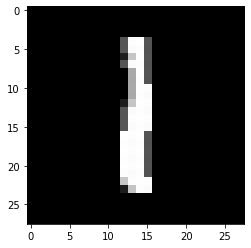

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 0 :0.6358199119567871
index of max value: x: 11, y: 6
region extracted: tensor([[0.0000, 0.9922, 0.9843],
        [0.0000, 0.7765, 0.9922],
        [0.0000, 0.1098, 0.7686]])


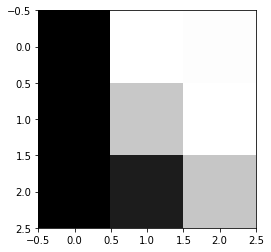

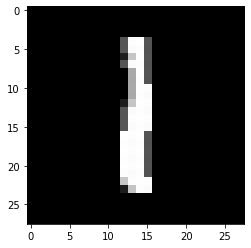

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 1 :0.8330056667327881
index of max value: x: 2, y: 7
region extracted: tensor([[0.0000, 0.0000, 0.0000],
        [0.9922, 1.0000, 0.3294],
        [0.9843, 0.9922, 0.3255]])


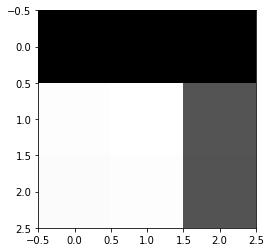

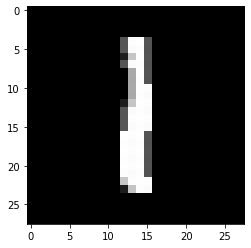

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 2 :0.480362206697464
index of max value: x: 2, y: 6
region extracted: tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.3333, 0.9922],
        [0.0000, 0.3333, 0.9843]])


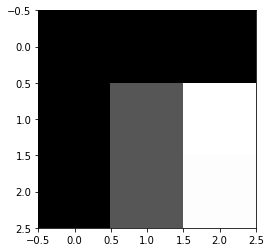

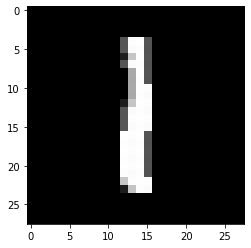

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 3 :-0.13423755764961243
index of max value: x: 12, y: 7
region extracted: tensor([[0.7686, 0.9922, 0.9843],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


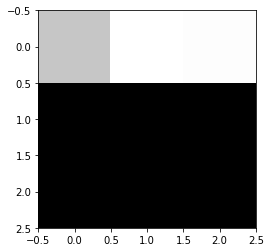

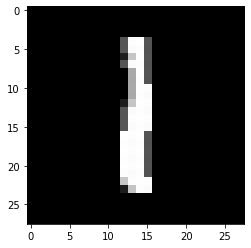

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 4 :0.20620320737361908
index of max value: x: 12, y: 8
region extracted: tensor([[0.9843, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


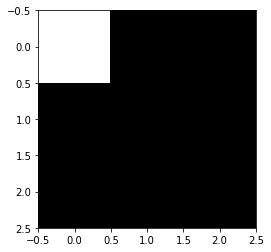

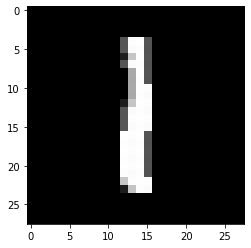

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 5 :1.0953599214553833
index of max value: x: 9, y: 7
region extracted: tensor([[0.9843, 0.9922, 0.3255],
        [0.9922, 0.9961, 0.3294],
        [0.9843, 0.9922, 0.3255]])


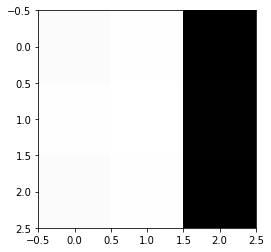

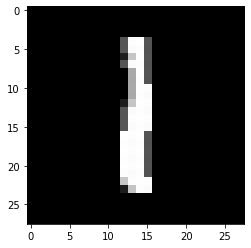

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 6 :0.5047484040260315
index of max value: x: 6, y: 8
region extracted: tensor([[0.9843, 0.0000, 0.0000],
        [0.9922, 0.0000, 0.0000],
        [0.9843, 0.0000, 0.0000]])


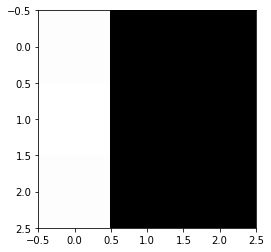

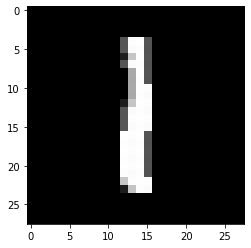

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 7 :0.1401311159133911
index of max value: x: 0, y: 0
<class 'torch.Tensor'>
region extracted: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


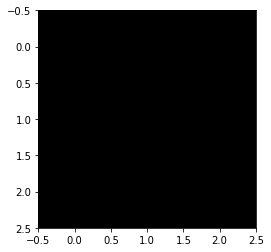

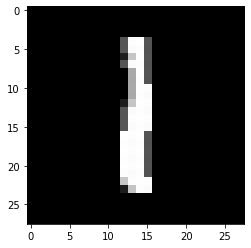

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 8 :0.829675018787384
index of max value: x: 6, y: 7
region extracted: tensor([[0.6588, 0.9922, 0.9843],
        [0.7725, 0.9961, 0.9922],
        [0.9843, 0.9922, 0.9843]])


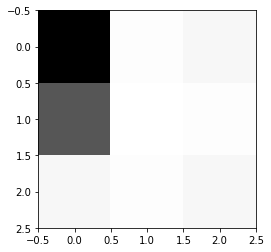

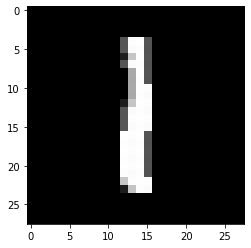

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 9 :0.16563361883163452
index of max value: x: 8, y: 6
region extracted: tensor([[0.0000, 0.3333, 0.9843],
        [0.0000, 0.9961, 0.9922],
        [0.0000, 0.9922, 0.9843]])


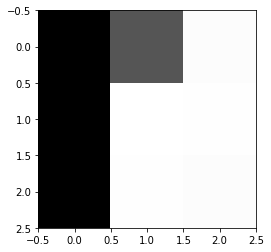

In [0]:
for i in range(10):
  test_truc(i, model, images)

In [0]:
activation_layer1_no_binary[1]

array([ 0.65015453,  0.866575  ,  0.49040592, -0.13324693,  0.26634267,
        1.00861907,  0.57153356,  0.24836133,  0.85304779,  0.14399643])

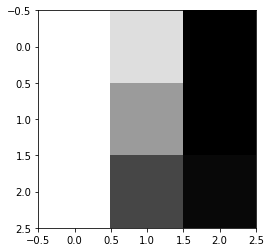

In [0]:
reg = region_layer1_no_binary[1][5]
plt.imshow(reg, cmap='gray')
plt.show()

In [0]:
region_layer1_no_binary[1][5].shape

(3, 3)